<a href="https://colab.research.google.com/github/ravi-gopalan/ipl_analysis/blob/master/ipl_analysis_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Files Processing

## Load a bunch of files onto Google colab environment for processing

In [1]:
!ls -la

total 16
drwxr-xr-x 1 root root 4096 May 31 16:17 .
drwxr-xr-x 1 root root 4096 Jun 20 03:40 ..
drwxr-xr-x 1 root root 4096 Jun 14 16:05 .config
drwxr-xr-x 1 root root 4096 May 31 16:17 sample_data


## Mount Google Drive for loading Kaggle dataset

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
cd /content

/content


In [0]:
!mkdir ipl

In [5]:
cd /root

/root


In [0]:
!mkdir .kaggle

In [0]:
!cp '/content/gdrive/My Drive/Colab_stuff/kaggle.json' /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [8]:
cd /content/ipl

/content/ipl


### Download Kaggle IPL Dataset, unzip and obtain 2 csv files - match summary and ball-by-ball details

In [9]:
!kaggle datasets download -d ravijee/ipl-2008-to-2019 -p /content/ipl

 98% 4.00M/4.07M [00:00<00:00, 12.2MB/s]
100% 4.07M/4.07M [00:00<00:00, 11.7MB/s]


In [10]:
!ls -la

total 4180
drwxr-xr-x 2 root root    4096 Jun 20 03:43 .
drwxr-xr-x 1 root root    4096 Jun 20 03:43 ..
-rw-r--r-- 1 root root 4268495 Jun 20 03:43 ipl-2008-to-2019.zip


In [11]:
pwd

'/content/ipl'

In [0]:
!unzip -q /content/ipl/ipl-2008-to-2019.zip

In [13]:
!ls -la

total 60900
drwxr-xr-x 2 root root     4096 Jun 20 03:43 .
drwxr-xr-x 1 root root     4096 Jun 20 03:43 ..
---------- 1 root root 55848188 Jun 18 00:41 ball_by_ball_details.csv
-rw-r--r-- 1 root root  4268495 Jun 20 03:43 ipl-2008-to-2019.zip
---------- 1 root root   166458 Jun 18 00:41 ipl_summary.csv
---------- 1 root root  2060580 Jun 18 00:41 ipl.zip


# Basic Processing of Data

Import necessary libraries - pandas, numpy, matplotlib.pyplot, matplotlib.gridspec, seaborn, pathlib, datetime

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from pathlib import Path

import datetime as dt


In [0]:
base_dir = Path('/content/ipl')

## Create base DataFrames 
### `df_match_summary` for summary data processing
### prep `df_match_summary` to simpify


In [0]:
df_match_summary = pd.read_csv('ipl_summary.csv')


## Prep the `df_match_summary` DataFrame

In [17]:
df_match_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 21 columns):
match_id              756 non-null int64
city                  743 non-null object
competition           756 non-null object
decision              756 non-null object
eliminator            9 non-null object
gender                756 non-null object
match_type            756 non-null object
method                19 non-null object
neutral_venue         77 non-null float64
#_of_overs            756 non-null int64
player_of_match       752 non-null object
result                13 non-null object
teams                 756 non-null object
umpires               755 non-null object
venue                 756 non-null object
winner                756 non-null object
winner_toss           743 non-null object
outcome_by_runs       337 non-null float64
outcome_by_wickets    406 non-null float64
match_date            756 non-null object
season                756 non-null int64
dtypes: float64(3)

The DataFrame has 21 columns in total with an integer index
set match_id as the index for match summary data

```
df_match_summary = df_match_summary.set_index('match_id')
```

In [0]:
df_match_summary = df_match_summary.set_index('match_id')

In [19]:
df_match_summary.head(2)

,city,competition,decision,eliminator,gender,match_type,method,neutral_venue,#_of_overs,player_of_match,result,teams,umpires,venue,winner,winner_toss,outcome_by_runs,outcome_by_wickets,match_date,season
match_id,,,,,,,,,,,,,,,,,,,,
548314,Visakhapatnam,IPL,bat,NaN,male,T20,NaN,NaN,20,['RG Sharma'],NaN,"['Deccan Chargers', 'Mumbai Indians']","['AK Chaudhary', 'JD Cloete']",Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,Mumbai Indians,Deccan Chargers,NaN,5.0,2012-04-09,2012
1178429,Bengaluru,IPL,field,NaN,male,T20,NaN,NaN,20,['SO Hetmyer'],NaN,"['Royal Challengers Bangalore', 'Sunrisers Hyd...","['NJ Llong', 'AK Chaudhary']",M.Chinnaswamy Stadium,Royal Challengers Bangalore,Royal Challengers Bangalore,NaN,4.0,2019-05-04,2019


In [20]:
df_match_summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 548314 to 336011
Data columns (total 20 columns):
city                  743 non-null object
competition           756 non-null object
decision              756 non-null object
eliminator            9 non-null object
gender                756 non-null object
match_type            756 non-null object
method                19 non-null object
neutral_venue         77 non-null float64
#_of_overs            756 non-null int64
player_of_match       752 non-null object
result                13 non-null object
teams                 756 non-null object
umpires               755 non-null object
venue                 756 non-null object
winner                756 non-null object
winner_toss           743 non-null object
outcome_by_runs       337 non-null float64
outcome_by_wickets    406 non-null float64
match_date            756 non-null object
season                756 non-null int64
dtypes: float64(3), int64(2), object(15)
memory usa

Some of the data is provided as lists within square brackets 
simplify them by removing the brackets, quotes etc

*   `player_of_match` - represents the best player in the match - remove brackets and quotes
*   `teams` - represents the two teams in the match as a list - lets simplify them as `team_1` and `team_2`
*   `umpires` - represents all the umpires in the match, usually 2 per match but there could be more - lets simplify them by creating as many umpire columns as required
*  team names - lets abbreviate and standardize the team-names
* `decision` - rename to `toss_decision` as this corresponds to the decision of the winner of the toss



In [0]:
df_match_summary['player_of_match'] = df_match_summary['player_of_match'].str[2:-2]
df_match_summary.rename(columns={'decision':'toss_decision'}, inplace=True)

In [22]:
# create a teams DataFrame df_teams to process the changes to the teamnames and simplification

df_teams = pd.DataFrame(df_match_summary.teams.str.split(',',n=2,expand=True))
df_teams.rename(columns={0:'team_1',1:'team_2'},inplace=True)
df_teams.team_1 = df_teams.team_1.str[2:-1] 
df_teams.team_2 = df_teams.team_2.str[2:-2] 
df_teams.head()

,team_1,team_2
match_id,,
548314,Deccan Chargers,Mumbai Indians
1178429,Royal Challengers Bangalore,Sunrisers Hyderabad
419157,Royal Challengers Bangalore,Mumbai Indians
548375,Pune Warriors,Kolkata Knight Riders
392234,Chennai Super Kings,Kings XI Punjab


In [23]:
# create an umpires DataFrame df_umpires to process the changes to the umpires field and simplification
df_umpires = pd.DataFrame(df_match_summary.umpires.str.split(',',n=4,expand=True))
df_umpires.rename(columns={0:'umpire_1',1:'umpire_2',2:'umpire_3',3:'umpire_4'},inplace=True)
df_umpires.umpire_1 = df_umpires.umpire_1.str[2:-1] 
df_umpires.umpire_2 = df_umpires.umpire_2.str[2:-2]
df_umpires.umpire_3 = df_umpires.umpire_3.str[2:-2]
df_umpires.umpire_4 = df_umpires.umpire_4.str[2:-2]

df_umpires.head()

,umpire_1,umpire_2,umpire_3,umpire_4
match_id,,,,
548314,AK Chaudhary,JD Cloete,None,None
1178429,NJ Llong,AK Chaudhary,None,None
419157,HDPK Dharmasena,SJA Taufel,None,None
548375,S Asnani,BR Doctrove,None,None
392234,BG Jerling,SJA Taufel,None,None


Join the teams and umpires back to the summary DataFrame `df_match_summary`

In [0]:
df_match_summary = df_match_summary.join(df_teams) 
df_match_summary = df_match_summary.join(df_umpires) 
df_match_summary.drop(['teams','umpires'], axis=1, inplace=True)

Map team names to abbreviations and standardize names

In [0]:
# The Rising Pune Supergiants and Rising Pune Supergiant team have been coded as RPS because the team_name was changed
team_names = {'Rajasthan Royals':'RR',\
              'Mumbai Indians' : 'MI',\
              'Delhi Daredevils':'DD',\
              'Kolkata Knight Riders':'KKR',\
              'Kings XI Punjab':'KXP',\
              'Sunrisers Hyderabad':'SRH',\
              'Deccan Chargers':'DC-Chargers',\
              'Chennai Super Kings':'CSK',\
              'Rising Pune Supergiants':'RPS',\
              'Royal Challengers Bangalore':'RCB',\
              'Pune Warriors':'PW',\
              'Gujarat Lions':'GL',\
              'Delhi Capitals':'DC-Capitals',\
              'Rising Pune Supergiant':'RPS',\
              'Kochi Tuskers Kerala':'KTK'
             }

In [0]:
df_match_summary['winner_toss'] = df_match_summary['winner_toss'].map(team_names)
df_match_summary['winner'] = df_match_summary['winner'].map(team_names)
df_match_summary['team_1'] = df_match_summary['team_1'].map(team_names)
df_match_summary['team_2'] = df_match_summary['team_2'].map(team_names)

Remove some of the obvious columns in this dataset
*  `competition` which is always IPL 
*  `gender` which is always male
*  `match_type` which is always T20
*  `#_of_overs` which is always 20


In [0]:
df_match_summary.drop(['competition','gender','match_type','#_of_overs'], axis=1, inplace=True)

Does the `city` and `venue` columns make any difference?
For now, we could simplify the summary field by creating a separate dataframe `df_city_venue` to store those and remove from the `df_match_summary` 

In [0]:
df_city_venue = df_match_summary[['city','venue']]
df_match_summary.drop(['city','venue'], axis=1, inplace=True)

In [29]:
df_match_summary.head()

,toss_decision,eliminator,method,neutral_venue,player_of_match,result,winner,winner_toss,outcome_by_runs,outcome_by_wickets,match_date,season,team_1,team_2,umpire_1,umpire_2,umpire_3,umpire_4
match_id,,,,,,,,,,,,,,,,,,
548314,bat,NaN,NaN,NaN,RG Sharma,NaN,MI,DC-Chargers,NaN,5.0,2012-04-09,2012,DC-Chargers,MI,AK Chaudhary,JD Cloete,None,None
1178429,field,NaN,NaN,NaN,SO Hetmyer,NaN,RCB,RCB,NaN,4.0,2019-05-04,2019,RCB,SRH,NJ Llong,AK Chaudhary,None,None
419157,field,NaN,NaN,NaN,R McLaren,NaN,MI,RCB,57.0,NaN,2010-04-17,2010,RCB,MI,HDPK Dharmasena,SJA Taufel,None,None
548375,bat,NaN,NaN,NaN,Shakib Al Hasan,NaN,KKR,KKR,34.0,NaN,2012-05-19,2012,PW,KKR,S Asnani,BR Doctrove,None,None
392234,bat,NaN,NaN,1.0,M Muralitharan,NaN,CSK,CSK,24.0,NaN,2009-05-20,2009,CSK,KXP,BG Jerling,SJA Taufel,None,None


## Store the simplified match_summary file as a csv 

In [0]:
df_match_summary.to_csv('match_summary.csv')

In [34]:
df_city_venue[df_city_venue.city.isna()]

,city,venue
match_id,,
729311,NaN,Sharjah Cricket Stadium
729303,NaN,Dubai International Cricket Stadium
729309,NaN,Sharjah Cricket Stadium
729281,NaN,Sharjah Cricket Stadium
729301,NaN,Dubai International Cricket Stadium
729313,NaN,Dubai International Cricket Stadium
729295,NaN,Sharjah Cricket Stadium
729297,NaN,Dubai International Cricket Stadium
729287,NaN,Dubai International Cricket Stadium


In [35]:
df_city_venue.drop_duplicates()

,city,venue
match_id,,
548314,Visakhapatnam,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...
1178429,Bengaluru,M.Chinnaswamy Stadium
419157,Bangalore,M Chinnaswamy Stadium
548375,Pune,Subrata Roy Sahara Stadium
392234,Durban,Kingsmead
548317,Mumbai,Wankhede Stadium
1136609,Kolkata,Eden Gardens
501235,Jaipur,Sawai Mansingh Stadium
392188,Cape Town,Newlands


In [45]:
df_city_venue.venue.unique()

array(['Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'M.Chinnaswamy Stadium', 'M Chinnaswamy Stadium',
       'Subrata Roy Sahara Stadium', 'Kingsmead', 'Wankhede Stadium',
       'Eden Gardens', 'Sawai Mansingh Stadium', 'Newlands',
       'Dr DY Patil Sports Academy', 'Brabourne Stadium',
       'Himachal Pradesh Cricket Association Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'JSCA International Stadium Complex',
       'Maharashtra Cricket Association Stadium', 'Feroz Shah Kotla',
       'De Beers Diamond Oval', 'MA Chidambaram Stadium, Chepauk',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Nehru Stadium', 'Green Park',
       'Saurashtra Cricket Association Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Shaheed Veer Narayan Singh International Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'SuperSport Park',
       'Sharjah Cricket Stadium', 'Holkar Cricket Stadium',
       

In [52]:
venue_names = {'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium':'YSR Visakhapatnam','M.Chinnaswamy Stadium':'Chinnaswamy, Bengaluru','M Chinnaswamy Stadium':'Chinnaswamy, Bengaluru',\
               'Subrata Roy Sahara Stadium':'Sahara, Pune','Kingsmead':'Kingsmead, Durban','Wankhede Stadium':'Wankhede, Mumbai','Dr DY Patil Sports Academy':'DY Patil, Mumbai',\
               'Brabourne Stadium':'Brabourne, Mumbai','Eden Gardens':'Eden Gardens, Kolkata','Sawai Mansingh Stadium':'Sawai Mansingh, Jaipur','Newlands':'Newlands, Capetown',\
               'Himachal Pradesh Cricket Association Stadium':'HPCA, Dharamsala','Rajiv Gandhi International Stadium, Uppal':'Rajiv Gandhi, Hyderabad','JSCA International Stadium Complex':'JSCA, Ranchi',\
               'Maharashtra Cricket Association Stadium':'MCAS, Pune','Feroz Shah Kotla':'Feroz Shah Kotla, Delhi','De Beers Diamond Oval':'De Beers, Kimberley',\
               'MA Chidambaram Stadium, Chepauk':'MA Chidambaram Stadium, Chennai','Punjab Cricket Association IS Bindra Stadium, Mohali':'PCA, Mohali','Nehru Stadium':'Nehru, Kochi',\
               'Green Park':'Green Park, Kanpur','Saurashtra Cricket Association Stadium':'SCA, Rajkot','Vidarbha Cricket Association Stadium, Jamtha':'VCA, Nagpur',\
               'Punjab Cricket Association Stadium, Mohali':'PCA, Mohali','Shaheed Veer Narayan Singh International Stadium':'Shaheed Veer Narayan Singh, Raipur',\
               'SuperSport Park':'Centurion, Gauteng',\'Holkar Cricket Stadium':'Holkar, Indore','Sardar Patel Stadium, Motera':'Sardar Patel, Ahmedabad','Barabati Stadium':'Barabati, Cuttack',\
               'Sharjah Cricket Stadium':'Sharjah','Dubai International Cricket Stadium':'Dubai','Sheikh Zayed Stadium':'Abu Dhabi','OUTsurance Oval':'Bloemfontein',\
               "St George's Park":'Port Elizabeth','Buffalo Park':'East London','New Wanderers Stadium':'Johannesburg'}

SyntaxError: ignored

## Create base DataFrames 
### `df_details` for detailed data processing
### prep the `df_details` DataFrame

In [0]:
# There is no need to load the match_summary fields onto details these can always be linked by the match_id
# Use usecols to read only the fields needed for processing

df_details = pd.read_csv('ball_by_ball_details.csv',\
                         usecols=lambda column : column not in ['Unnamed: 0' ,'city','venue','competition',\
                                                                'decision','eliminator','gender','match_type',\
                                                               'method','neutral_venue','#_of_overs','player_of_match',\
                                                               'result','teams','umpires','winner','winner_toss',\
                                                                'outcome_by_runs','outcome_by_wickets',\
                                                               'match_date','season'])


In [58]:
df_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178949 entries, 0 to 178948
Data columns (total 20 columns):
batsman         178940 non-null object
batsman_runs    178940 non-null float64
batting_team    178949 non-null object
bowler          178940 non-null object
byes            480 non-null float64
extras_runs     178299 non-null float64
fielders        6338 non-null object
kind            8827 non-null object
legbyes         2933 non-null float64
inning          178949 non-null object
delivery        178949 non-null float64
match_id        178949 non-null int64
noballs         712 non-null float64
non_striker     178940 non-null object
player_out      8827 non-null object
total           178940 non-null float64
wides           5405 non-null float64
non_boundary    14 non-null float64
penalty         2 non-null float64
over            178949 non-null int64
dtypes: float64(10), int64(2), object(8)
memory usage: 27.3+ MB


In [59]:
df_details.head(5)

,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,fielders,kind,legbyes,inning,delivery,match_id,noballs,non_striker,player_out,total,wides,non_boundary,penalty,over
0,PA Patel,0.0,Deccan Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,NaN,inning_1,0.1,548314,NaN,S Dhawan,NaN,0.0,NaN,NaN,NaN,1
1,PA Patel,0.0,Deccan Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,NaN,inning_1,0.2,548314,NaN,S Dhawan,NaN,0.0,NaN,NaN,NaN,1
2,PA Patel,1.0,Deccan Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,NaN,inning_1,0.3,548314,NaN,S Dhawan,NaN,1.0,NaN,NaN,NaN,1
3,S Dhawan,0.0,Deccan Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,NaN,inning_1,0.4,548314,NaN,PA Patel,NaN,0.0,NaN,NaN,NaN,1
4,S Dhawan,0.0,Deccan Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,NaN,inning_1,0.5,548314,NaN,PA Patel,NaN,0.0,NaN,NaN,NaN,1


In [60]:
# Simplify the team_names
df_details['batting_team'] = df_details['batting_team'].map(team_names)

df_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178949 entries, 0 to 178948
Data columns (total 20 columns):
batsman         178940 non-null object
batsman_runs    178940 non-null float64
batting_team    178949 non-null object
bowler          178940 non-null object
byes            480 non-null float64
extras_runs     178299 non-null float64
fielders        6338 non-null object
kind            8827 non-null object
legbyes         2933 non-null float64
inning          178949 non-null object
delivery        178949 non-null float64
match_id        178949 non-null int64
noballs         712 non-null float64
non_striker     178940 non-null object
player_out      8827 non-null object
total           178940 non-null float64
wides           5405 non-null float64
non_boundary    14 non-null float64
penalty         2 non-null float64
over            178949 non-null int64
dtypes: float64(10), int64(2), object(8)
memory usage: 27.3+ MB


In [61]:
df_details.head()

,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,fielders,kind,legbyes,inning,delivery,match_id,noballs,non_striker,player_out,total,wides,non_boundary,penalty,over
0,PA Patel,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,NaN,inning_1,0.1,548314,NaN,S Dhawan,NaN,0.0,NaN,NaN,NaN,1
1,PA Patel,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,NaN,inning_1,0.2,548314,NaN,S Dhawan,NaN,0.0,NaN,NaN,NaN,1
2,PA Patel,1.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,NaN,inning_1,0.3,548314,NaN,S Dhawan,NaN,1.0,NaN,NaN,NaN,1
3,S Dhawan,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,NaN,inning_1,0.4,548314,NaN,PA Patel,NaN,0.0,NaN,NaN,NaN,1
4,S Dhawan,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,NaN,inning_1,0.5,548314,NaN,PA Patel,NaN,0.0,NaN,NaN,NaN,1


### Process fielders column
fielders column is a list of all fielders involved in a run_out;
we'll need the specific fielder involved in the run-out
create 3 fielder columns to get exact individuals

Clean the columns and join them back

In [69]:
df_fielders = pd.DataFrame(df_details.fielders.str.split(',',n=2,expand=True))


df_fielders.rename(columns={0:'fielder_1',1:'fielder_2',2:'fielder_3'},inplace=True)

df_fielders.replace(regex=True,inplace=True,to_replace=[r"\[",r"\]",r"\'"],value=[r"",r"",r""])
print(df_fielders[df_fielders['fielder_1'].notnull() & df_fielders['fielder_2'].notnull() & df_fielders['fielder_3'].notnull()].head(5))
print(df_fielders[df_fielders['fielder_1'].notnull()].head(5))

df_details = df_details.join(df_fielders)
df_details.drop(['fielders'], axis=1, inplace=True)

             fielder_1     fielder_2   fielder_3
26055           Z Khan       KK Nair   Q de Kock
27099        STR Binny   Sachin Baby   KK Cooper
30038          M Vijay      MS Dhoni   JA Morkel
64223           P Negi     CH Morris   Q de Kock
90188  Joginder Sharma      JDP Oram    MS Dhoni
      fielder_1 fielder_2 fielder_3
9     RG Sharma      None      None
18   SL Malinga      None      None
41   KA Pollard      None      None
109  KA Pollard      None      None
113    MM Patel      None      None


In [70]:
df_details.head()

,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,kind,legbyes,inning,delivery,match_id,noballs,non_striker,player_out,total,wides,non_boundary,penalty,over,fielder_1,fielder_2,fielder_3
0,PA Patel,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,0.1,548314,NaN,S Dhawan,NaN,0.0,NaN,NaN,NaN,1,NaN,NaN,NaN
1,PA Patel,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,0.2,548314,NaN,S Dhawan,NaN,0.0,NaN,NaN,NaN,1,NaN,NaN,NaN
2,PA Patel,1.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,0.3,548314,NaN,S Dhawan,NaN,1.0,NaN,NaN,NaN,1,NaN,NaN,NaN
3,S Dhawan,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,0.4,548314,NaN,PA Patel,NaN,0.0,NaN,NaN,NaN,1,NaN,NaN,NaN
4,S Dhawan,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,0.5,548314,NaN,PA Patel,NaN,0.0,NaN,NaN,NaN,1,NaN,NaN,NaN


In [71]:
df_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178949 entries, 0 to 178948
Data columns (total 22 columns):
batsman         178940 non-null object
batsman_runs    178940 non-null float64
batting_team    178949 non-null object
bowler          178940 non-null object
byes            480 non-null float64
extras_runs     178299 non-null float64
kind            8827 non-null object
legbyes         2933 non-null float64
inning          178949 non-null object
delivery        178949 non-null float64
match_id        178949 non-null int64
noballs         712 non-null float64
non_striker     178940 non-null object
player_out      8827 non-null object
total           178940 non-null float64
wides           5405 non-null float64
non_boundary    14 non-null float64
penalty         2 non-null float64
over            178949 non-null int64
fielder_1       6338 non-null object
fielder_2       391 non-null object
fielder_3       11 non-null object
dtypes: float64(10), int64(2), object(10)
memory usage:

In [0]:
df_details['delivery'] = df_details['delivery'].astype(str)

In [0]:
delivery_map = {'0.1': '1','0.2': '2', '0.3': '3', '0.4': '4', '0.5': '5', '0.6': '6', '0.7': '7', '0.8': '8', '0.9': '9',\
         '1.1': '1','1.2': '2', '1.3': '3', '1.4': '4', '1.5': '5', '1.6': '6', '1.7': '7', '1.8': '8', '1.9': '9',\
         '2.1': '1','2.2': '2', '2.3': '3', '2.4': '4', '2.5': '5', '2.6': '6', '2.7': '7', '2.8': '8', '2.9': '9',\
         '3.1': '1','3.2': '2', '3.3': '3', '3.4': '4', '3.5': '5', '3.6': '6', '3.7': '7', '3.8': '8', '3.9': '9',\
         '4.1': '1','4.2': '2', '4.3': '3', '4.4': '4', '4.5': '5', '4.6': '6', '4.7': '7', '4.8': '8', '4.9': '9',\
         '5.1': '1','5.2': '2', '5.3': '3', '5.4': '4', '5.5': '5', '5.6': '6', '5.7': '7', '5.8': '8', '5.9': '9',\
         '6.1': '1','6.2': '2', '6.3': '3', '6.4': '4', '6.5': '5', '6.6': '6', '6.7': '7', '6.8': '8', '6.9': '9',\
         '7.1': '1','7.2': '2', '7.3': '3', '7.4': '4', '7.5': '5', '7.6': '6', '7.7': '7', '7.8': '8', '7.9': '9',\
         '8.1': '1','8.2': '2', '8.3': '3', '8.4': '4', '8.5': '5', '8.6': '6', '8.7': '7', '8.8': '8', '8.9': '9',\
         '9.1': '1','9.2': '2', '9.3': '3', '9.4': '4', '9.5': '5', '9.6': '6', '9.7': '7', '9.8': '8', '9.9': '9',\
         '10.1': '1','10.2': '2', '10.3': '3', '10.4': '4', '10.5': '5', '10.6': '6', '10.7': '7', '10.8': '8', '10.9': '9',\
         '11.1': '1','11.2': '2', '11.3': '3', '11.4': '4', '11.5': '5', '11.6': '6', '11.7': '7', '11.8': '8', '11.9': '9',\
         '12.1': '1','12.2': '2', '12.3': '3', '12.4': '4', '12.5': '5', '12.6': '6', '12.7': '7', '12.8': '8', '12.9': '9',\
         '13.1': '1','13.2': '2', '13.3': '3', '13.4': '4', '13.5': '5', '13.6': '6', '13.7': '7', '13.8': '8', '13.9': '9',\
         '14.1': '1','14.2': '2', '14.3': '3', '14.4': '4', '14.5': '5', '14.6': '6', '14.7': '7', '14.8': '8', '14.9': '9',\
         '15.1': '1','15.2': '2', '15.3': '3', '15.4': '4', '15.5': '5', '15.6': '6', '15.7': '7', '15.8': '8', '15.9': '9',\
         '16.1': '1','16.2': '2', '16.3': '3', '16.4': '4', '16.5': '5', '16.6': '6', '16.7': '7', '16.8': '8', '16.9': '9',\
         '17.1': '1','17.2': '2', '17.3': '3', '17.4': '4', '17.5': '5', '17.6': '6', '17.7': '7', '17.8': '8', '17.9': '9',\
         '18.1': '1','18.2': '2', '18.3': '3', '18.4': '4', '18.5': '5', '18.6': '6', '18.7': '7', '18.8': '8', '18.9': '9',\
         '19.1': '1','19.2': '2', '19.3': '3', '19.4': '4', '19.5': '5', '19.6': '6', '19.7': '7', '19.8': '8', '19.9': '9',\
        }

In [0]:
df_details['delivery_in_over'] = df_details['delivery'].map(delivery_map)

In [0]:
df_details['over'] = df_details['over'].astype(str)
inning_quarter = {'1': 'Q1','2': 'Q1', '3': 'Q1', '4': 'Q1', '5': 'Q1', \
                '6': 'Q2', '7': 'Q2', '8': 'Q2', '9': 'Q2', '10': 'Q2',\
                '11': 'Q3','12': 'Q3', '13': 'Q3', '14': 'Q3', '15': 'Q3',\
                '16': 'Q4', '17': 'Q4', '18': 'Q4', '19': 'Q4', '20': 'Q4'\
                }
df_details['inning_quarter'] = df_details['over'].map(inning_quarter)

In [76]:
df_details.head()

,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,kind,legbyes,inning,delivery,match_id,noballs,non_striker,player_out,total,wides,non_boundary,penalty,over,fielder_1,fielder_2,fielder_3,delivery_in_over,inning_quarter
0,PA Patel,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,0.1,548314,NaN,S Dhawan,NaN,0.0,NaN,NaN,NaN,1,NaN,NaN,NaN,1,Q1
1,PA Patel,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,0.2,548314,NaN,S Dhawan,NaN,0.0,NaN,NaN,NaN,1,NaN,NaN,NaN,2,Q1
2,PA Patel,1.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,0.3,548314,NaN,S Dhawan,NaN,1.0,NaN,NaN,NaN,1,NaN,NaN,NaN,3,Q1
3,S Dhawan,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,0.4,548314,NaN,PA Patel,NaN,0.0,NaN,NaN,NaN,1,NaN,NaN,NaN,4,Q1
4,S Dhawan,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,0.5,548314,NaN,PA Patel,NaN,0.0,NaN,NaN,NaN,1,NaN,NaN,NaN,5,Q1


Not outs are important in the determination of batting averages

In [0]:
df_details[df_details.player_out.notna()].head()

,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,kind,legbyes,inning,delivery,match_id,noballs,non_striker,player_out,total,wides,non_boundary,penalty,method,over,fielder_1,fielder_2,fielder_3,delivery_in_over,inning_quarter
9,PA Patel,0.0,DC-Chargers,MM Patel,NaN,0.0,caught,NaN,inning_1,1.4,548314,NaN,S Dhawan,PA Patel,0.0,NaN,NaN,NaN,NaN,2,RG Sharma,None,None,4,Q1
18,B Chipli,0.0,DC-Chargers,MM Patel,NaN,0.0,caught,NaN,inning_1,3.1,548314,NaN,S Dhawan,B Chipli,0.0,NaN,NaN,NaN,NaN,4,SL Malinga,None,None,1,Q1
41,S Dhawan,0.0,DC-Chargers,SL Malinga,NaN,0.0,caught,NaN,inning_1,6.6,548314,NaN,DT Christian,S Dhawan,0.0,NaN,NaN,NaN,NaN,7,KA Pollard,None,None,6,Q2
75,KC Sangakkara,0.0,DC-Chargers,MM Patel,NaN,0.0,bowled,NaN,inning_1,12.3,548314,NaN,DT Christian,KC Sangakkara,0.0,NaN,NaN,NaN,NaN,13,NaN,NaN,NaN,3,Q3
109,DT Christian,0.0,DC-Chargers,MM Patel,NaN,0.0,caught,NaN,inning_1,17.6,548314,NaN,CL White,DT Christian,0.0,NaN,NaN,NaN,NaN,18,KA Pollard,None,None,6,Q4


In [0]:
df_details['kind'].unique()

array([nan, 'caught', 'bowled', 'caught and bowled', 'lbw', 'stumped',
       'run out', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [0]:
def attribute_catch (row):
  if row['kind'] == 'caught':
    value = row['fielder_1']
  elif row['kind'] == 'caught and bowled':
    value = row['bowler']
  else:
    value = None
  return value

df_details['catch_attributed_to'] = df_details.apply (lambda row: attribute_catch(row), axis=1)

In [0]:
df_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178949 entries, 0 to 178948
Data columns (total 26 columns):
batsman                178940 non-null object
batsman_runs           178940 non-null float64
batting_team           178949 non-null object
bowler                 178940 non-null object
byes                   480 non-null float64
extras_runs            178299 non-null float64
kind                   8827 non-null object
legbyes                2933 non-null float64
inning                 178949 non-null object
delivery               178949 non-null object
match_id               178949 non-null int64
noballs                712 non-null float64
non_striker            178940 non-null object
player_out             8827 non-null object
total                  178940 non-null float64
wides                  5405 non-null float64
non_boundary           14 non-null float64
penalty                2 non-null float64
method                 3208 non-null object
over                   178949 no

In [0]:
def attribute_wicket (row):
    if row['kind'] == 'caught':
      value = row['bowler']
    elif row['kind'] == 'lbw':
      value = row['bowler']
    elif row['kind'] == 'stumped':
      value = row['bowler']
    elif row['kind'] == 'bowled':
      value = row['bowler']
    elif row['kind'] == 'hit wicket':
      value = row['bowler']
    elif row['kind'] == 'caught and bowled':
      value = row['bowler']
    else:
      value = None
    return value
  
df_details['wicket_attributed_to'] = df_details.apply( lambda row: attribute_wicket(row), axis = 1)

In [0]:
df_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178949 entries, 0 to 178948
Data columns (total 27 columns):
batsman                 178940 non-null object
batsman_runs            178940 non-null float64
batting_team            178949 non-null object
bowler                  178940 non-null object
byes                    480 non-null float64
extras_runs             178299 non-null float64
kind                    8827 non-null object
legbyes                 2933 non-null float64
inning                  178949 non-null object
delivery                178949 non-null object
match_id                178949 non-null int64
noballs                 712 non-null float64
non_striker             178940 non-null object
player_out              8827 non-null object
total                   178940 non-null float64
wides                   5405 non-null float64
non_boundary            14 non-null float64
penalty                 2 non-null float64
method                  3208 non-null object
over         

In [0]:
df_details['wicket_attributed_to'].value_counts()


SL Malinga           170
A Mishra             157
PP Chawla            150
Harbhajan Singh      150
DJ Bravo             147
B Kumar              133
R Ashwin             125
SP Narine            122
UT Yadav             119
RA Jadeja            108
A Nehra              106
R Vinay Kumar        105
Z Khan               102
YS Chahal            100
DW Steyn              96
Sandeep Sharma        95
SR Watson             92
MM Sharma             91
P Kumar               90
RP Singh              90
PP Ojha               89
DS Kulkarni           86
JA Morkel             85
JJ Bumrah             82
IK Pathan             80
Imran Tahir           79
M Morkel              77
JD Unadkat            77
L Balaji              76
MM Patel              74
                    ... 
D Salunkhe             1
S Vidyut               1
JDS Neesham            1
LMP Simmons            1
Swapnil Singh          1
A Nel                  1
CV Varun               1
Harmeet Singh (2)      1
AS Roy                 1


In [0]:
df_details.query('kind == "caught and bowled"').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254 entries, 133 to 175630
Data columns (total 27 columns):
batsman                 254 non-null object
batsman_runs            254 non-null float64
batting_team            254 non-null object
bowler                  254 non-null object
byes                    0 non-null float64
extras_runs             254 non-null float64
kind                    254 non-null object
legbyes                 0 non-null float64
inning                  254 non-null object
delivery                254 non-null object
match_id                254 non-null int64
noballs                 0 non-null float64
non_striker             254 non-null object
player_out              254 non-null object
total                   254 non-null float64
wides                   0 non-null float64
non_boundary            0 non-null float64
penalty                 0 non-null float64
method                  3 non-null object
over                    254 non-null object
fielder_1       

In [0]:
df_details.query('kind == "caught"')['fielder_1']

9               RG Sharma
18             SL Malinga
41             KA Pollard
109            KA Pollard
113              MM Patel
122             AT Rayudu
190              S Dhawan
220              S Dhawan
269              UT Yadav
286               V Kohli
289            SO Hetmyer
325       C de Grandhomme
339              UT Yadav
346       Gurkeerat Singh
349            SO Hetmyer
369             MK Pandey
377               WP Saha
383            MJ Guptill
476             V Shankar
481             YK Pathan
483             MK Pandey
526           LRPL Taylor
643                Z Khan
668            KA Pollard
679             SS Tiwary
682              AM Nayar
703       Harbhajan Singh
725               AP Tare
730                Z Khan
763               A Nehra
               ...       
178073          CH Morris
178089            SS Iyer
178094      SE Rutherford
178168          BA Stokes
178216            R Parag
178224            R Parag
178330           DR Smith
178363      

In [0]:
df_details['batsman_runs'][df_details['batsman_runs'] == 6.0].count()

8166

In [0]:
def flag_boundary_4 (row):
    if row['batsman_runs'] == 4.0:
      value = 1
    else:
      value = None  
    return value

def flag_boundary_6 (row):
    if row['batsman_runs'] == 6.0:
      value = 1
    else:
      value = None  
    return value

def flag_dot_ball (row):
    if row['batsman_runs'] == 0.0:
      value = 1
    else:
      value = None  
    return value
  
  
def flag_1_run_ball (row):
    if row['batsman_runs'] == 1.0:
      value = 1
    else:
      value = None  
    return value
  
def flag_2_run_ball (row):
    if row['batsman_runs'] == 2.0:
      value = 1
    else:
      value = None  
    return value

def flag_3_run_ball (row):
    if row['batsman_runs'] == 3.0:
      value = 1
    else:
      value = None  
    return value
  
def flag_5_run_ball (row):
    if row['batsman_runs'] == 5.0:
      value = 1
    else:
      value = None  
    return value
  
  
df_details['4_flag'] = df_details.apply(lambda row: flag_boundary_4(row), axis=1)
df_details['6_flag'] = df_details.apply( lambda row: flag_boundary_6(row), axis = 1)
df_details['dot_ball_flag'] = df_details.apply( lambda row: flag_dot_ball(row), axis = 1)
df_details['1_run_flag'] = df_details.apply( lambda row: flag_1_run_ball(row), axis = 1)
df_details['2_run_flag'] = df_details.apply( lambda row: flag_2_run_ball(row), axis = 1)
df_details['3_run_flag'] = df_details.apply( lambda row: flag_3_run_ball(row), axis = 1)
df_details['5_run_flag'] = df_details.apply( lambda row: flag_5_run_ball(row), axis = 1)

In [0]:
df_details.kind.unique()

array([nan, 'caught', 'bowled', 'caught and bowled', 'lbw', 'stumped',
       'run out', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [0]:
def flag_caught (row):
    if row['kind'] == 'caught':
      value = 1
    else:
      value = None  
    return value

def flag_lbw (row):
    if row['kind'] == 'lbw':
      value = 1
    else:
      value = None  
    return value

def flag_stumped (row):
    if row['kind'] == 'stumped':
      value = 1
    else:
      value = None  
    return value
  
  
def flag_bowled (row):
    if row['kind'] == 'bowled':
      value = 1
    else:
      value = None  
    return value
  
def flag_run_out (row):
    if row['kind'] == 'run out':
      value = 1
    else:
      value = None  
    return value

def flag_hit_wicket (row):
    if row['kind'] == 'hit wicket':
      value = 1
    else:
      value = None  
    return value
  
def flag_caught_and_bowled (row):
    if row['kind'] == 'caught and bowled':
      value = 1
    else:
      value = None  
    return value

def flag_retired_hurt (row):
    if row['kind'] == 'retired hurt':
      value = 1
    else:
      value = None  
    return value

def flag_obstructing_the_field (row):
    if row['kind'] == 'obstructing the field':
      value = 1
    else:
      value = None  
    return value  

  
df_details['caught_flag'] = df_details.apply(lambda row: flag_caught(row), axis=1)
df_details['lbw_flag'] = df_details.apply( lambda row: flag_lbw(row), axis = 1)
df_details['stumped_flag'] = df_details.apply( lambda row: flag_stumped(row), axis = 1)
df_details['bowled_flag'] = df_details.apply( lambda row: flag_bowled(row), axis = 1)
df_details['run_out_flag'] = df_details.apply( lambda row: flag_run_out(row), axis = 1)
df_details['hit_wicket_flag'] = df_details.apply( lambda row: flag_hit_wicket(row), axis = 1)
df_details['caught_and_bowled_flag'] = df_details.apply( lambda row: flag_caught_and_bowled(row), axis = 1)
df_details['retired_hurt_flag'] = df_details.apply( lambda row: flag_retired_hurt(row), axis = 1)
df_details['obstructing_the_field_flag'] = df_details.apply( lambda row: flag_obstructing_the_field(row), axis = 1)

In [0]:
df_details[df_details['wides'].notna()].head()

,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,kind,legbyes,inning,delivery,match_id,noballs,non_striker,player_out,total,wides,non_boundary,penalty,method,over,fielder_1,fielder_2,fielder_3,delivery_in_over,inning_quarter,catch_attributed_to,wicket_attributed_to,4_flag,6_flag,dot_ball_flag,1_run_flag,2_run_flag,3_run_flag,5_run_flag,caught_flag,lbw_flag,stumped_flag,bowled_flag,run_out_flag,hit_wicket_flag,caught_and_bowled_flag,retired_hurt_flag,obstructing_the_field_flag
67,DT Christian,0.0,DC-Chargers,KA Pollard,NaN,1.0,NaN,NaN,inning_1,11.2,548314,NaN,KC Sangakkara,NaN,1.0,1.0,NaN,NaN,NaN,12,NaN,NaN,NaN,2,Q3,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,DT Christian,0.0,DC-Chargers,PP Ojha,NaN,2.0,NaN,NaN,inning_1,15.5,548314,NaN,CL White,NaN,2.0,2.0,NaN,NaN,NaN,16,NaN,NaN,NaN,5,Q4,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,CL White,0.0,DC-Chargers,KA Pollard,NaN,1.0,NaN,NaN,inning_1,19.1,548314,NaN,DW Steyn,NaN,1.0,1.0,NaN,NaN,NaN,20,NaN,NaN,NaN,1,Q4,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
331,YK Pathan,0.0,SRH,K Khejroliya,NaN,1.0,NaN,NaN,inning_1,14.5,1178429,NaN,KS Williamson,NaN,1.0,1.0,NaN,NaN,NaN,15,NaN,NaN,NaN,5,Q3,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
335,KS Williamson,0.0,SRH,YS Chahal,NaN,1.0,NaN,NaN,inning_1,15.2,1178429,NaN,YK Pathan,NaN,1.0,1.0,NaN,NaN,NaN,16,NaN,NaN,NaN,2,Q4,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df_details['wide_flag'] = df_details['wides'].notna()
df_details['noball_flag'] = df_details['noballs'].notna()
df_details['legbye_flag'] = df_details['legbyes'].notna()
df_details['bye_flag'] = df_details['byes'].notna()

In [0]:
df_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178949 entries, 0 to 178948
Data columns (total 47 columns):
batsman                       178940 non-null object
batsman_runs                  178940 non-null float64
batting_team                  178949 non-null object
bowler                        178940 non-null object
byes                          480 non-null float64
extras_runs                   178299 non-null float64
kind                          8827 non-null object
legbyes                       2933 non-null float64
inning                        178949 non-null object
delivery                      178949 non-null object
match_id                      178949 non-null int64
noballs                       712 non-null float64
non_striker                   178940 non-null object
player_out                    8827 non-null object
total                         178940 non-null float64
wides                         5405 non-null float64
non_boundary                  14 non-null float64

In [0]:
df_details.head()

,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,kind,legbyes,inning,delivery,match_id,noballs,non_striker,player_out,total,wides,non_boundary,penalty,method,over,fielder_1,fielder_2,fielder_3,delivery_in_over,inning_quarter,catch_attributed_to,wicket_attributed_to,4_flag,6_flag,dot_ball_flag,1_run_flag,2_run_flag,3_run_flag,5_run_flag,caught_flag,lbw_flag,stumped_flag,bowled_flag,run_out_flag,hit_wicket_flag,caught_and_bowled_flag,retired_hurt_flag,obstructing_the_field_flag,wide_flag,noball_flag,legbye_flag,bye_flag
0,PA Patel,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,0.1,548314,NaN,S Dhawan,NaN,0.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,1,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
1,PA Patel,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,0.2,548314,NaN,S Dhawan,NaN,0.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,2,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
2,PA Patel,1.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,0.3,548314,NaN,S Dhawan,NaN,1.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,3,Q1,None,None,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
3,S Dhawan,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,0.4,548314,NaN,PA Patel,NaN,0.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,4,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
4,S Dhawan,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,0.5,548314,NaN,PA Patel,NaN,0.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,5,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False


In [0]:
df_not_out_check = df_details[['match_id','inning','batsman','player_out','kind']].drop_duplicates()

In [0]:
df_not_out_check.query('kind=="run out"')

,match_id,inning,batsman,player_out,kind
1011,392234,inning_1,GJ Bailey,GJ Bailey,run out
1102,392234,inning_1,T Thushara,T Thushara,run out
1550,598055,inning_1,AD Mathews,AD Mathews,run out
2002,501235,inning_1,MK Pandey,Yuvraj Singh,run out
2049,501235,inning_1,R Sharma,R Sharma,run out
2529,392188,inning_1,DB Ravi Teja,Y Venugopal Rao,run out
2638,392188,inning_2,R Bishnoi,R Bishnoi,run out
2685,419162,inning_1,S Dhawan,S Dhawan,run out
2848,419162,inning_2,R Dravid,R Dravid,run out
3334,419152,inning_2,V Sehwag,V Sehwag,run out


In [0]:
df_not_out_check.head(5)

,match_id,inning,batsman,player_out,kind
0,548314,inning_1,PA Patel,NaN,NaN
3,548314,inning_1,S Dhawan,NaN,NaN
9,548314,inning_1,PA Patel,PA Patel,caught
10,548314,inning_1,B Chipli,NaN,NaN
18,548314,inning_1,B Chipli,B Chipli,caught


In [0]:
def check_out(row):
  if row['kind'] != 'NaN' and row['player_out'] == row['batsman']:
    value = row['batsman']
  elif row['kind'] !='NaN' and row['player_out'] != row['batsman']:
    value = row['player_out']
  else:
    value = None
  return value

df_not_out_check['out'] = df_not_out_check.apply(lambda row: check_out(row),axis=1)

In [0]:
df_not_out_check.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19703 entries, 0 to 178946
Data columns (total 6 columns):
match_id      19703 non-null int64
inning        19703 non-null object
batsman       19694 non-null object
player_out    8827 non-null object
kind          8827 non-null object
out           8827 non-null object
dtypes: int64(1), object(5)
memory usage: 1.1+ MB


In [0]:
df_not_out_check.query('kind=="run out"').head()

,match_id,inning,batsman,player_out,kind,out
1011,392234,inning_1,GJ Bailey,GJ Bailey,run out,GJ Bailey
1102,392234,inning_1,T Thushara,T Thushara,run out,T Thushara
1550,598055,inning_1,AD Mathews,AD Mathews,run out,AD Mathews
2002,501235,inning_1,MK Pandey,Yuvraj Singh,run out,Yuvraj Singh
2049,501235,inning_1,R Sharma,R Sharma,run out,R Sharma


In [0]:
df_not_out = df_not_out_check.groupby(['match_id','inning','player_out'],as_index=False)['out'].count()

In [0]:
df_not_out.head()

,match_id,inning,player_out,out
0,335982,inning_1,DJ Hussey,1
1,335982,inning_1,RT Ponting,1
2,335982,inning_1,SC Ganguly,1
3,335982,inning_2,AA Noffke,1
4,335982,inning_2,B Akhil,1


In [0]:
df_not_out.tail()

,match_id,inning,player_out,out
8822,1181768,inning_2,F du Plessis,1
8823,1181768,inning_2,MS Dhoni,1
8824,1181768,inning_2,SK Raina,1
8825,1181768,inning_2,SN Thakur,1
8826,1181768,inning_2,SR Watson,1


In [0]:
df_not_out.player_out.nunique()

486

In [0]:
df_not_out.query('match_id=="336002"')

,match_id,inning,player_out,out
236,336002,inning_1,AC Gilchrist,1
237,336002,inning_1,AS Yadav,1
238,336002,inning_1,DB Ravi Teja,1
239,336002,inning_1,HH Gibbs,1
240,336002,inning_1,LPC Silva,1
241,336002,inning_1,RG Sharma,1
242,336002,inning_1,RP Singh,1
243,336002,inning_1,SB Bangar,1
244,336002,inning_1,WPUJC Vaas,1
245,336002,inning_1,Y Venugopal Rao,1


In [0]:
df_details.query('match_id=="336002" & kind =="run out"')

,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,kind,legbyes,inning,delivery,match_id,noballs,non_striker,player_out,total,wides,non_boundary,penalty,method,over,fielder_1,fielder_2,fielder_3,delivery_in_over,inning_quarter,catch_attributed_to,wicket_attributed_to,4_flag,6_flag,dot_ball_flag,1_run_flag,2_run_flag,3_run_flag,5_run_flag,caught_flag,lbw_flag,stumped_flag,bowled_flag,run_out_flag,hit_wicket_flag,caught_and_bowled_flag,retired_hurt_flag,obstructing_the_field_flag,wide_flag,noball_flag,legbye_flag,bye_flag
62874,AS Yadav,0.0,DC-Chargers,R Vinay Kumar,NaN,0.0,run out,NaN,inning_1,18.4,336002,NaN,SB Bangar,SB Bangar,0.0,NaN,NaN,NaN,NaN,19,R Vinay Kumar,None,None,4,Q4,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,False,False,False,False
62879,AS Yadav,0.0,DC-Chargers,DW Steyn,NaN,0.0,run out,NaN,inning_1,19.2,336002,NaN,WPUJC Vaas,WPUJC Vaas,0.0,NaN,NaN,NaN,NaN,20,SP Goswami,None,None,2,Q4,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,False,False,False,False
62899,JH Kallis,0.0,RCB,WPUJC Vaas,NaN,0.0,run out,NaN,inning_2,2.4,336002,NaN,W Jaffer,W Jaffer,0.0,NaN,NaN,NaN,NaN,3,AS Yadav,None,None,4,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,False,False,False,False
62925,JH Kallis,0.0,RCB,SB Bangar,NaN,0.0,run out,NaN,inning_2,6.6,336002,NaN,Misbah-ul-Haq,JH Kallis,0.0,NaN,NaN,NaN,NaN,7,LPC Silva,None,None,6,Q2,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,False,False,False,False


In [0]:
df_not_out.query('match_id =="335989"')

,match_id,inning,player_out,out
79,335989,inning_1,MEK Hussey,1
80,335989,inning_1,ML Hayden,1
81,335989,inning_1,MS Dhoni,1
82,335989,inning_1,PA Patel,1
83,335989,inning_1,SK Raina,1
84,335989,inning_2,DJ Bravo,1
85,335989,inning_2,Harbhajan Singh,1
86,335989,inning_2,L Ronchi,1
87,335989,inning_2,MA Khote,1
88,335989,inning_2,RV Uthappa,1


In [0]:
df_not_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8827 entries, 0 to 8826
Data columns (total 4 columns):
match_id      8827 non-null int64
inning        8827 non-null object
player_out    8827 non-null object
out           8827 non-null int64
dtypes: int64(2), object(2)
memory usage: 344.8+ KB


In [0]:
df_not_out.to_csv('players_out_by_match_view.csv')

In [0]:
df_details.to_csv('cleansed_ball_by_ball_details.csv')

In [0]:
df_details.tail()

,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,kind,legbyes,inning,delivery,match_id,noballs,non_striker,player_out,total,wides,non_boundary,penalty,method,over,fielder_1,fielder_2,fielder_3,delivery_in_over,inning_quarter,catch_attributed_to,wicket_attributed_to,4_flag,6_flag,dot_ball_flag,1_run_flag,2_run_flag,3_run_flag,5_run_flag,caught_flag,lbw_flag,stumped_flag,bowled_flag,run_out_flag,hit_wicket_flag,caught_and_bowled_flag,retired_hurt_flag,obstructing_the_field_flag,wide_flag,noball_flag,legbye_flag,bye_flag
178944,GC Smith,0.0,RR,RP Singh,NaN,0.0,NaN,NaN,inning_2,15.2,336011,NaN,M Kaif,NaN,0.0,NaN,NaN,NaN,NaN,16,NaN,NaN,NaN,2,Q4,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
178945,GC Smith,0.0,RR,RP Singh,NaN,0.0,caught,NaN,inning_2,15.3,336011,NaN,M Kaif,GC Smith,0.0,NaN,NaN,NaN,NaN,16,PP Ojha,None,None,3,Q4,PP Ojha,RP Singh,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
178946,SR Watson,1.0,RR,RP Singh,NaN,0.0,NaN,NaN,inning_2,15.4,336011,NaN,M Kaif,NaN,1.0,NaN,NaN,NaN,NaN,16,NaN,NaN,NaN,4,Q4,None,None,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
178947,M Kaif,3.0,RR,RP Singh,NaN,0.0,NaN,NaN,inning_2,15.5,336011,NaN,SR Watson,NaN,3.0,NaN,NaN,NaN,NaN,16,NaN,NaN,NaN,5,Q4,None,None,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
178948,SR Watson,4.0,RR,RP Singh,NaN,0.0,NaN,NaN,inning_2,15.6,336011,NaN,M Kaif,NaN,4.0,NaN,NaN,NaN,NaN,16,NaN,NaN,NaN,6,Q4,None,None,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False


In [0]:
df_combined = df_details.join(df_match_summary,on='match_id',rsuffix='_ipl_summary')

In [0]:
df_combined.head()

,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,kind,legbyes,inning,delivery,match_id,noballs,non_striker,player_out,total,wides,non_boundary,penalty,method,over,fielder_1,fielder_2,fielder_3,delivery_in_over,inning_quarter,catch_attributed_to,wicket_attributed_to,4_flag,6_flag,dot_ball_flag,1_run_flag,2_run_flag,3_run_flag,5_run_flag,caught_flag,lbw_flag,stumped_flag,bowled_flag,run_out_flag,hit_wicket_flag,caught_and_bowled_flag,retired_hurt_flag,obstructing_the_field_flag,wide_flag,noball_flag,legbye_flag,bye_flag,city,competition,toss_decision,eliminator,gender,match_type,method_ipl_summary,neutral_venue,#_of_overs,player_of_match,result,venue,winner,winner_toss,outcome_by_runs,outcome_by_wickets,match_date,season,team_1,team_2,umpire_1,umpire_2,umpire_3,umpire_4
0,PA Patel,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,0.1,548314,NaN,S Dhawan,NaN,0.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,1,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,Visakhapatnam,IPL,bat,NaN,male,T20,NaN,NaN,20,RG Sharma,NaN,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,MI,DC-Chargers,NaN,5.0,2012-04-09,2012,DC-Chargers,MI,AK Chaudhary,JD Cloete,None,None
1,PA Patel,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,0.2,548314,NaN,S Dhawan,NaN,0.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,2,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,Visakhapatnam,IPL,bat,NaN,male,T20,NaN,NaN,20,RG Sharma,NaN,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,MI,DC-Chargers,NaN,5.0,2012-04-09,2012,DC-Chargers,MI,AK Chaudhary,JD Cloete,None,None
2,PA Patel,1.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,0.3,548314,NaN,S Dhawan,NaN,1.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,3,Q1,None,None,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,Visakhapatnam,IPL,bat,NaN,male,T20,NaN,NaN,20,RG Sharma,NaN,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,MI,DC-Chargers,NaN,5.0,2012-04-09,2012,DC-Chargers,MI,AK Chaudhary,JD Cloete,None,None
3,S Dhawan,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,0.4,548314,NaN,PA Patel,NaN,0.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,4,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,Visakhapatnam,IPL,bat,NaN,male,T20,NaN,NaN,20,RG Sharma,NaN,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,MI,DC-Chargers,NaN,5.0,2012-04-09,2012,DC-Chargers,MI,AK Chaudhary,JD Cloete,None,None
4,S Dhawan,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,0.5,548314,NaN,PA Patel,NaN,0.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,5,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,Visakhapatnam,IPL,bat,NaN,male,T20,NaN,NaN,20,RG Sharma,NaN,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,MI,DC-Chargers,NaN,5.0,2012-04-09,2012,DC-Chargers,MI,AK Chaudhary,JD Cloete,None,None


In [0]:
df_match_summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 548314 to 336011
Data columns (total 24 columns):
city                  743 non-null object
competition           756 non-null object
toss_decision         756 non-null object
eliminator            9 non-null object
gender                756 non-null object
match_type            756 non-null object
method                19 non-null object
neutral_venue         77 non-null float64
#_of_overs            756 non-null int64
player_of_match       752 non-null object
result                13 non-null object
venue                 756 non-null object
winner                756 non-null object
winner_toss           743 non-null object
outcome_by_runs       337 non-null float64
outcome_by_wickets    406 non-null float64
match_date            756 non-null object
season                756 non-null int64
team_1                756 non-null object
team_2                756 non-null object
umpire_1              755 non-null object
umpire_2 

In [0]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178949 entries, 0 to 178948
Data columns (total 71 columns):
batsman                       178940 non-null object
batsman_runs                  178940 non-null float64
batting_team                  178949 non-null object
bowler                        178940 non-null object
byes                          480 non-null float64
extras_runs                   178299 non-null float64
kind                          8827 non-null object
legbyes                       2933 non-null float64
inning                        178949 non-null object
delivery                      178949 non-null object
match_id                      178949 non-null int64
noballs                       712 non-null float64
non_striker                   178940 non-null object
player_out                    8827 non-null object
total                         178940 non-null float64
wides                         5405 non-null float64
non_boundary                  14 non-null float64

In [0]:
df_combined.to_csv('full_ipl_details.csv')

In [0]:
df_combined.tail()

,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,kind,legbyes,inning,delivery,match_id,noballs,non_striker,player_out,total,wides,non_boundary,penalty,method,over,fielder_1,fielder_2,fielder_3,delivery_in_over,inning_quarter,catch_attributed_to,wicket_attributed_to,4_flag,6_flag,dot_ball_flag,1_run_flag,2_run_flag,3_run_flag,5_run_flag,caught_flag,lbw_flag,stumped_flag,bowled_flag,run_out_flag,hit_wicket_flag,caught_and_bowled_flag,retired_hurt_flag,obstructing_the_field_flag,wide_flag,noball_flag,legbye_flag,bye_flag,city,competition,toss_decision,eliminator,gender,match_type,method_ipl_summary,neutral_venue,#_of_overs,player_of_match,result,venue,winner,winner_toss,outcome_by_runs,outcome_by_wickets,match_date,season,team_1,team_2,umpire_1,umpire_2,umpire_3,umpire_4
178944,GC Smith,0.0,RR,RP Singh,NaN,0.0,NaN,NaN,inning_2,15.2,336011,NaN,M Kaif,NaN,0.0,NaN,NaN,NaN,NaN,16,NaN,NaN,NaN,2,Q4,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,Jaipur,IPL,field,NaN,male,T20,NaN,NaN,20,YK Pathan,NaN,Sawai Mansingh Stadium,RR,RR,NaN,8.0,2008-05-09,2008,RR,DC-Chargers,MR Benson,AM Saheba,None,None
178945,GC Smith,0.0,RR,RP Singh,NaN,0.0,caught,NaN,inning_2,15.3,336011,NaN,M Kaif,GC Smith,0.0,NaN,NaN,NaN,NaN,16,PP Ojha,None,None,3,Q4,PP Ojha,RP Singh,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,Jaipur,IPL,field,NaN,male,T20,NaN,NaN,20,YK Pathan,NaN,Sawai Mansingh Stadium,RR,RR,NaN,8.0,2008-05-09,2008,RR,DC-Chargers,MR Benson,AM Saheba,None,None
178946,SR Watson,1.0,RR,RP Singh,NaN,0.0,NaN,NaN,inning_2,15.4,336011,NaN,M Kaif,NaN,1.0,NaN,NaN,NaN,NaN,16,NaN,NaN,NaN,4,Q4,None,None,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,Jaipur,IPL,field,NaN,male,T20,NaN,NaN,20,YK Pathan,NaN,Sawai Mansingh Stadium,RR,RR,NaN,8.0,2008-05-09,2008,RR,DC-Chargers,MR Benson,AM Saheba,None,None
178947,M Kaif,3.0,RR,RP Singh,NaN,0.0,NaN,NaN,inning_2,15.5,336011,NaN,SR Watson,NaN,3.0,NaN,NaN,NaN,NaN,16,NaN,NaN,NaN,5,Q4,None,None,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,Jaipur,IPL,field,NaN,male,T20,NaN,NaN,20,YK Pathan,NaN,Sawai Mansingh Stadium,RR,RR,NaN,8.0,2008-05-09,2008,RR,DC-Chargers,MR Benson,AM Saheba,None,None
178948,SR Watson,4.0,RR,RP Singh,NaN,0.0,NaN,NaN,inning_2,15.6,336011,NaN,M Kaif,NaN,4.0,NaN,NaN,NaN,NaN,16,NaN,NaN,NaN,6,Q4,None,None,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,Jaipur,IPL,field,NaN,male,T20,NaN,NaN,20,YK Pathan,NaN,Sawai Mansingh Stadium,RR,RR,NaN,8.0,2008-05-09,2008,RR,DC-Chargers,MR Benson,AM Saheba,None,None


In [0]:
def calc_batting_strike_rate(row):
  if row['net_balls_faced'] != 0:
    value = row['runs_scored']/row['net_balls_faced']
  else:
    value = 0
  return value





In [0]:
# Define the aggregation calculations
batsman_aggregations = {
    'batsman_runs': { # work on the "batsman_runs" column
        'runs_scored': 'sum',  # get the sum, and call this result 'total_duration'
        'gross_balls_faced': 'count'
    },
    '4_flag': {     # Now work on the "4_flag" column
        '4s': 'count'},
    '6_flag': {     # Now work on the "6_flag" column
        '6s': 'count'},
    'dot_ball_flag': {     # Now work on the "dot_ball_flag" column
        'dot_balls': 'count'},
    'wide_flag': {     # Now work on the "wide_flag" column
        'wides_faced': 'sum'},
    'noball_flag': {     # Now work on the "noball_flag" column
        'no_balls_faced': 'sum'}, 
    '1_run_flag': {     # Now work on the "1_run_flag" column
        '1s': 'count'},
    '2_run_flag': {     # Now work on the "2_run_flag" column
        '2s': 'count'},
    '3_run_flag': {     # Now work on the "3_run_flag" column
        '3s': 'count'},
    '5_run_flag': {     # Now work on the "5_run_flag" column
        '5s': 'count'}  

}
df_batsman = df_combined.groupby(['match_id','season',\
                                  'match_date','batsman'],as_index=False)['batsman_runs','4_flag','6_flag','dot_ball_flag',\
                                                                          '1_run_flag','2_run_flag','3_run_flag','5_run_flag',\
                                                                          'wide_flag','noball_flag'].agg(batsman_aggregations)
df_batsman['net_balls_faced'] = df_batsman['gross_balls_faced']-df_batsman['wides_faced']
df_batsman['strike_rate'] = df_batsman.apply(lambda row: calc_batting_strike_rate(row), axis=1)

df_batsman.head(20)

/usr/local/lib/python3.6/dist-packages/pandas/core/groupby/generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


,match_id,season,match_date,batsman,runs_scored,gross_balls_faced,4s,6s,dot_balls,wides_faced,no_balls_faced,1s,2s,3s,5s,net_balls_faced,strike_rate
0,335982,2008,2008-04-18,AA Noffke,9.0,12,1,0,6,2.0,0.0,5,0,0,0,10.0,0.900000
1,335982,2008,2008-04-18,B Akhil,0.0,2,0,0,2,0.0,0.0,0,0,0,0,2.0,0.000000
2,335982,2008,2008-04-18,BB McCullum,158.0,77,10,13,23,4.0,0.0,22,9,0,0,73.0,2.164384
3,335982,2008,2008-04-18,CL White,6.0,10,0,0,5,0.0,0.0,4,1,0,0,10.0,0.600000
4,335982,2008,2008-04-18,DJ Hussey,12.0,12,1,0,4,0.0,0.0,6,1,0,0,12.0,1.000000
5,335982,2008,2008-04-18,JH Kallis,8.0,7,0,1,4,0.0,0.0,2,0,0,0,7.0,1.142857
6,335982,2008,2008-04-18,MV Boucher,7.0,11,1,0,8,2.0,0.0,1,1,0,0,9.0,0.777778
7,335982,2008,2008-04-18,Mohammad Hafeez,5.0,3,1,0,1,0.0,0.0,1,0,0,0,3.0,1.666667
8,335982,2008,2008-04-18,P Kumar,18.0,17,1,2,12,2.0,0.0,2,0,0,0,15.0,1.200000
9,335982,2008,2008-04-18,R Dravid,2.0,3,0,0,1,0.0,0.0,2,0,0,0,3.0,0.666667


In [0]:
df_batsman.query('net_balls_faced==0')

,match_id,season,match_date,batsman,runs_scored,gross_balls_faced,4s,6s,dot_balls,wides_faced,no_balls_faced,1s,2s,3s,5s,net_balls_faced,strike_rate
6358,733979,2014,2014-05-05,MK Pandey,0.0,1,0,0,1,1.0,0.0,0,0,0,0,0.0,0.0
9728,1136574,2018,2018-04-17,MJ McClenaghan,0.0,1,0,0,1,1.0,0.0,0,0,0,0,0.0,0.0


In [0]:
df_batsman.tail(10)

,match_id,season,match_date,batsman,runs_scored,gross_balls_faced,4s,6s,dot_balls,wides_faced,no_balls_faced,1s,2s,3s,5s,net_balls_faced,strike_rate
11284,1181768,2019,2019-05-12,MJ McClenaghan,0.0,2,0,0,2,0.0,0.0,0,0,0,0,2.0,0.000000
11285,1181768,2019,2019-05-12,MS Dhoni,2.0,8,0,0,6,0.0,0.0,2,0,0,0,8.0,0.250000
11286,1181768,2019,2019-05-12,Q de Kock,29.0,18,0,4,9,1.0,0.0,5,0,0,0,17.0,1.705882
11287,1181768,2019,2019-05-12,RA Jadeja,5.0,5,0,0,2,0.0,0.0,1,2,0,0,5.0,1.000000
11288,1181768,2019,2019-05-12,RD Chahar,0.0,2,0,0,2,0.0,0.0,0,0,0,0,2.0,0.000000
11289,1181768,2019,2019-05-12,RG Sharma,15.0,14,1,1,8,0.0,0.0,3,1,0,0,14.0,1.071429
11290,1181768,2019,2019-05-12,SA Yadav,15.0,17,1,0,6,0.0,0.0,9,1,0,0,17.0,0.882353
11291,1181768,2019,2019-05-12,SK Raina,8.0,15,0,0,8,1.0,0.0,6,1,0,0,14.0,0.571429
11292,1181768,2019,2019-05-12,SN Thakur,2.0,2,0,0,1,0.0,0.0,0,1,0,0,2.0,1.000000
11293,1181768,2019,2019-05-12,SR Watson,80.0,62,8,4,30,3.0,0.0,16,4,0,0,59.0,1.355932


In [0]:
df_not_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8827 entries, 0 to 8826
Data columns (total 4 columns):
match_id      8827 non-null int64
inning        8827 non-null object
player_out    8827 non-null object
out           8827 non-null int64
dtypes: int64(2), object(2)
memory usage: 344.8+ KB


In [0]:
df_batsman_teams = df_combined[['match_id','batsman','batting_team']].drop_duplicates()

In [0]:
df_batsman_teams.query('batsman=="MS Dhoni"')

,match_id,batsman,batting_team
1041,392234,MS Dhoni,CSK
4293,598073,MS Dhoni,CSK
5144,733971,MS Dhoni,CSK
5558,980931,MS Dhoni,RPS
6946,336001,MS Dhoni,CSK
8571,336033,MS Dhoni,CSK
10176,1136617,MS Dhoni,CSK
11217,734003,MS Dhoni,CSK
13105,392189,MS Dhoni,CSK
13404,1082642,MS Dhoni,RPS


In [0]:
df_batsman_teams.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11303 entries, 0 to 178946
Data columns (total 3 columns):
match_id        11303 non-null int64
batsman         11294 non-null object
batting_team    11303 non-null object
dtypes: int64(1), object(2)
memory usage: 353.2+ KB


In [0]:
df_batsman = df_batsman.merge(df_not_out,how='left',left_on=['match_id','batsman'],right_on=['match_id','player_out'])

In [0]:
df_batsman = df_batsman.merge(df_batsman_teams,how='left',left_on=['match_id','batsman'],right_on=['match_id','batsman'])

In [0]:
df_batsman.tail(10)

,match_id,season,match_date,batsman,runs_scored,gross_balls_faced,4s,6s,dot_balls,wides_faced,no_balls_faced,1s,2s,3s,5s,net_balls_faced,strike_rate,inning,player_out,out,batting_team
11284,1181768,2019,2019-05-12,MJ McClenaghan,0.0,2,0,0,2,0.0,0.0,0,0,0,0,2.0,0.000000,inning_1,MJ McClenaghan,1.0,MI
11285,1181768,2019,2019-05-12,MS Dhoni,2.0,8,0,0,6,0.0,0.0,2,0,0,0,8.0,0.250000,inning_2,MS Dhoni,1.0,CSK
11286,1181768,2019,2019-05-12,Q de Kock,29.0,18,0,4,9,1.0,0.0,5,0,0,0,17.0,1.705882,inning_1,Q de Kock,1.0,MI
11287,1181768,2019,2019-05-12,RA Jadeja,5.0,5,0,0,2,0.0,0.0,1,2,0,0,5.0,1.000000,NaN,NaN,NaN,CSK
11288,1181768,2019,2019-05-12,RD Chahar,0.0,2,0,0,2,0.0,0.0,0,0,0,0,2.0,0.000000,inning_1,RD Chahar,1.0,MI
11289,1181768,2019,2019-05-12,RG Sharma,15.0,14,1,1,8,0.0,0.0,3,1,0,0,14.0,1.071429,inning_1,RG Sharma,1.0,MI
11290,1181768,2019,2019-05-12,SA Yadav,15.0,17,1,0,6,0.0,0.0,9,1,0,0,17.0,0.882353,inning_1,SA Yadav,1.0,MI
11291,1181768,2019,2019-05-12,SK Raina,8.0,15,0,0,8,1.0,0.0,6,1,0,0,14.0,0.571429,inning_2,SK Raina,1.0,CSK
11292,1181768,2019,2019-05-12,SN Thakur,2.0,2,0,0,1,0.0,0.0,0,1,0,0,2.0,1.000000,inning_2,SN Thakur,1.0,CSK
11293,1181768,2019,2019-05-12,SR Watson,80.0,62,8,4,30,3.0,0.0,16,4,0,0,59.0,1.355932,inning_2,SR Watson,1.0,CSK


In [0]:
df_batsman.to_csv('batsman_stats.csv')

In [0]:
df_combined['delivery'].unique()

array(['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '1.1', '1.2', '1.3',
       '1.4', '1.5', '1.6', '2.1', '2.2', '2.3', '2.4', '2.5', '2.6',
       '3.1', '3.2', '3.3', '3.4', '3.5', '3.6', '4.1', '4.2', '4.3',
       '4.4', '4.5', '4.6', '5.1', '5.2', '5.3', '5.4', '5.5', '5.6',
       '6.1', '6.2', '6.3', '6.4', '6.5', '6.6', '7.1', '7.2', '7.3',
       '7.4', '7.5', '7.6', '8.1', '8.2', '8.3', '8.4', '8.5', '8.6',
       '9.1', '9.2', '9.3', '9.4', '9.5', '9.6', '10.1', '10.2', '10.3',
       '10.4', '10.5', '10.6', '11.1', '11.2', '11.3', '11.4', '11.5',
       '11.6', '11.7', '12.1', '12.2', '12.3', '12.4', '12.5', '12.6',
       '13.1', '13.2', '13.3', '13.4', '13.5', '13.6', '14.1', '14.2',
       '14.3', '14.4', '14.5', '14.6', '15.1', '15.2', '15.3', '15.4',
       '15.5', '15.6', '15.7', '16.1', '16.2', '16.3', '16.4', '16.5',
       '16.6', '17.1', '17.2', '17.3', '17.4', '17.5', '17.6', '18.1',
       '18.2', '18.3', '18.4', '18.5', '18.6', '19.1', '19.2', '19.3',
       '19

In [0]:
df_combined.head()

,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,kind,legbyes,inning,delivery,match_id,noballs,non_striker,player_out,total,wides,non_boundary,penalty,method,over,fielder_1,fielder_2,fielder_3,delivery_in_over,inning_quarter,catch_attributed_to,wicket_attributed_to,4_flag,6_flag,dot_ball_flag,1_run_flag,2_run_flag,3_run_flag,5_run_flag,caught_flag,lbw_flag,stumped_flag,bowled_flag,run_out_flag,hit_wicket_flag,caught_and_bowled_flag,retired_hurt_flag,obstructing_the_field_flag,wide_flag,noball_flag,legbye_flag,bye_flag,city,competition,toss_decision,eliminator,gender,match_type,method_ipl_summary,neutral_venue,#_of_overs,player_of_match,result,venue,winner,winner_toss,outcome_by_runs,outcome_by_wickets,match_date,season,team_1,team_2,umpire_1,umpire_2,umpire_3,umpire_4
0,PA Patel,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,0.1,548314,NaN,S Dhawan,NaN,0.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,1,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,Visakhapatnam,IPL,bat,NaN,male,T20,NaN,NaN,20,RG Sharma,NaN,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,MI,DC-Chargers,NaN,5.0,2012-04-09,2012,DC-Chargers,MI,AK Chaudhary,JD Cloete,None,None
1,PA Patel,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,0.2,548314,NaN,S Dhawan,NaN,0.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,2,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,Visakhapatnam,IPL,bat,NaN,male,T20,NaN,NaN,20,RG Sharma,NaN,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,MI,DC-Chargers,NaN,5.0,2012-04-09,2012,DC-Chargers,MI,AK Chaudhary,JD Cloete,None,None
2,PA Patel,1.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,0.3,548314,NaN,S Dhawan,NaN,1.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,3,Q1,None,None,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,Visakhapatnam,IPL,bat,NaN,male,T20,NaN,NaN,20,RG Sharma,NaN,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,MI,DC-Chargers,NaN,5.0,2012-04-09,2012,DC-Chargers,MI,AK Chaudhary,JD Cloete,None,None
3,S Dhawan,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,0.4,548314,NaN,PA Patel,NaN,0.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,4,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,Visakhapatnam,IPL,bat,NaN,male,T20,NaN,NaN,20,RG Sharma,NaN,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,MI,DC-Chargers,NaN,5.0,2012-04-09,2012,DC-Chargers,MI,AK Chaudhary,JD Cloete,None,None
4,S Dhawan,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,0.5,548314,NaN,PA Patel,NaN,0.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,5,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,Visakhapatnam,IPL,bat,NaN,male,T20,NaN,NaN,20,RG Sharma,NaN,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,MI,DC-Chargers,NaN,5.0,2012-04-09,2012,DC-Chargers,MI,AK Chaudhary,JD Cloete,None,None


In [0]:
list_of_teams = list(df_batsman['batting_team'].unique())
list_of_teams

['RCB',
 'KKR',
 'KXP',
 'CSK',
 'RR',
 'DD',
 'MI',
 'DC-Chargers',
 'KTK',
 'PW',
 'SRH',
 'RPS',
 'GL',
 'DC-Capitals']

In [0]:
ipl_palette = ['#EC1C24',
 '#2E0854',
 '#DCDDDF',
 "#FFFF3C",
 '#CBA92B',
 '#E32A26',
 '#004BA0',
 '#D5D6D0',
 '#7F3F98',
 '#2F9BE3',
 '#FF822A',
 '#FB2897',
 '#F97324',
 '#00008B']

sns.set_palette(palette=ipl_palette)

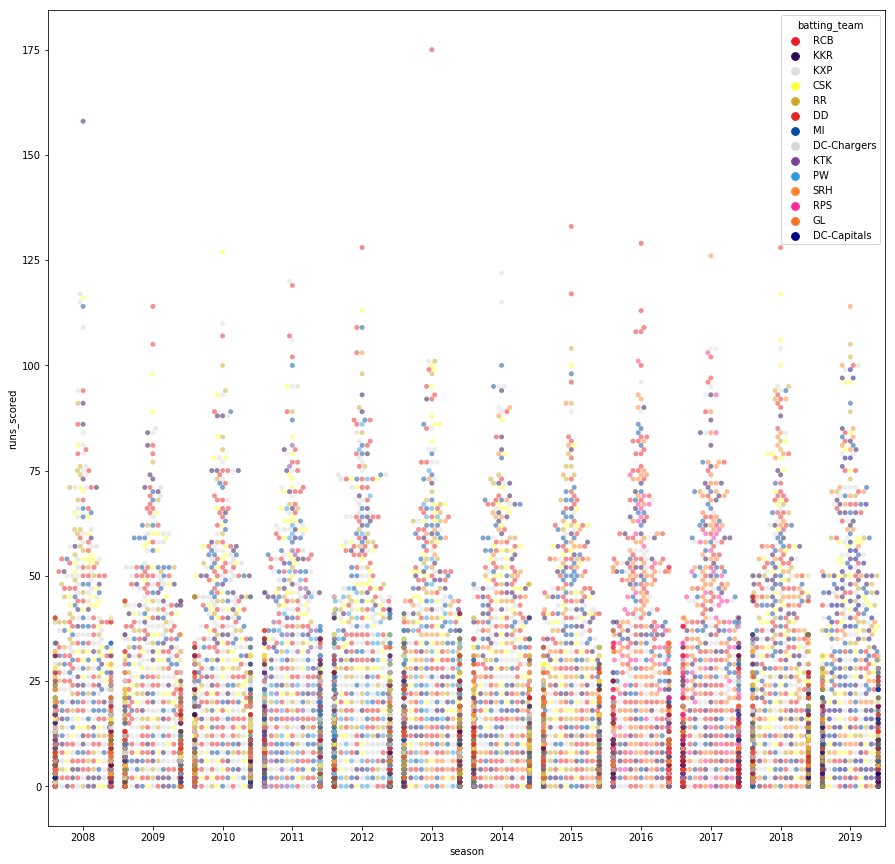

In [0]:
#plt.hist(df_batsman['runs_scored'])
plt.figure(figsize=(15,15))
sns.swarmplot(data=df_batsman,x='season',y='runs_scored',hue='batting_team',alpha=0.5);

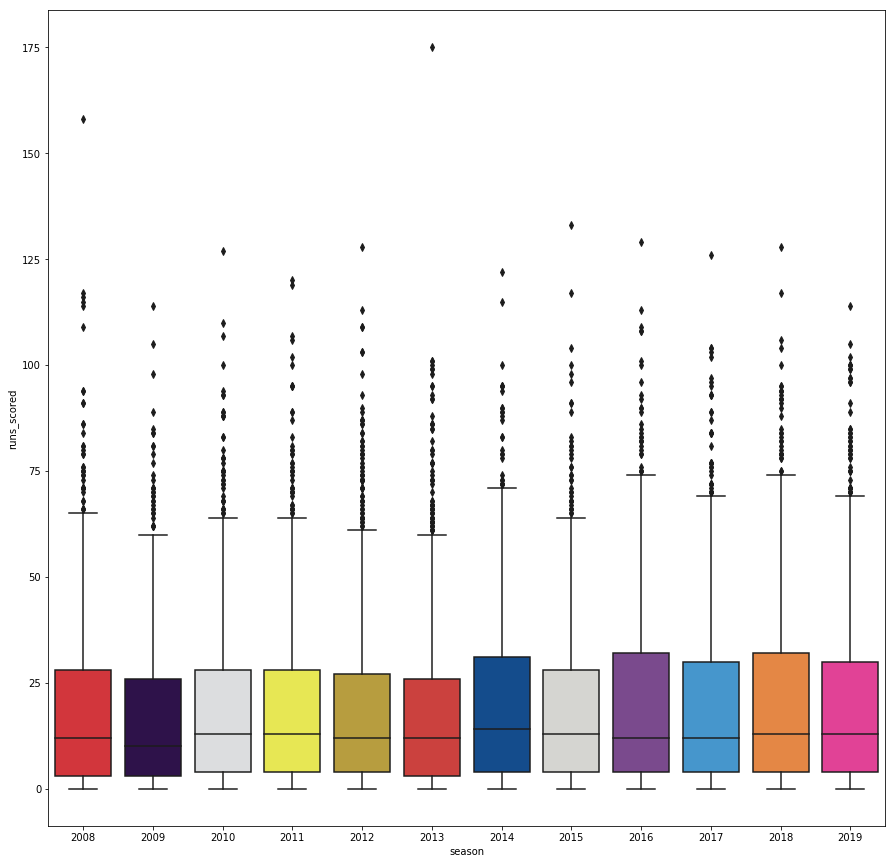

In [0]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df_batsman,x='season',y='runs_scored');

<Figure size 1080x1080 with 0 Axes>

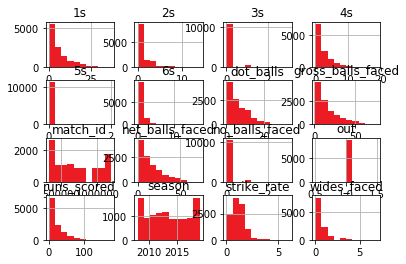

In [0]:
plt.figure(figsize=(15,15));
df_batsman.hist();

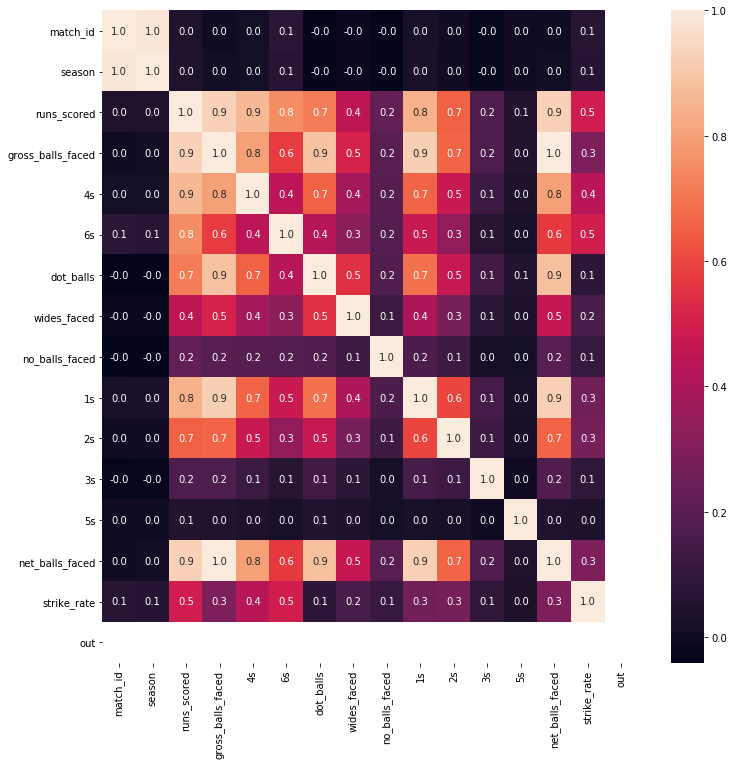

In [0]:
plt.figure(figsize=(12,12))
sns.heatmap(df_batsman.corr(),annot=True, fmt='.1f');

In [0]:
df_batsman['strike_rate'].mean()

1.1057432528313447

In [0]:
df_strike_rate_by_team_by_season = df_batsman.groupby(['season','batting_team'],as_index=False)['strike_rate'].mean()

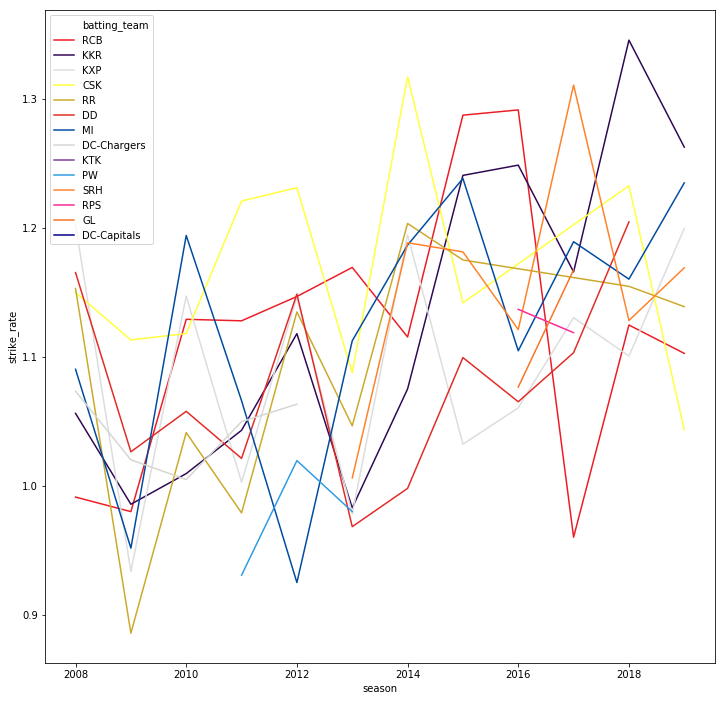

In [0]:
plt.figure(figsize=(12,12))
sns.lineplot(x='season',y='strike_rate',hue='batting_team',hue_order=list_of_teams,data=df_strike_rate_by_team_by_season);

In [0]:
list_of_seasons = list(df_batsman['season'].unique())
list_of_seasons

[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

In [0]:
type(list_of_seasons[0])

numpy.int64

In [0]:
df_batsman[df_batsman['batting_team'] == list_of_teams[0]].head()

,match_id,season,match_date,batsman,runs_scored,gross_balls_faced,4s,6s,dot_balls,wides_faced,no_balls_faced,1s,2s,3s,5s,net_balls_faced,strike_rate,inning,player_out,out,batting_team
0,335982,2008,2008-04-18,AA Noffke,9.0,12,1,0,6,2.0,0.0,5,0,0,0,10.0,0.900000,inning_2,AA Noffke,1.0,RCB
1,335982,2008,2008-04-18,B Akhil,0.0,2,0,0,2,0.0,0.0,0,0,0,0,2.0,0.000000,inning_2,B Akhil,1.0,RCB
3,335982,2008,2008-04-18,CL White,6.0,10,0,0,5,0.0,0.0,4,1,0,0,10.0,0.600000,inning_2,CL White,1.0,RCB
5,335982,2008,2008-04-18,JH Kallis,8.0,7,0,1,4,0.0,0.0,2,0,0,0,7.0,1.142857,inning_2,JH Kallis,1.0,RCB
6,335982,2008,2008-04-18,MV Boucher,7.0,11,1,0,8,2.0,0.0,1,1,0,0,9.0,0.777778,inning_2,MV Boucher,1.0,RCB


In [0]:
team_batsman_performances = []


for team in list_of_teams:
  team_batsman_performances.append(df_batsman[df_batsman['batting_team'] == team])





In [0]:
team_batsman_seasonal_performances = []

for season in list_of_seasons:
  for team in list_of_teams:
    team_batsman_seasonal_performances.append(df_batsman[(df_batsman['batting_team'] == team) & (df_batsman['season'] == season)])

In [0]:
team_batsman_seasonal_performances[5].tail()

,match_id,season,match_date,batsman,runs_scored,gross_balls_faced,4s,6s,dot_balls,wides_faced,no_balls_faced,1s,2s,3s,5s,net_balls_faced,strike_rate,inning,player_out,out,batting_team
840,336038,2008,2008-05-30,Mohammad Asif,3.0,5,0,0,2,0.0,0.0,3,0,0,0,5.0,0.600000,inning_2,Mohammad Asif,1.0,DD
842,336038,2008,2008-05-30,S Dhawan,5.0,13,0,0,8,1.0,0.0,5,0,0,0,12.0,0.416667,inning_2,S Dhawan,1.0,DD
848,336038,2008,2008-05-30,TM Dilshan,33.0,22,5,1,10,0.0,0.0,5,1,0,0,22.0,1.500000,inning_2,TM Dilshan,1.0,DD
849,336038,2008,2008-05-30,V Sehwag,3.0,4,0,0,1,0.0,0.0,3,0,0,0,4.0,0.750000,inning_2,V Sehwag,1.0,DD
850,336038,2008,2008-05-30,VY Mahesh,3.0,10,0,0,7,0.0,0.0,3,0,0,0,10.0,0.300000,inning_2,VY Mahesh,1.0,DD


In [0]:
team_strikes = [x['strike_rate'].mean() for x in team_batsman_seasonal_performances]

In [0]:
team_strikes

[0.9915526515904464,
 1.056401825365469,
 1.202833079892754,
 1.1500481080399783,
 1.153153656296517,
 1.1655124216335568,
 1.0905828831996556,
 1.0735745081757324,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.980269384979976,
 0.9859907124685171,
 0.9338550272255335,
 1.1133368641156853,
 0.8860924435530904,
 1.026645595335463,
 0.9519835902880134,
 1.0204388374465228,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 1.1293190143081708,
 1.0097428916308409,
 1.1473498510657016,
 1.1182966318536849,
 1.0415134397952381,
 1.0579955834582566,
 1.1942763226406121,
 1.0051074247423446,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 1.1281516828912888,
 1.0432944813457987,
 1.0030985913310173,
 1.2209616454706356,
 0.9792700398288545,
 1.0215216383786907,
 1.066244561047606,
 1.0500003852836552,
 0.9461400163782536,
 0.9309989949723838,
 nan,
 nan,
 nan,
 nan,
 1.1469852030560925,
 1.1181871397959715,
 1.1467032824242247,
 1.2313113768975041,
 1.135057771584718,
 1.1488366146728968,
 0.9253144712768002,
 1.06353969794

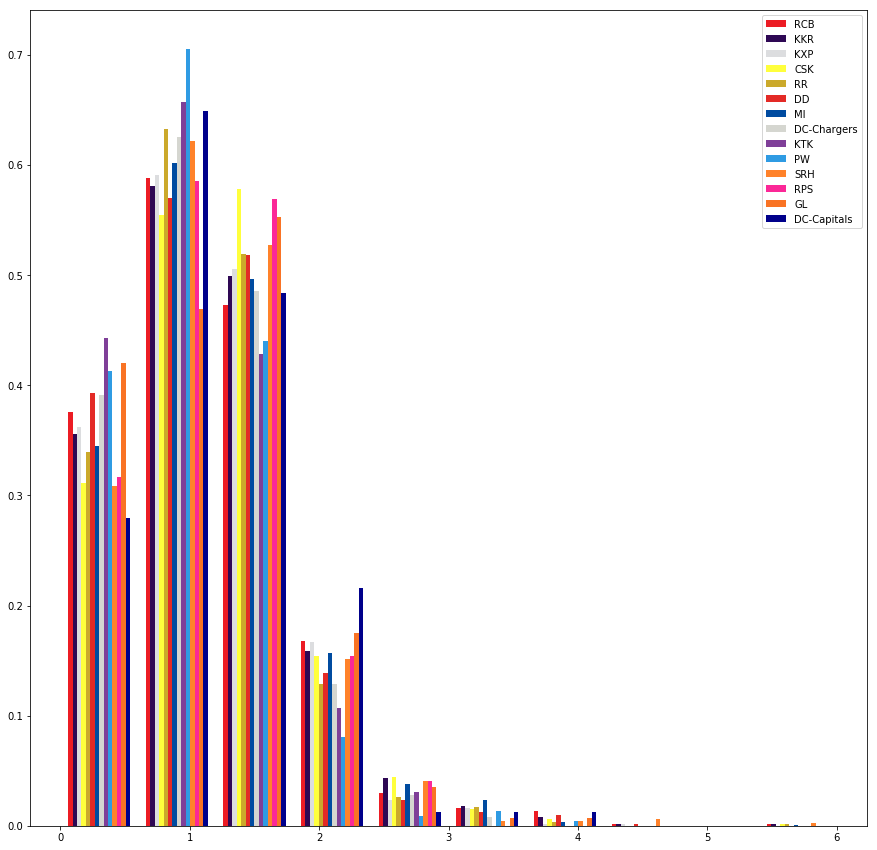

In [0]:
plt.figure(figsize=(15,15))
plt.hist([x['strike_rate'] for x in team_batsman_performances], density=1, histtype='bar',label=[x for x in list_of_teams]);
plt.legend()

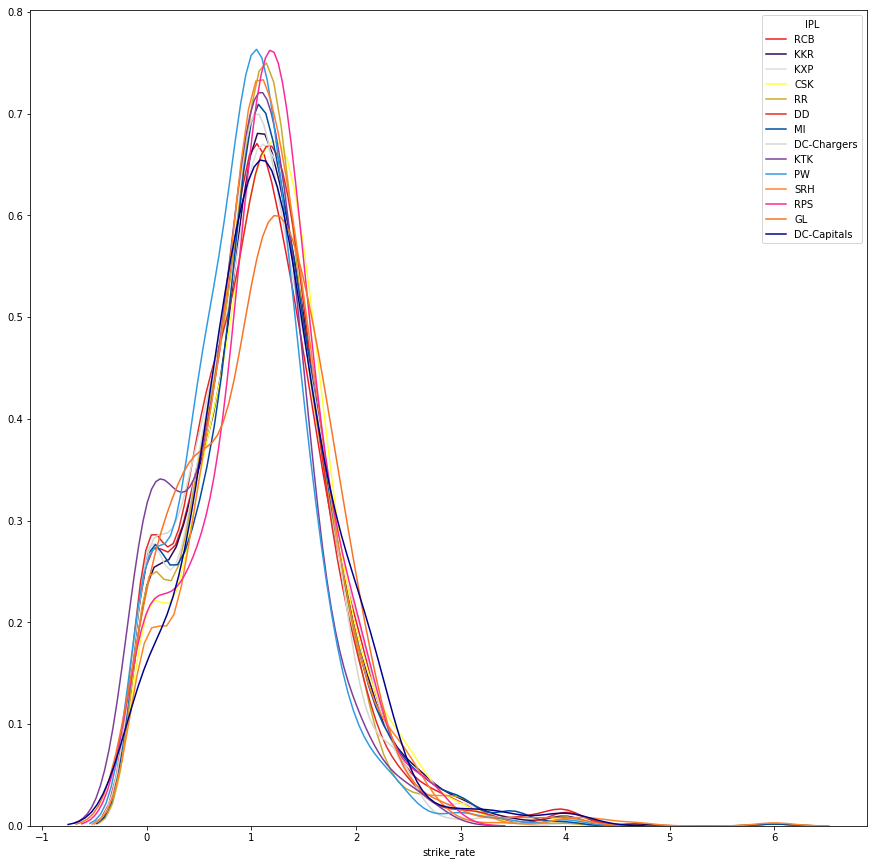

In [0]:
plt.figure(figsize=(15,15))
for i in range(len(list_of_teams)):
  g = sns.distplot(team_batsman_performances[i]['strike_rate'],rug=False,hist=False,label=list_of_teams[i])

plt.legend(title='IPL', loc='upper right')
plt.show(g)


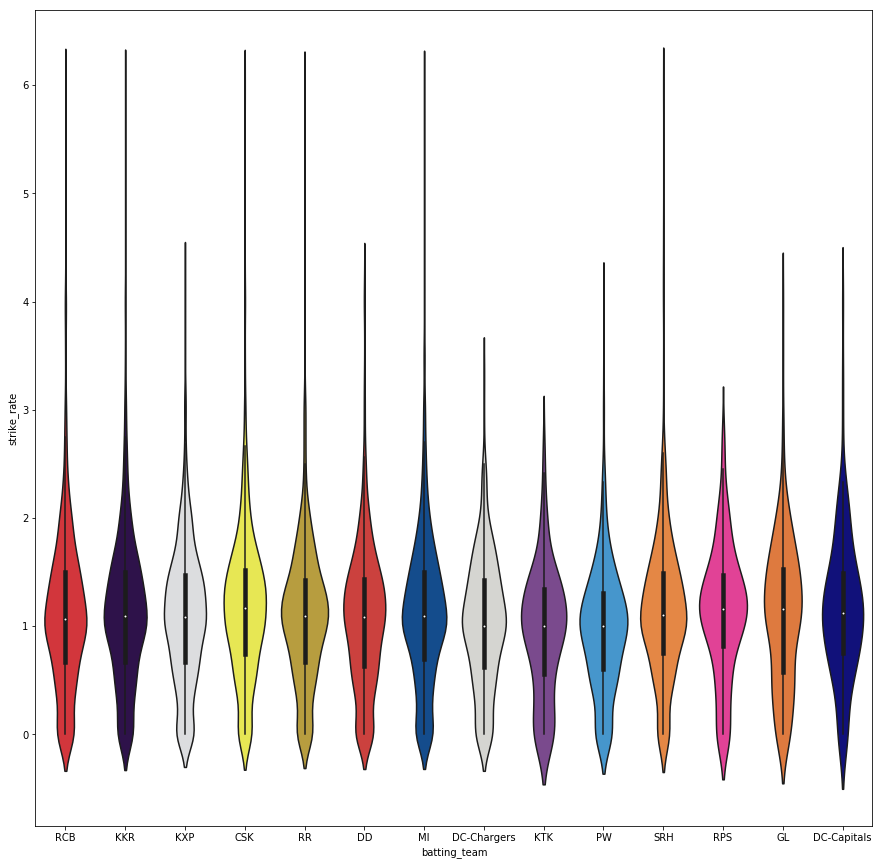

In [0]:
plt.figure(figsize=(15,15))



sns.violinplot(data=df_batsman, x='batting_team',y='strike_rate');

#plt.legend(title='IPL', loc='upper right')
#plt.show(x)





In [0]:
list_of_teams

['RCB',
 'KKR',
 'KXP',
 'CSK',
 'RR',
 'DD',
 'MI',
 'DC-Chargers',
 'KTK',
 'PW',
 'SRH',
 'RPS',
 'GL',
 'DC-Capitals']

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


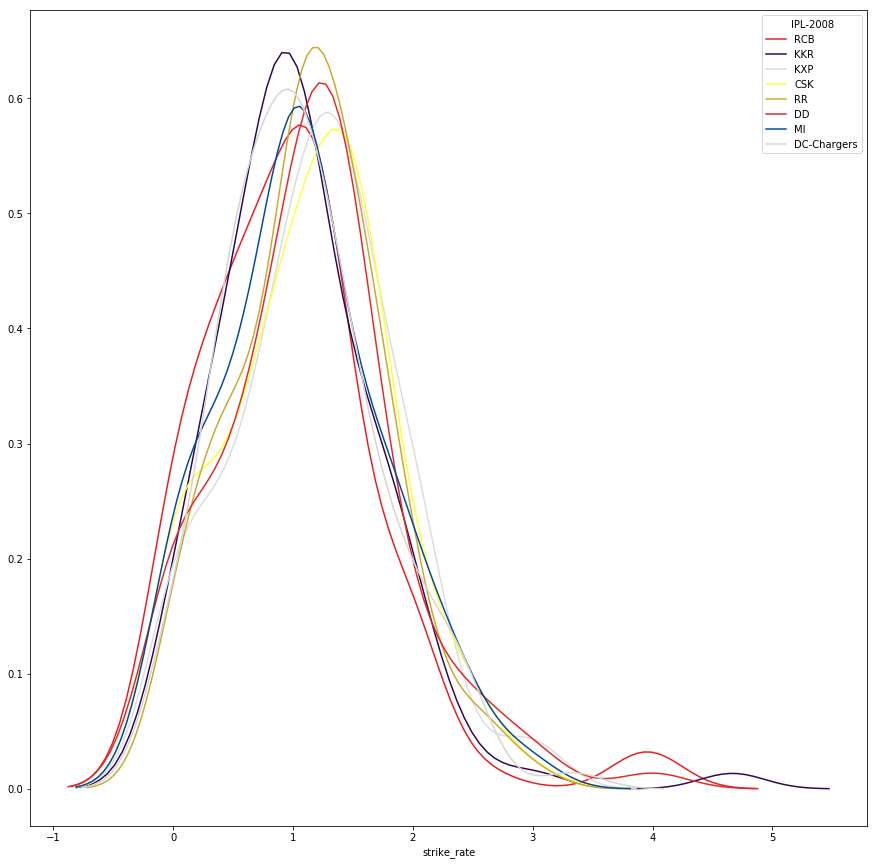

In [0]:
plt.figure(figsize=(15,15))
for i in range(len(list_of_teams)):
  g = sns.distplot(team_batsman_seasonal_performances[i]['strike_rate'],rug=False,hist=False,label=list_of_teams[i])

plt.legend(title='IPL-2008', loc='upper right')
plt.show(g)

## Runs being scored by season

## Runs by innings by season

## Highest run scorer

In [0]:
df_batsman.head()

,match_id,season,match_date,batsman,runs_scored,gross_balls_faced,4s,6s,dot_balls,wides_faced,no_balls_faced,1s,2s,3s,5s,net_balls_faced,strike_rate,inning,player_out,out,batting_team
0,335982,2008,2008-04-18,AA Noffke,9.0,12,1,0,6,2.0,0.0,5,0,0,0,10.0,0.900000,inning_2,AA Noffke,1.0,RCB
1,335982,2008,2008-04-18,B Akhil,0.0,2,0,0,2,0.0,0.0,0,0,0,0,2.0,0.000000,inning_2,B Akhil,1.0,RCB
2,335982,2008,2008-04-18,BB McCullum,158.0,77,10,13,23,4.0,0.0,22,9,0,0,73.0,2.164384,NaN,NaN,NaN,KKR
3,335982,2008,2008-04-18,CL White,6.0,10,0,0,5,0.0,0.0,4,1,0,0,10.0,0.600000,inning_2,CL White,1.0,RCB
4,335982,2008,2008-04-18,DJ Hussey,12.0,12,1,0,4,0.0,0.0,6,1,0,0,12.0,1.000000,inning_1,DJ Hussey,1.0,KKR


In [0]:
def flag_200s(row):
  if row['runs_scored'] >= 200:
    value = 1
  else:
    value = 0
  return value

def flag_100s(row):
  if (row['runs_scored'] >= 100) & (row['runs_scored'] < 200):
    value = 1
  else:
    value = 0
  return value

def flag_50s(row):
  if (row['runs_scored'] >= 50) & (row['runs_scored'] < 100):
    value = 1
  else:
    value = 0
  return value

def flag_30s(row):
  if (row['runs_scored'] >= 30) & (row['runs_scored'] < 50):
    value = 1
  else:
    value = 0
  return value

def calc_boundary_hit_rate(row):
  if row['net_balls_faced'] != 0:
    value = (row['6s']+row['5s']+row['4s'])/row['net_balls_faced']
  else:
    value = 0
  return value

def calc_farming_rate(row):
  if row['net_balls_faced'] != 0:
    value = (row['3s']+row['2s']+row['1s'])/row['net_balls_faced']
  else:
    value = 0
  return value

def calc_dot_ball_rate(row):
  if row['net_balls_faced'] != 0:
    value = (row['dot_balls'])/row['net_balls_faced']
  else:
    value = 0
  return value



In [0]:
df_batsman['200s'] = df_batsman.apply(lambda row: flag_200s(row),axis=1)
df_batsman['100s'] = df_batsman.apply(lambda row: flag_100s(row),axis=1)
df_batsman['50s'] = df_batsman.apply(lambda row: flag_50s(row),axis=1)
df_batsman['30s'] = df_batsman.apply(lambda row: flag_30s(row),axis=1)
df_batsman['boundary_hit_rate'] = df_batsman.apply(lambda row: calc_boundary_hit_rate(row),axis=1)
df_batsman['farming_rate'] = df_batsman.apply(lambda row: calc_farming_rate(row),axis=1)
df_batsman['dot_rate'] = df_batsman.apply(lambda row: calc_dot_ball_rate(row),axis=1)

In [0]:
df_batsman.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11294 entries, 0 to 11293
Data columns (total 28 columns):
match_id             11294 non-null int64
season               11294 non-null int64
match_date           11294 non-null object
batsman              11294 non-null object
runs_scored          11294 non-null float64
gross_balls_faced    11294 non-null int64
4s                   11294 non-null int64
6s                   11294 non-null int64
dot_balls            11294 non-null int64
wides_faced          11294 non-null float64
no_balls_faced       11294 non-null float64
1s                   11294 non-null int64
2s                   11294 non-null int64
3s                   11294 non-null int64
5s                   11294 non-null int64
net_balls_faced      11294 non-null float64
strike_rate          11294 non-null float64
inning               8787 non-null object
player_out           8787 non-null object
out                  8787 non-null float64
batting_team         11294 non-null ob

In [0]:
df_batsman.tail()

,match_id,season,match_date,batsman,runs_scored,gross_balls_faced,4s,6s,dot_balls,wides_faced,no_balls_faced,1s,2s,3s,5s,net_balls_faced,strike_rate,inning,player_out,out,batting_team,200s,100s,50s,30s,boundary_hit_rate,farming_rate,dot_rate
11289,1181768,2019,2019-05-12,RG Sharma,15.0,14,1,1,8,0.0,0.0,3,1,0,0,14.0,1.071429,inning_1,RG Sharma,1.0,MI,0,0,0,0,0.142857,0.285714,0.571429
11290,1181768,2019,2019-05-12,SA Yadav,15.0,17,1,0,6,0.0,0.0,9,1,0,0,17.0,0.882353,inning_1,SA Yadav,1.0,MI,0,0,0,0,0.058824,0.588235,0.352941
11291,1181768,2019,2019-05-12,SK Raina,8.0,15,0,0,8,1.0,0.0,6,1,0,0,14.0,0.571429,inning_2,SK Raina,1.0,CSK,0,0,0,0,0.000000,0.500000,0.571429
11292,1181768,2019,2019-05-12,SN Thakur,2.0,2,0,0,1,0.0,0.0,0,1,0,0,2.0,1.000000,inning_2,SN Thakur,1.0,CSK,0,0,0,0,0.000000,0.500000,0.500000
11293,1181768,2019,2019-05-12,SR Watson,80.0,62,8,4,30,3.0,0.0,16,4,0,0,59.0,1.355932,inning_2,SR Watson,1.0,CSK,0,0,1,0,0.203390,0.338983,0.508475


In [0]:
df_batsman[['season','batsman','runs_scored','net_balls_faced','100s','50s','30s','6s','5s','4s','3s','2s','1s','dot_balls','strike_rate']].sort_values(by=['runs_scored'],ascending=False).head(10)

,season,batsman,runs_scored,net_balls_faced,100s,50s,30s,6s,5s,4s,3s,2s,1s,dot_balls,strike_rate
5302,2013,CH Gayle,175.0,66.0,1,0,0,17,0,13,0,0,21,18,2.651515
2,2008,BB McCullum,158.0,73.0,1,0,0,13,0,10,0,9,22,23,2.164384
7528,2015,AB de Villiers,133.0,59.0,1,0,0,4,0,19,0,7,19,12,2.254237
8359,2016,AB de Villiers,129.0,52.0,1,0,0,12,0,10,0,1,15,15,2.480769
4687,2012,CH Gayle,128.0,62.0,1,0,0,13,0,7,0,1,20,21,2.064516
10149,2018,RR Pant,128.0,63.0,1,0,0,7,0,15,0,2,22,18,2.031746
2237,2010,M Vijay,127.0,56.0,1,0,0,11,1,8,0,2,20,15,2.267857
9146,2017,DA Warner,126.0,59.0,1,0,0,8,0,10,2,7,18,15,2.135593
6854,2014,V Sehwag,122.0,58.0,1,0,0,8,0,12,0,2,22,18,2.103448
2788,2011,PC Valthaty,120.0,63.0,1,0,0,2,0,19,0,5,22,16,1.904762


In [0]:
def calc_batting_strike_rate(row):
  if row['net_balls_faced'] != 0:
    value = row['runs_scored']/row['net_balls_faced']
  else:
    value = 0
  return value

def calc_batting_avg(row):
  if row['out'] != 0:
    value = row['runs_scored']/row['out']
  else:
    value = 0
  return value

def calc_balls_per_inning(row):
  if row['out'] != 0:
    value = row['net_balls_faced']/row['out']
  else:
    value = 0
  return value

In [0]:
df_batsman_seasonal_stats = df_batsman[['season','batsman','runs_scored','gross_balls_faced','net_balls_faced',\
                                        'out','100s','50s','30s','6s','5s','4s','3s','2s',\
                                        '1s','dot_balls','strike_rate']].groupby(['season','batsman'],as_index=False)['runs_scored','gross_balls_faced','net_balls_faced','out',\
                                                                                          '100s','50s','30s','6s','5s','4s','3s',\
                                                                                          '2s','1s','dot_balls'].sum()

In [0]:
df_batsman_seasonal_stats.head(10)

,season,batsman,runs_scored,gross_balls_faced,net_balls_faced,out,100s,50s,30s,6s,5s,4s,3s,2s,1s,dot_balls
0,2008,A Chopra,42.0,55,52.0,5.0,0,0,0,0,0,5,0,2,18,30
1,2008,A Kumble,13.0,17,17.0,2.0,0,0,0,0,0,1,0,1,7,8
2,2008,A Mishra,37.0,42,42.0,3.0,0,0,1,0,0,3,0,2,21,16
3,2008,A Mukund,0.0,1,1.0,1.0,0,0,0,0,0,0,0,0,0,1
4,2008,A Nehra,3.0,13,13.0,1.0,0,0,0,0,0,0,0,0,3,10
5,2008,A Symonds,161.0,111,105.0,2.0,1,0,1,9,0,15,1,5,34,47
6,2008,AA Noffke,9.0,12,10.0,1.0,0,0,0,0,0,1,0,0,5,6
7,2008,AB Agarkar,54.0,49,46.0,5.0,0,0,0,2,0,5,0,4,14,24
8,2008,AB Dinda,2.0,4,4.0,1.0,0,0,0,0,0,0,0,0,2,2
9,2008,AB de Villiers,95.0,100,98.0,5.0,0,0,0,1,0,5,0,16,37,41


In [0]:
df_batsman_seasonal_stats['season_strike_rate'] = df_batsman_seasonal_stats.apply(lambda row: calc_batting_strike_rate(row),axis=1)
df_batsman_seasonal_stats['season_batting_avg'] = df_batsman_seasonal_stats.apply(lambda row: calc_batting_avg(row),axis=1)
df_batsman_seasonal_stats['balls_per_inning'] = df_batsman_seasonal_stats.apply(lambda row: calc_balls_per_inning(row),axis=1)

df_batsman_seasonal_stats['boundary_hit_rate'] = df_batsman_seasonal_stats.apply(lambda row: calc_boundary_hit_rate(row),axis=1)
df_batsman_seasonal_stats['farming_rate'] = df_batsman_seasonal_stats.apply(lambda row: calc_farming_rate(row),axis=1)
df_batsman_seasonal_stats['dot_rate'] = df_batsman_seasonal_stats.apply(lambda row: calc_dot_ball_rate(row),axis=1)


df_batsman_seasonal_stats.head()


,season,batsman,runs_scored,gross_balls_faced,net_balls_faced,out,100s,50s,30s,6s,5s,4s,3s,2s,1s,dot_balls,season_strike_rate,season_batting_avg,balls_per_inning,boundary_hit_rate,farming_rate,dot_rate
0,2008,A Chopra,42.0,55,52.0,5.0,0,0,0,0,0,5,0,2,18,30,0.807692,8.400000,10.4,0.096154,0.384615,0.576923
1,2008,A Kumble,13.0,17,17.0,2.0,0,0,0,0,0,1,0,1,7,8,0.764706,6.500000,8.5,0.058824,0.470588,0.470588
2,2008,A Mishra,37.0,42,42.0,3.0,0,0,1,0,0,3,0,2,21,16,0.880952,12.333333,14.0,0.071429,0.547619,0.380952
3,2008,A Mukund,0.0,1,1.0,1.0,0,0,0,0,0,0,0,0,0,1,0.000000,0.000000,1.0,0.000000,0.000000,1.000000
4,2008,A Nehra,3.0,13,13.0,1.0,0,0,0,0,0,0,0,0,3,10,0.230769,3.000000,13.0,0.000000,0.230769,0.769231


In [0]:
df_batsman_seasonal_stats.sort_values(by=['season_batting_avg','season_strike_rate','balls_per_inning'],ascending=False).head(20)

,season,batsman,runs_scored,gross_balls_faced,net_balls_faced,out,100s,50s,30s,6s,5s,4s,3s,2s,1s,dot_balls,season_strike_rate,season_batting_avg,balls_per_inning,boundary_hit_rate,farming_rate,dot_rate
60,2008,LA Pomersbach,152.0,101,99.0,1.0,0,1,1,9,0,13,0,3,40,36,1.535354,152.000000,99.000000,0.222222,0.434343,0.363636
119,2008,SM Katich,96.0,72,69.0,1.0,0,1,0,2,0,11,1,8,21,29,1.391304,96.000000,69.000000,0.188406,0.434783,0.420290
1172,2015,JA Morkel,86.0,70,65.0,1.0,0,1,0,2,0,9,0,5,28,26,1.323077,86.000000,65.000000,0.169231,0.507692,0.400000
70,2008,MEK Hussey,168.0,100,100.0,2.0,1,0,1,11,0,12,0,8,38,31,1.680000,84.000000,50.000000,0.230000,0.460000,0.310000
227,2009,MK Pandey,168.0,120,118.0,2.0,1,0,1,4,0,17,0,18,40,41,1.423729,84.000000,59.000000,0.177966,0.491525,0.347458
1748,2019,MS Dhoni,416.0,317,309.0,5.0,0,3,4,23,0,22,0,35,120,117,1.346278,83.200000,61.800000,0.145631,0.501618,0.378641
725,2012,JP Duminy,244.0,195,190.0,3.0,0,2,0,11,0,13,0,17,92,62,1.284211,81.333333,63.333333,0.126316,0.573684,0.326316
1383,2016,V Kohli,973.0,655,640.0,12.0,4,7,1,38,0,84,2,56,291,184,1.520312,81.083333,53.333333,0.190625,0.545312,0.287500
5,2008,A Symonds,161.0,111,105.0,2.0,1,0,1,9,0,15,1,5,34,47,1.533333,80.500000,52.500000,0.228571,0.380952,0.447619
1612,2018,MS Dhoni,455.0,321,302.0,6.0,0,3,3,30,0,24,2,18,137,110,1.506623,75.833333,50.333333,0.178808,0.519868,0.364238


In [0]:
df_batsman_seasonal_stats.query('batsman=="MS Dhoni"')

,season,batsman,runs_scored,gross_balls_faced,net_balls_faced,out,100s,50s,30s,6s,5s,4s,3s,2s,1s,dot_balls,season_strike_rate,season_batting_avg,balls_per_inning,boundary_hit_rate,farming_rate,dot_rate
76,2008,MS Dhoni,414.0,319,310.0,10.0,0,2,6,15,0,38,2,26,114,124,1.335484,41.400000,31.000000,0.170968,0.458065,0.400000
232,2009,MS Dhoni,332.0,270,261.0,8.0,0,2,2,9,0,22,1,24,139,75,1.272031,41.500000,32.625000,0.118774,0.628352,0.287356
398,2010,MS Dhoni,287.0,215,210.0,9.0,0,2,3,8,0,26,0,20,95,66,1.366667,31.888889,23.333333,0.161905,0.547619,0.314286
567,2011,MS Dhoni,392.0,247,247.0,9.0,0,2,2,23,0,25,1,22,107,69,1.587045,43.555556,27.444444,0.194332,0.526316,0.279352
751,2012,MS Dhoni,357.0,283,278.0,12.0,0,1,3,9,0,26,1,37,122,88,1.284173,29.750000,23.166667,0.125899,0.575540,0.316547
918,2013,MS Dhoni,461.0,298,283.0,11.0,0,4,3,25,0,32,3,30,114,94,1.628975,41.909091,25.727273,0.201413,0.519435,0.332155
1066,2014,MS Dhoni,371.0,258,250.0,5.0,0,1,3,20,0,22,2,28,101,85,1.484000,74.200000,50.000000,0.168000,0.524000,0.340000
1197,2015,MS Dhoni,372.0,309,305.0,12.0,0,1,4,17,0,27,0,24,114,127,1.219672,31.000000,25.416667,0.144262,0.452459,0.416393
1332,2016,MS Dhoni,284.0,220,210.0,7.0,0,1,3,14,0,18,1,20,85,82,1.352381,40.571429,30.000000,0.152381,0.504762,0.390476
1471,2017,MS Dhoni,290.0,261,250.0,11.0,0,1,2,16,0,15,0,20,94,116,1.160000,26.363636,22.727273,0.124000,0.456000,0.464000


In [0]:
df_mvp = pd.DataFrame(df_batsman_seasonal_stats.\
                      groupby('batsman',as_index=False)\
                      ['runs_scored','gross_balls_faced','net_balls_faced','out',\
                       '100s','50s','30s','6s','5s','4s','3s','2s','1s','dot_balls']\
                      .sum()\
                      .sort_values(by=['runs_scored','gross_balls_faced','net_balls_faced','100s','50s','30s'],\
                                   ascending=False)['batsman']\
                      .head(10)\
                      .reset_index(drop=True))



In [0]:
list(df_mvp['batsman'])


['V Kohli',
 'SK Raina',
 'RG Sharma',
 'DA Warner',
 'S Dhawan',
 'CH Gayle',
 'MS Dhoni',
 'RV Uthappa',
 'AB de Villiers',
 'G Gambhir']

In [0]:
df_mvp

,batsman
0,V Kohli
1,SK Raina
2,RG Sharma
3,DA Warner
4,S Dhawan
5,CH Gayle
6,MS Dhoni
7,RV Uthappa
8,AB de Villiers
9,G Gambhir


In [0]:
mvp_list = df_mvp['batsman']

In [0]:
len(mvp_list)

10

In [0]:
df_mvp_comparison = df_batsman_seasonal_stats.groupby('batsman',as_index=False)['runs_scored','gross_balls_faced','net_balls_faced','out',\
                                                            '100s','50s','30s','6s','5s','4s','3s',\
                                                            '2s','1s','dot_balls'].sum().query('batsman in @mvp_list') 

df_mvp_comparison['ipl_strike_rate'] = df_mvp_comparison.apply(lambda row: calc_batting_strike_rate(row),axis=1)
df_mvp_comparison['ipl_batting_avg'] = df_mvp_comparison.apply(lambda row: calc_batting_avg(row),axis=1)
df_mvp_comparison['ipl_balls_per_inning'] = df_mvp_comparison.apply(lambda row: calc_balls_per_inning(row),axis=1)

df_mvp_comparison['boundary_hit_rate'] = df_mvp_comparison.apply(lambda row: calc_boundary_hit_rate(row),axis=1)
df_mvp_comparison['farming_rate'] = df_mvp_comparison.apply(lambda row: calc_farming_rate(row),axis=1)
df_mvp_comparison['dot_rate'] = df_mvp_comparison.apply(lambda row: calc_dot_ball_rate(row),axis=1)


df_mvp_comparison = df_mvp_comparison.sort_values(by=['runs_scored','gross_balls_faced','net_balls_faced','100s','50s','30s'],\
                                   ascending=False).reset_index(drop=True)

df_mvp_comparison

,batsman,runs_scored,gross_balls_faced,net_balls_faced,out,100s,50s,30s,6s,5s,4s,3s,2s,1s,dot_balls,ipl_strike_rate,ipl_batting_avg,ipl_balls_per_inning,boundary_hit_rate,farming_rate,dot_rate
0,V Kohli,5412.0,4208,4111.0,143.0,5,36,36,191,0,481,11,292,1725,1508,1.316468,37.846154,28.748252,0.163464,0.493311,0.366821
1,SK Raina,5368.0,4041,3914.0,161.0,1,38,37,194,1,493,11,264,1666,1412,1.371487,33.341615,24.310559,0.175779,0.495912,0.360756
2,RG Sharma,4898.0,3816,3744.0,154.0,1,36,31,195,1,431,5,204,1576,1404,1.308226,31.805195,24.311688,0.167468,0.476763,0.375000
3,DA Warner,4706.0,3397,3305.0,109.0,4,44,19,181,1,458,17,270,1192,1278,1.423903,43.174312,30.321101,0.193646,0.447504,0.386687
4,S Dhawan,4579.0,3775,3669.0,138.0,0,37,26,96,2,524,18,201,1441,1493,1.248024,33.181159,26.586957,0.169528,0.452439,0.406923
5,CH Gayle,4484.0,3118,2969.0,109.0,6,28,21,326,0,369,3,80,883,1457,1.510273,41.137615,27.238532,0.234086,0.325362,0.490738
6,MS Dhoni,4431.0,3318,3215.0,105.0,0,23,38,209,0,297,13,304,1342,1153,1.378227,42.200000,30.619048,0.157387,0.516019,0.358631
7,RV Uthappa,4411.0,3488,3380.0,153.0,0,24,40,156,3,435,13,205,1271,1405,1.305030,28.830065,22.091503,0.175740,0.440533,0.415680
8,AB de Villiers,4395.0,2972,2906.0,110.0,3,33,20,212,0,357,15,220,1210,958,1.512388,39.954545,26.418182,0.195802,0.497247,0.329663
9,G Gambhir,4217.0,3524,3404.0,135.0,0,36,22,59,0,492,15,249,1352,1357,1.238837,31.237037,25.214815,0.161868,0.474736,0.398649


# Batting Graphics

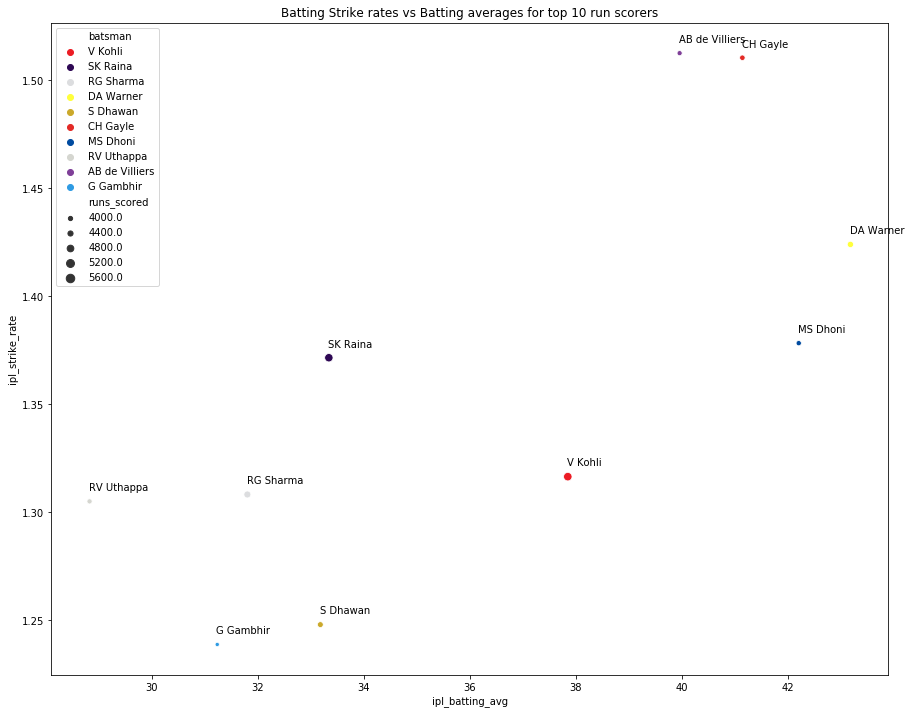

In [0]:
plt.figure(figsize=(15,12))
p1 = sns.scatterplot(x="ipl_batting_avg", y="ipl_strike_rate",\
                     hue='batsman', hue_order=mvp_list,size='runs_scored',\
                     data=df_mvp_comparison\
                     
                    )
for line in range(0,df_mvp_comparison.shape[0]):
  p1.text(df_mvp_comparison.ipl_batting_avg[line]-0.015,df_mvp_comparison.ipl_strike_rate[line]+0.005,df_mvp_comparison.batsman[line])

p1.set_title('Batting Strike rates vs Batting averages for top 10 run scorers')
plt.show(p1)



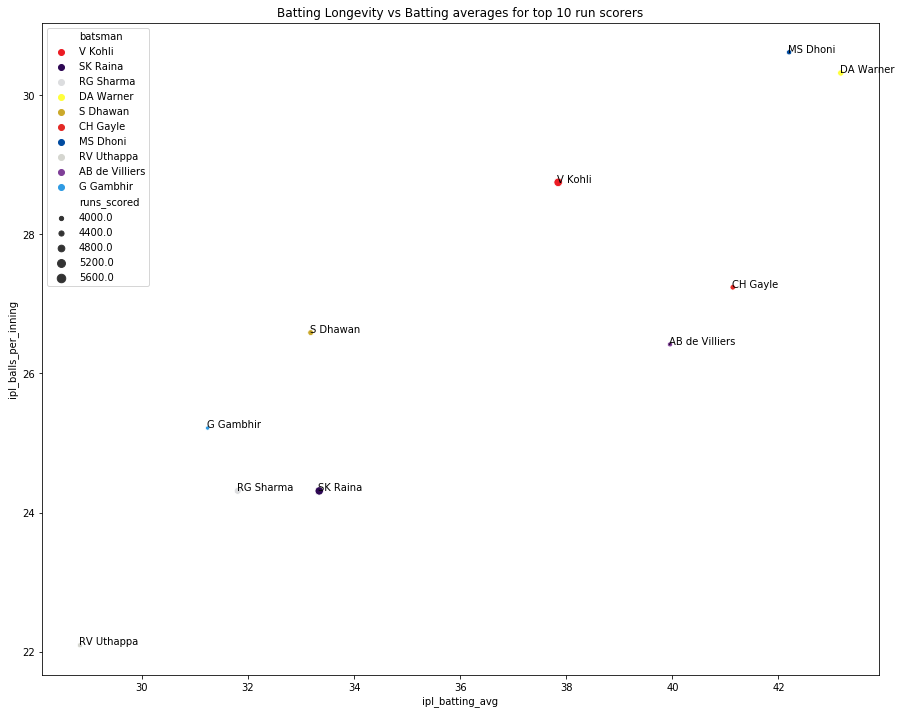

In [0]:
plt.figure(figsize=(15,12))
p2 = sns.scatterplot(x="ipl_batting_avg", y="ipl_balls_per_inning",\
                     hue='batsman', hue_order=mvp_list,size='runs_scored',\
                     data=df_mvp_comparison\
                     
                    )
for line in range(0,df_mvp_comparison.shape[0]):
  p2.text(df_mvp_comparison.ipl_batting_avg[line]-0.015,df_mvp_comparison.ipl_balls_per_inning[line]+0.005,df_mvp_comparison.batsman[line])

p2.set_title('Batting Longevity vs Batting averages for top 10 run scorers')
plt.show(p2)

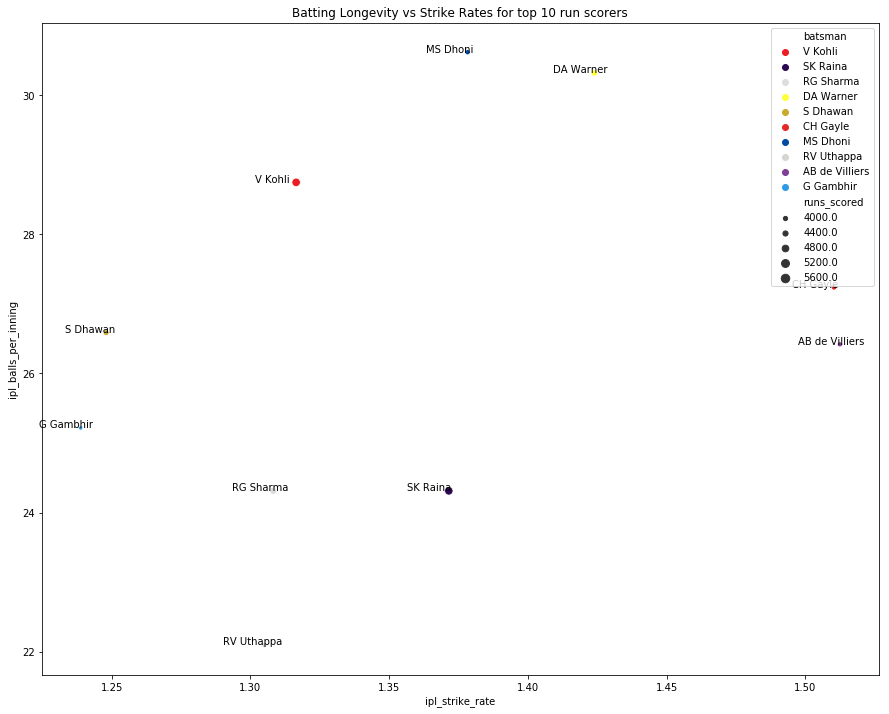

In [0]:
plt.figure(figsize=(15,12))
p3 = sns.scatterplot(x="ipl_strike_rate", y="ipl_balls_per_inning",\
                     hue='batsman', hue_order=mvp_list,size='runs_scored',\
                     data=df_mvp_comparison\
                     
                    )
for line in range(0,df_mvp_comparison.shape[0]):
  p3.text(df_mvp_comparison.ipl_strike_rate[line]-0.015,df_mvp_comparison.ipl_balls_per_inning[line]+0.005,df_mvp_comparison.batsman[line])

p3.set_title('Batting Longevity vs Strike Rates for top 10 run scorers')
plt.show(p3)

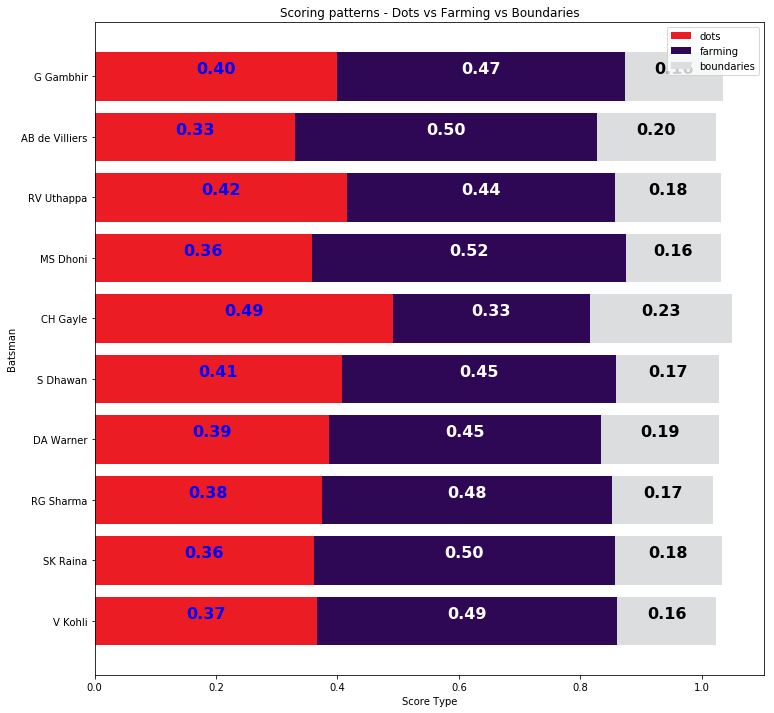

In [0]:
plt.figure(figsize=(12,12))

p4 = plt.barh(y=df_mvp_comparison['batsman'],width=df_mvp_comparison['dot_rate'])
p5 = plt.barh(y=df_mvp_comparison['batsman'],width=df_mvp_comparison['farming_rate'],left=df_mvp_comparison['dot_rate'])
p6 = plt.barh(y=df_mvp_comparison['batsman'],width=df_mvp_comparison['boundary_hit_rate'],left=df_mvp_comparison['dot_rate']+df_mvp_comparison['farming_rate'])


for r1, r2, r3 in zip(p4, p5, p6):
    w1 = r1.get_width()
    w2 = r2.get_width()
    w3 = r3.get_width()
    h1 = r1.get_height()
    h2 = r2.get_height()
    h3 = r3.get_height()
    plt.text(r1.get_x()+w1/2.,r1.get_y()+h1/2.,"%.2f" % w1,ha="center", va="bottom", color="blue", fontsize=16, fontweight="bold")
    plt.text(r2.get_x()+w2/2.,r2.get_y()+h2/2.,"%.2f" % w2,ha="center", va="bottom", color="white", fontsize=16, fontweight="bold")
    plt.text(r3.get_x()+w3/2.,r3.get_y()+h3/2.,"%.2f" % w3,ha="center", va="bottom", color="black", fontsize=16, fontweight="bold")
        
    

plt.ylabel('Batsman')
plt.xlabel('Score Type')
plt.title('Scoring patterns - Dots vs Farming vs Boundaries')

plt.legend((p4,p5,p6),('dots','farming','boundaries'),loc='best')

plt.show()

In [0]:
df_mvp_comparison.ipl_batting_avg[0]

37.84615384615385

In [0]:
df_mvp_comparison.shape[0]

10

In [0]:
df_best_batsman = df_batsman.merge(df_mvp,how='right',left_on=['batsman'],right_on=['batsman'])

In [0]:
df_best_batsman.head()

,match_id,season,match_date,batsman,runs_scored,gross_balls_faced,4s,6s,dot_balls,wides_faced,no_balls_faced,1s,2s,3s,5s,net_balls_faced,strike_rate,inning,player_out,out,batting_team,200s,100s,50s,30s,boundary_hit_rate,farming_rate,dot_rate
0,335982,2008,2008-04-18,V Kohli,1.0,5,0,0,4,0.0,0.0,1,0,0,0,5.0,0.200000,inning_2,V Kohli,1.0,RCB,0,0,0,0,0.000000,0.200000,0.800000
1,335985,2008,2008-04-20,V Kohli,23.0,15,3,1,6,1.0,0.0,5,0,0,0,14.0,1.642857,inning_2,V Kohli,1.0,RCB,0,0,0,0,0.285714,0.357143,0.428571
2,335992,2008,2008-04-26,V Kohli,13.0,16,0,1,9,2.0,0.0,5,1,0,0,14.0,0.928571,inning_1,V Kohli,1.0,RCB,0,0,0,0,0.071429,0.428571,0.642857
3,335996,2008,2008-04-28,V Kohli,12.0,7,2,0,2,0.0,0.0,2,1,0,0,7.0,1.714286,inning_2,V Kohli,1.0,RCB,0,0,0,0,0.285714,0.428571,0.285714
4,335998,2008,2008-04-30,V Kohli,1.0,1,0,0,0,0.0,0.0,1,0,0,0,1.0,1.000000,NaN,NaN,NaN,RCB,0,0,0,0,0.000000,1.000000,0.000000


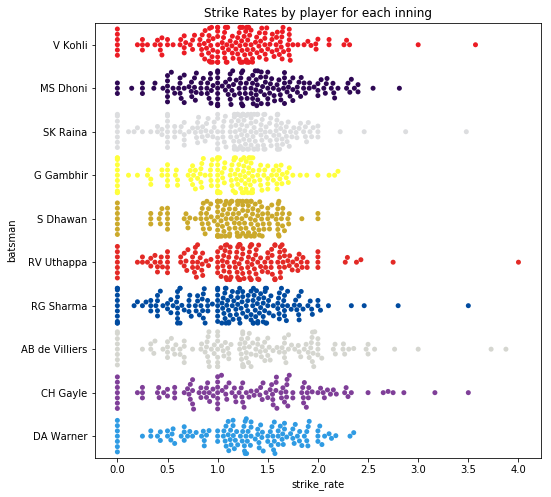

In [0]:
plt.figure(figsize=(8,8));
sns.swarmplot(data=df_best_batsman,x='strike_rate',y='batsman').set_title('Strike Rates by player for each inning');
#sns.violinplot(data=df_best_batsman,x='strike_rate',y='batsman')

Text(140, 6, 'highest=175')

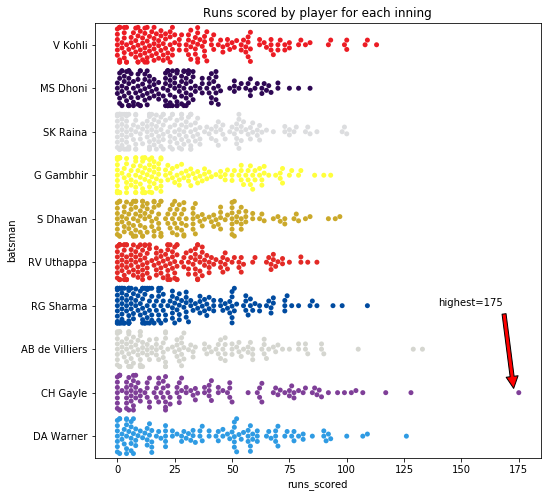

In [0]:
plt.figure(figsize=(8,8))
s_runs = sns.swarmplot(data=df_best_batsman,x='runs_scored',y='batsman').set_title('Runs scored by player for each inning');
#plt.text(150,7.6,'highest=175', color="black", fontsize=10, fontweight="bold",bbox={'facecolor':'gray', 'alpha':0.5, 'pad':5})
plt.annotate('highest=175', color="black", fontsize=10, xy=(173, 8.0), xytext=(140, 6),arrowprops=dict(facecolor='red', shrink=0.05))

SyntaxError: ignored

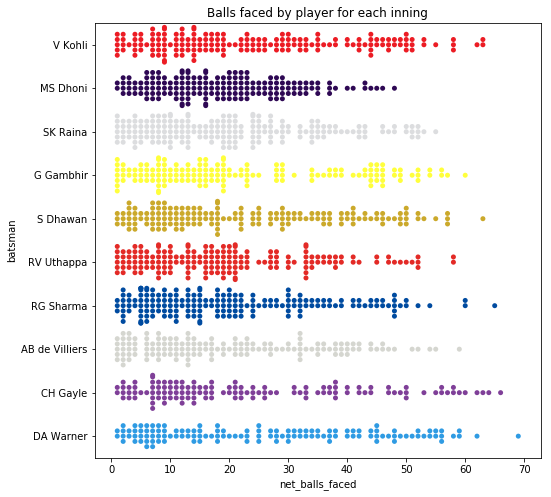

In [0]:
plt.figure(figsize=(8,8))
sns.swarmplot(data=df_best_batsman,x='net_balls_faced',y='batsman').set_title('Balls faced by player for each inning');

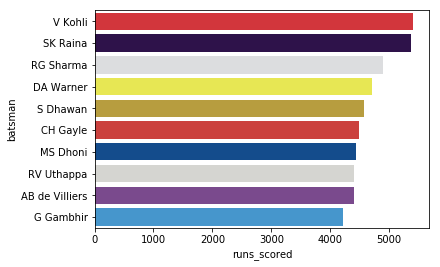

In [0]:
sns.barplot(data=df_mvp_comparison,x='runs_scored',y='batsman');

In [0]:
df_match_summary['player_of_match'].value_counts()

CH Gayle           21
AB de Villiers     20
RG Sharma          17
DA Warner          17
MS Dhoni           17
YK Pathan          16
SR Watson          15
SK Raina           14
G Gambhir          13
MEK Hussey         12
V Kohli            12
AM Rahane          12
AD Russell         11
A Mishra           11
DR Smith           11
V Sehwag           11
JH Kallis          10
KA Pollard         10
SP Narine           9
SE Marsh            9
AT Rayudu           9
UT Yadav            8
RA Jadeja           8
Harbhajan Singh     8
SR Tendulkar        8
Rashid Khan         7
RV Uthappa          7
AC Gilchrist        7
S Dhawan            6
RR Pant             6
                   ..
Ishan Kishan        1
MS Gony             1
KK Cooper           1
SM Katich           1
CRD Fernando        1
Q de Kock           1
JDP Oram            1
JD Ryder            1
YS Chahal           1
EJG Morgan          1
R McLaren           1
GD McGrath          1
S Aravind           1
Kuldeep Yadav       1
DL Vettori

In [0]:
df_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178949 entries, 0 to 178948
Data columns (total 47 columns):
batsman                       178940 non-null object
batsman_runs                  178940 non-null float64
batting_team                  178949 non-null object
bowler                        178940 non-null object
byes                          480 non-null float64
extras_runs                   178299 non-null float64
kind                          8827 non-null object
legbyes                       2933 non-null float64
inning                        178949 non-null object
delivery                      178949 non-null object
match_id                      178949 non-null int64
noballs                       712 non-null float64
non_striker                   178940 non-null object
player_out                    8827 non-null object
total                         178940 non-null float64
wides                         5405 non-null float64
non_boundary                  14 non-null float64

In [0]:
df_details.head()

,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,kind,legbyes,inning,delivery,match_id,noballs,non_striker,player_out,total,wides,non_boundary,penalty,method,over,fielder_1,fielder_2,fielder_3,delivery_in_over,inning_quarter,catch_attributed_to,wicket_attributed_to,4_flag,6_flag,dot_ball_flag,1_run_flag,2_run_flag,3_run_flag,5_run_flag,caught_flag,lbw_flag,stumped_flag,bowled_flag,run_out_flag,hit_wicket_flag,caught_and_bowled_flag,retired_hurt_flag,obstructing_the_field_flag,wide_flag,noball_flag,legbye_flag,bye_flag
0,PA Patel,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,0.1,548314,NaN,S Dhawan,NaN,0.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,1,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
1,PA Patel,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,0.2,548314,NaN,S Dhawan,NaN,0.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,2,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
2,PA Patel,1.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,0.3,548314,NaN,S Dhawan,NaN,1.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,3,Q1,None,None,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
3,S Dhawan,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,0.4,548314,NaN,PA Patel,NaN,0.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,4,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
4,S Dhawan,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,0.5,548314,NaN,PA Patel,NaN,0.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,5,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False


In [0]:
df_details.query('match_id==335982' ).groupby(['inning','inning_quarter'],as_index=False)['total','batsman_runs','extras_runs','byes','legbyes','wides','noballs'].sum()

,inning,inning_quarter,total,batsman_runs,extras_runs,byes,legbyes,wides,noballs
0,inning_1,Q1,60.0,50.0,10.0,0.0,4.0,6.0,0.0
1,inning_1,Q2,27.0,27.0,0.0,0.0,0.0,0.0,0.0
2,inning_1,Q3,67.0,60.0,7.0,4.0,0.0,3.0,0.0
3,inning_1,Q4,68.0,68.0,0.0,0.0,0.0,0.0,0.0
4,inning_2,Q1,24.0,17.0,7.0,0.0,5.0,2.0,0.0
5,inning_2,Q2,27.0,20.0,7.0,0.0,2.0,5.0,0.0
6,inning_2,Q3,30.0,26.0,4.0,0.0,1.0,3.0,0.0
7,inning_2,Q4,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [0]:
df_inning_wise = df_details[['match_id','inning','inning_quarter',\
                             'player_out','batsman_runs','total','6_flag','4_flag',\
                             'dot_ball_flag','delivery','wides','noballs']].groupby(['match_id',\
                                                                             'inning',\
                                                                             'inning_quarter'],as_index=False)['batsman_runs','total','player_out','delivery',\
                                                                                                               'wides','noballs','6_flag',\
                                                                                                               '4_flag','dot_ball_flag'].agg({'batsman_runs':'sum','total':'sum',\
                                                                                                               'player_out':'count','delivery':'count',\
                                                                                                               'wides':'sum','noballs':'sum',\
                                                                                                               '6_flag':'count','4_flag':'count',\
                                                                                                               'dot_ball_flag':'count'})



In [0]:
df_inning_wise.head()

,match_id,inning,inning_quarter,batsman_runs,total,player_out,delivery,wides,noballs,6_flag,4_flag,dot_ball_flag
0,335982,inning_1,Q1,50.0,60.0,0,32,6.0,0.0,3,7,18
1,335982,inning_1,Q2,27.0,27.0,1,30,0.0,0.0,1,0,10
2,335982,inning_1,Q3,60.0,67.0,1,32,3.0,0.0,4,5,10
3,335982,inning_1,Q4,68.0,68.0,1,30,0.0,0.0,6,3,7
4,335982,inning_2,Q1,17.0,24.0,3,32,2.0,0.0,1,0,21


In [0]:
df_inning_wise.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5924 entries, 0 to 5923
Data columns (total 12 columns):
match_id          5924 non-null int64
inning            5924 non-null object
inning_quarter    5924 non-null object
batsman_runs      5924 non-null float64
total             5924 non-null float64
player_out        5924 non-null int64
delivery          5924 non-null int64
wides             5924 non-null float64
noballs           5924 non-null float64
6_flag            5924 non-null int64
4_flag            5924 non-null int64
dot_ball_flag     5924 non-null int64
dtypes: float64(4), int64(6), object(2)
memory usage: 601.7+ KB


In [0]:
df_unstacked = df_inning_wise.set_index(\
                                        ['match_id','inning_quarter','inning']\
                                        ).unstack().unstack()



In [0]:
df_unstacked.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 335982 to 1181768
Data columns (total 72 columns):
(batsman_runs, inning_1, Q1)     756 non-null float64
(batsman_runs, inning_1, Q2)     755 non-null float64
(batsman_runs, inning_1, Q3)     752 non-null float64
(batsman_runs, inning_1, Q4)     744 non-null float64
(batsman_runs, inning_2, Q1)     754 non-null float64
(batsman_runs, inning_2, Q2)     749 non-null float64
(batsman_runs, inning_2, Q3)     734 non-null float64
(batsman_runs, inning_2, Q4)     680 non-null float64
(total, inning_1, Q1)            756 non-null float64
(total, inning_1, Q2)            755 non-null float64
(total, inning_1, Q3)            752 non-null float64
(total, inning_1, Q4)            744 non-null float64
(total, inning_2, Q1)            754 non-null float64
(total, inning_2, Q2)            749 non-null float64
(total, inning_2, Q3)            734 non-null float64
(total, inning_2, Q4)            680 non-null float64
(player_out, inning_1,

In [0]:
df_unstacked.columns.names

FrozenList([None, 'inning', 'inning_quarter'])

In [0]:
df_unstacked.columns.values

array([('batsman_runs', 'inning_1', 'Q1'),
       ('batsman_runs', 'inning_1', 'Q2'),
       ('batsman_runs', 'inning_1', 'Q3'),
       ('batsman_runs', 'inning_1', 'Q4'),
       ('batsman_runs', 'inning_2', 'Q1'),
       ('batsman_runs', 'inning_2', 'Q2'),
       ('batsman_runs', 'inning_2', 'Q3'),
       ('batsman_runs', 'inning_2', 'Q4'), ('total', 'inning_1', 'Q1'),
       ('total', 'inning_1', 'Q2'), ('total', 'inning_1', 'Q3'),
       ('total', 'inning_1', 'Q4'), ('total', 'inning_2', 'Q1'),
       ('total', 'inning_2', 'Q2'), ('total', 'inning_2', 'Q3'),
       ('total', 'inning_2', 'Q4'), ('player_out', 'inning_1', 'Q1'),
       ('player_out', 'inning_1', 'Q2'), ('player_out', 'inning_1', 'Q3'),
       ('player_out', 'inning_1', 'Q4'), ('player_out', 'inning_2', 'Q1'),
       ('player_out', 'inning_2', 'Q2'), ('player_out', 'inning_2', 'Q3'),
       ('player_out', 'inning_2', 'Q4'), ('delivery', 'inning_1', 'Q1'),
       ('delivery', 'inning_1', 'Q2'), ('delivery', 'inning_1', 

In [0]:
df_unstacked.columns = ['_'.join(col).strip() for col in df_unstacked.columns.values]

In [0]:
df_unstacked.columns.values

array(['batsman_runs_inning_1_Q1', 'batsman_runs_inning_1_Q2',
       'batsman_runs_inning_1_Q3', 'batsman_runs_inning_1_Q4',
       'batsman_runs_inning_2_Q1', 'batsman_runs_inning_2_Q2',
       'batsman_runs_inning_2_Q3', 'batsman_runs_inning_2_Q4',
       'total_inning_1_Q1', 'total_inning_1_Q2', 'total_inning_1_Q3',
       'total_inning_1_Q4', 'total_inning_2_Q1', 'total_inning_2_Q2',
       'total_inning_2_Q3', 'total_inning_2_Q4', 'player_out_inning_1_Q1',
       'player_out_inning_1_Q2', 'player_out_inning_1_Q3',
       'player_out_inning_1_Q4', 'player_out_inning_2_Q1',
       'player_out_inning_2_Q2', 'player_out_inning_2_Q3',
       'player_out_inning_2_Q4', 'delivery_inning_1_Q1',
       'delivery_inning_1_Q2', 'delivery_inning_1_Q3',
       'delivery_inning_1_Q4', 'delivery_inning_2_Q1',
       'delivery_inning_2_Q2', 'delivery_inning_2_Q3',
       'delivery_inning_2_Q4', 'wides_inning_1_Q1', 'wides_inning_1_Q2',
       'wides_inning_1_Q3', 'wides_inning_1_Q4', 'wides_innin

In [0]:
df_unstacked.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 335982 to 1181768
Data columns (total 72 columns):
batsman_runs_inning_1_Q1     756 non-null float64
batsman_runs_inning_1_Q2     755 non-null float64
batsman_runs_inning_1_Q3     752 non-null float64
batsman_runs_inning_1_Q4     744 non-null float64
batsman_runs_inning_2_Q1     754 non-null float64
batsman_runs_inning_2_Q2     749 non-null float64
batsman_runs_inning_2_Q3     734 non-null float64
batsman_runs_inning_2_Q4     680 non-null float64
total_inning_1_Q1            756 non-null float64
total_inning_1_Q2            755 non-null float64
total_inning_1_Q3            752 non-null float64
total_inning_1_Q4            744 non-null float64
total_inning_2_Q1            754 non-null float64
total_inning_2_Q2            749 non-null float64
total_inning_2_Q3            734 non-null float64
total_inning_2_Q4            680 non-null float64
player_out_inning_1_Q1       756 non-null float64
player_out_inning_1_Q2       755 non

In [0]:
df_unstacked.reset_index()

,match_id,batsman_runs_inning_1_Q1,batsman_runs_inning_1_Q2,batsman_runs_inning_1_Q3,batsman_runs_inning_1_Q4,batsman_runs_inning_2_Q1,batsman_runs_inning_2_Q2,batsman_runs_inning_2_Q3,batsman_runs_inning_2_Q4,total_inning_1_Q1,total_inning_1_Q2,total_inning_1_Q3,total_inning_1_Q4,total_inning_2_Q1,total_inning_2_Q2,total_inning_2_Q3,total_inning_2_Q4,player_out_inning_1_Q1,player_out_inning_1_Q2,player_out_inning_1_Q3,player_out_inning_1_Q4,player_out_inning_2_Q1,player_out_inning_2_Q2,player_out_inning_2_Q3,player_out_inning_2_Q4,delivery_inning_1_Q1,delivery_inning_1_Q2,delivery_inning_1_Q3,delivery_inning_1_Q4,delivery_inning_2_Q1,delivery_inning_2_Q2,delivery_inning_2_Q3,delivery_inning_2_Q4,wides_inning_1_Q1,wides_inning_1_Q2,wides_inning_1_Q3,wides_inning_1_Q4,wides_inning_2_Q1,wides_inning_2_Q2,wides_inning_2_Q3,wides_inning_2_Q4,noballs_inning_1_Q1,noballs_inning_1_Q2,noballs_inning_1_Q3,noballs_inning_1_Q4,noballs_inning_2_Q1,noballs_inning_2_Q2,noballs_inning_2_Q3,noballs_inning_2_Q4,6_flag_inning_1_Q1,6_flag_inning_1_Q2,6_flag_inning_1_Q3,6_flag_inning_1_Q4,6_flag_inning_2_Q1,6_flag_inning_2_Q2,6_flag_inning_2_Q3,6_flag_inning_2_Q4,4_flag_inning_1_Q1,4_flag_inning_1_Q2,4_flag_inning_1_Q3,4_flag_inning_1_Q4,4_flag_inning_2_Q1,4_flag_inning_2_Q2,4_flag_inning_2_Q3,4_flag_inning_2_Q4,dot_ball_flag_inning_1_Q1,dot_ball_flag_inning_1_Q2,dot_ball_flag_inning_1_Q3,dot_ball_flag_inning_1_Q4,dot_ball_flag_inning_2_Q1,dot_ball_flag_inning_2_Q2,dot_ball_flag_inning_2_Q3,dot_ball_flag_inning_2_Q4
0,335982,50.0,27.0,60.0,68.0,17.0,20.0,26.0,0.0,60.0,27.0,67.0,68.0,24.0,27.0,30.0,1.0,0.0,1.0,1.0,1.0,3.0,4.0,2.0,1.0,32.0,30.0,32.0,30.0,32.0,35.0,32.0,2.0,6.0,0.0,3.0,0.0,2.0,5.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,4.0,6.0,1.0,0.0,2.0,0.0,7.0,0.0,5.0,3.0,0.0,2.0,1.0,0.0,18.0,10.0,10.0,7.0,21.0,23.0,19.0,2.0
1,335983,39.0,46.0,70.0,79.0,47.0,59.0,51.0,39.0,42.0,46.0,73.0,79.0,47.0,63.0,55.0,42.0,1.0,2.0,1.0,1.0,0.0,1.0,2.0,1.0,32.0,30.0,32.0,30.0,30.0,33.0,31.0,30.0,1.0,0.0,2.0,0.0,0.0,3.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,6.0,7.0,1.0,3.0,4.0,1.0,8.0,3.0,4.0,5.0,7.0,6.0,3.0,2.0,18.0,10.0,7.0,4.0,10.0,7.0,9.0,7.0
2,335984,36.0,16.0,37.0,33.0,47.0,35.0,36.0,4.0,37.0,20.0,39.0,33.0,48.0,38.0,42.0,4.0,2.0,2.0,3.0,1.0,1.0,0.0,0.0,0.0,31.0,30.0,31.0,30.0,31.0,33.0,32.0,1.0,1.0,0.0,2.0,0.0,1.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,6.0,0.0,3.0,5.0,9.0,5.0,3.0,1.0,18.0,15.0,13.0,14.0,16.0,14.0,7.0,0.0
3,335985,35.0,31.0,30.0,58.0,36.0,38.0,40.0,47.0,41.0,33.0,31.0,60.0,37.0,39.0,42.0,48.0,2.0,1.0,1.0,3.0,1.0,2.0,1.0,1.0,32.0,30.0,30.0,31.0,31.0,31.0,32.0,29.0,2.0,0.0,0.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,0.0,2.0,1.0,3.0,6.0,4.0,2.0,6.0,6.0,2.0,4.0,3.0,21.0,12.0,13.0,7.0,13.0,11.0,10.0,7.0
4,335986,19.0,26.0,24.0,31.0,18.0,8.0,29.0,29.0,23.0,29.0,25.0,33.0,23.0,15.0,43.0,31.0,2.0,2.0,2.0,4.0,3.0,0.0,1.0,1.0,33.0,31.0,30.0,24.0,30.0,33.0,35.0,24.0,2.0,0.0,0.0,2.0,0.0,7.0,8.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,3.0,0.0,0.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,0.0,1.0,2.0,22.0,21.0,17.0,12.0,19.0,26.0,19.0,11.0
5,335987,38.0,41.0,33.0,50.0,41.0,37.0,53.0,25.0,38.0,44.0,33.0,51.0,48.0,39.0,55.0,26.0,1.0,3.0,0.0,4.0,3.0,0.0,1.0,0.0,30.0,31.0,30.0,31.0,36.0,31.0,32.0,20.0,0.0,2.0,0.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,3.0,0.0,1.0,0.0,2.0,1.0,1.0,3.0,2.0,2.0,3.0,0.0,6.0,5.0,3.0,4.0,5.0,4.0,5.0,3.0,20.0,13.0,12.0,12.0,22.0,16.0,12.0,7.0
6,335988,22.0,21.0,28.0,66.0,37.0,56.0,38.0,NaN,23.0,22.0,28.0,69.0,37.0,58.0,48.0,NaN,1.0,3.0,1.0,3.0,1.0,0.0,0.0,NaN,30.0,31.0,30.0,31.0,30.0,32.0,21.0,NaN,0.0,1.0,0.0,0.0,0.0,2.0,5.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,1.0,0.0,0.0,5.0,0.0,3.0,3.0,NaN,2.0,3.0,2.0,5.0,6.0,5.0,4.0,NaN,22.0,20.0,9.0,9.0,12.0,10.0,10.0,NaN
7,335989,35.0,37.0,56.0,62.0,43.0,32.0,47.0,67.0,40.0,42.0,61.0,65.0,50.0,33.0,51.0,68.0,2.0,0.0,1.0,2.0,2.0,1.0,2.0,2.0,31.0,33.0,31.0,32.0,32.0,31.0,34.0,31.0,1.0,2.0,5.0,1.0,2.0,0.0,4.0,0.0,0.0,1.0

In [0]:
df_match_summary.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 548314 to 336011
Data columns (total 24 columns):
city                  743 non-null object
competition           756 non-null object
toss_decision         756 non-null object
eliminator            9 non-null object
gender                756 non-null object
match_type            756 non-null object
method                19 non-null object
neutral_venue         77 non-null float64
#_of_overs            756 non-null int64
player_of_match       752 non-null object
result                13 non-null object
venue                 756 non-null object
winner                756 non-null object
winner_toss           743 non-null object
outcome_by_runs       337 non-null float64
outcome_by_wickets    406 non-null float64
match_date            756 non-null object
season                756 non-null int64
team_1                756 non-null object
team_2                756 non-null object
umpire_1              755 non-null object
umpire_2 

In [0]:
df_match_summary_combo = df_match_summary.merge(df_unstacked,how='left',on='match_id')

### Individual stats

In [0]:
df_details.query('kind=="caught"').head()

,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,kind,legbyes,inning,delivery,match_id,noballs,non_striker,player_out,total,wides,non_boundary,penalty,method,over,fielder_1,fielder_2,fielder_3,delivery_in_over,inning_quarter,catch_attributed_to,wicket_attributed_to,4_flag,6_flag,dot_ball_flag,1_run_flag,2_run_flag,3_run_flag,5_run_flag,caught_flag,lbw_flag,stumped_flag,bowled_flag,run_out_flag,hit_wicket_flag,caught_and_bowled_flag,retired_hurt_flag,obstructing_the_field_flag,wide_flag,noball_flag,legbye_flag,bye_flag
9,PA Patel,0.0,DC-Chargers,MM Patel,NaN,0.0,caught,NaN,inning_1,1.4,548314,NaN,S Dhawan,PA Patel,0.0,NaN,NaN,NaN,NaN,2,RG Sharma,None,None,4,Q1,RG Sharma,MM Patel,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
18,B Chipli,0.0,DC-Chargers,MM Patel,NaN,0.0,caught,NaN,inning_1,3.1,548314,NaN,S Dhawan,B Chipli,0.0,NaN,NaN,NaN,NaN,4,SL Malinga,None,None,1,Q1,SL Malinga,MM Patel,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
41,S Dhawan,0.0,DC-Chargers,SL Malinga,NaN,0.0,caught,NaN,inning_1,6.6,548314,NaN,DT Christian,S Dhawan,0.0,NaN,NaN,NaN,NaN,7,KA Pollard,None,None,6,Q2,KA Pollard,SL Malinga,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
109,DT Christian,0.0,DC-Chargers,MM Patel,NaN,0.0,caught,NaN,inning_1,17.6,548314,NaN,CL White,DT Christian,0.0,NaN,NaN,NaN,NaN,18,KA Pollard,None,None,6,Q4,KA Pollard,MM Patel,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
113,A Mishra,0.0,DC-Chargers,SL Malinga,NaN,0.0,caught,NaN,inning_1,18.4,548314,NaN,CL White,A Mishra,0.0,NaN,NaN,NaN,NaN,19,MM Patel,None,None,4,Q4,MM Patel,SL Malinga,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False


In [0]:

# Define the aggregation calculations
bowler_aggregations = {\
                       
    'delivery': {'balls_bowled': 'count'},\
    'batsman_runs': {'batsman_runs_conceded':'sum'},\
    'total': { 'total_runs_conceded': 'sum'},\
    'extras_runs': { 'extras conceded': 'sum'},\
    'wides': {'extras_wides':'sum'},\
    'noballs': {'extras_noballs':'sum'},\
    'byes': {'extras_byes':'sum'},\
    'legbyes': {'extras_legbyes':'sum'},\
    'player_out': {'wickets_incl_run_outs': 'count'},\
    'kind' : {'wicket_type':'count'},\
    'wicket_attributed_to':{'wickets_for_bowler':'count'},\
    'dot_ball_flag': {'dot_balls_bowled':'count'},\
    '1_run_flag' : {'1_run_balls_bowled': 'count'},\
    '2_run_flag' : {'2_run_balls_bowled': 'count'},\
    '3_run_flag' : {'3_run_balls_bowled': 'count'},\
    '4_flag' : {'4_run_balls_bowled': 'count'},\
    '5_run_flag' : {'5_run_balls_bowled': 'count'},\
    '6_flag' : {'6_run_balls_bowled': 'count'},\
    'caught_flag':{'wicket_type_caught':'sum'},\
    'bowled_flag':{'wicket_type_bowled':'sum'},\
    'lbw_flag':{'wicket_type_lbw':'sum'},\
    'stumped_flag':{'wicket_type_stumped':'sum'},\
    'run_out_flag':{'wicket_type_run_out':'sum'},\
    'hit_wicket_flag':{'wicket_type_hit_wicket':'sum'},\
    'caught_and_bowled_flag':{'wicket_type_caught_and_bowled':'sum'},\
    'retired_hurt_flag':{'wicket_type_retired_hurt':'sum'},\
    'obstructing_the_field_flag':{'wicket_type_obstructing_the_field_flag':'sum'}
    }



df_bowler = df_combined.groupby(['match_id','season','bowler'],as_index=False)\
                                                                      ['delivery','total','batsman_runs','extras_runs','wides','noballs','byes','legbyes',\
                                                                       'player_out','kind','wicket_attributed_to','dot_ball_flag','1_run_flag',\
                                                                      '2_run_flag','3_run_flag','4_flag','5_run_flag',\
                                                                      '6_flag','wide_flag','noball_flag', 'caught_flag',\
                                                                       'lbw_flag','bowled_flag','stumped_flag','run_out_flag',\
                                                                       'hit_wicket_flag','caught_and_bowled_flag',\
                                                                       'retired_hurt_flag','obstructing_the_field_flag'\
                                                                      ].agg(bowler_aggregations)



/usr/local/lib/python3.6/dist-packages/pandas/core/groupby/generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [0]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178949 entries, 0 to 178948
Data columns (total 71 columns):
batsman                       178940 non-null object
batsman_runs                  178940 non-null float64
batting_team                  178949 non-null object
bowler                        178940 non-null object
byes                          480 non-null float64
extras_runs                   178299 non-null float64
kind                          8827 non-null object
legbyes                       2933 non-null float64
inning                        178949 non-null object
delivery                      178949 non-null object
match_id                      178949 non-null int64
noballs                       712 non-null float64
non_striker                   178940 non-null object
player_out                    8827 non-null object
total                         178940 non-null float64
wides                         5405 non-null float64
non_boundary                  14 non-null float64

In [0]:
df_details.query('(match_id=="335982") & (bowler == "AA Noffke") & (over == "4")')

,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,kind,legbyes,inning,delivery,match_id,noballs,non_striker,player_out,total,wides,non_boundary,penalty,method,over,fielder_1,fielder_2,fielder_3,delivery_in_over,inning_quarter,catch_attributed_to,wicket_attributed_to,4_flag,6_flag,dot_ball_flag,1_run_flag,2_run_flag,3_run_flag,5_run_flag,caught_flag,lbw_flag,stumped_flag,bowled_flag,run_out_flag,hit_wicket_flag,caught_and_bowled_flag,retired_hurt_flag,obstructing_the_field_flag,wide_flag,noball_flag,legbye_flag,bye_flag
159812,BB McCullum,0.0,KKR,AA Noffke,NaN,5.0,NaN,NaN,inning_1,3.1,335982,NaN,SC Ganguly,NaN,5.0,5.0,NaN,NaN,NaN,4,NaN,NaN,NaN,1,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,False
159813,BB McCullum,6.0,KKR,AA Noffke,NaN,0.0,NaN,NaN,inning_1,3.2,335982,NaN,SC Ganguly,NaN,6.0,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,2,Q1,None,None,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
159814,BB McCullum,0.0,KKR,AA Noffke,NaN,1.0,NaN,1.0,inning_1,3.3,335982,NaN,SC Ganguly,NaN,1.0,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,3,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,True,False
159815,SC Ganguly,4.0,KKR,AA Noffke,NaN,0.0,NaN,NaN,inning_1,3.4,335982,NaN,BB McCullum,NaN,4.0,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,4,Q1,None,None,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
159816,SC Ganguly,0.0,KKR,AA Noffke,NaN,0.0,NaN,NaN,inning_1,3.5,335982,NaN,BB McCullum,NaN,0.0,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,5,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
159817,SC Ganguly,1.0,KKR,AA Noffke,NaN,0.0,NaN,NaN,inning_1,3.6,335982,NaN,BB McCullum,NaN,1.0,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,6,Q1,None,None,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
159818,BB McCullum,6.0,KKR,AA Noffke,NaN,0.0,NaN,NaN,inning_1,3.7,335982,NaN,SC Ganguly,NaN,6.0,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,7,Q1,None,None,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False


In [0]:
df_bowler.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8977 entries, 0 to 8976
Data columns (total 30 columns):
match_id                                  8977 non-null int64
season                                    8977 non-null int64
bowler                                    8977 non-null object
balls_bowled                              8977 non-null int64
batsman_runs_conceded                     8977 non-null float64
total_runs_conceded                       8977 non-null float64
extras conceded                           8977 non-null float64
extras_wides                              8977 non-null float64
extras_noballs                            8977 non-null float64
extras_byes                               8977 non-null float64
extras_legbyes                            8977 non-null float64
wickets_incl_run_outs                     8977 non-null int64
wicket_type                               8977 non-null int64
wickets_for_bowler                        8977 non-null int64
dot_balls_

In [0]:
df_bowler.head()

,match_id,season,bowler,balls_bowled,batsman_runs_conceded,total_runs_conceded,extras conceded,extras_wides,extras_noballs,extras_byes,extras_legbyes,wickets_incl_run_outs,wicket_type,wickets_for_bowler,dot_balls_bowled,1_run_balls_bowled,2_run_balls_bowled,3_run_balls_bowled,4_run_balls_bowled,5_run_balls_bowled,6_run_balls_bowled,wicket_type_caught,wicket_type_bowled,wicket_type_lbw,wicket_type_stumped,wicket_type_run_out,wicket_type_hit_wicket,wicket_type_caught_and_bowled,wicket_type_retired_hurt,wicket_type_obstructing_the_field_flag
0,335982,2008,AA Noffke,25,35.0,41.0,6.0,5.0,0.0,0.0,1.0,1,1,1,8,11,2,0,2,0,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,335982,2008,AB Agarkar,28,21.0,25.0,4.0,4.0,0.0,0.0,0.0,3,3,3,19,5,1,0,2,0,1,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,335982,2008,AB Dinda,20,7.0,9.0,2.0,2.0,0.0,0.0,0.0,2,2,2,13,7,0,0,0,0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,335982,2008,CL White,7,22.0,24.0,2.0,2.0,0.0,0.0,0.0,0,0,0,1,2,0,0,2,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,335982,2008,I Sharma,19,6.0,13.0,7.0,1.0,0.0,0.0,6.0,1,1,1,14,4,1,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
df_bowler['wickets'] = df_bowler['wicket_type_caught'] + df_bowler['wicket_type_lbw'] + df_bowler['wicket_type_bowled'] +\
df_bowler['wicket_type_stumped']	+ df_bowler['wicket_type_caught_and_bowled'] + df_bowler['wicket_type_hit_wicket']

# Bowler stats

In [0]:
def flag_6_wickets(row):
  if row['wickets'] >= 6:
    value = 1
  else:
    value = 0
  return value

def flag_5_wickets(row):
  if (row['wickets'] == 5):
    value = 1
  else:
    value = 0
  return value

def flag_4_wickets(row):
  if (row['wickets'] == 4):
    value = 1
  else:
    value = 0
  return value


def flag_3_wickets(row):
  if (row['wickets'] == 3):
    value = 1
  else:
    value = 0
  return value

def flag_2_wickets(row):
  if (row['wickets'] == 2):
    value = 1
  else:
    value = 0
  return value

def flag_1_wickets(row):
  if (row['wickets'] == 1):
    value = 1
  else:
    value = 0
  return value

def flag_0_wickets(row):
  if (row['wickets'] == 0):
    value = 1
  else:
    value = 0
  return value
df_bowler['wicket_haul_6'] = df_bowler.apply(lambda row: flag_6_wickets(row), axis=1)
df_bowler['wicket_haul_5'] = df_bowler.apply(lambda row: flag_5_wickets(row), axis=1)
df_bowler['wicket_haul_4'] = df_bowler.apply(lambda row: flag_4_wickets(row), axis=1)
df_bowler['wicket_haul_3'] = df_bowler.apply(lambda row: flag_3_wickets(row), axis=1)
df_bowler['wicket_haul_2'] = df_bowler.apply(lambda row: flag_2_wickets(row), axis=1)
df_bowler['wicket_haul_1'] = df_bowler.apply(lambda row: flag_1_wickets(row), axis=1)
df_bowler['wicket_haul_0'] = df_bowler.apply(lambda row: flag_0_wickets(row), axis=1)


In [0]:
def calc_bowling_economy_rate(row):
  if row['balls_bowled'] != 0:
    value = row['total_runs_conceded'] / row['balls_bowled']
  else:
    value = 0  
  return value

def calc_bowling_strike_rate(row):
  if row['wickets'] != 0:
    value = row['total_runs_conceded'] / row['wickets']
  else:
    value = 0  
  return value

def calc_balls_per_wicket(row):
  if row['wickets'] != 0:
    value = row['balls_bowled'] / row['wickets']
  else:
    value = 0
  return value


def calc_bowling_boundary_rate(row):
  if row['balls_bowled'] != 0:
    value = (row['6_run_balls_bowled']+row['5_run_balls_bowled']+row['4_run_balls_bowled'])/row['balls_bowled']
  else:
    value = 0
  return value

def calc_bowling_farming_rate(row):
  if row['balls_bowled'] != 0:
    value = (row['3_run_balls_bowled']+row['2_run_balls_bowled']+row['1_run_balls_bowled'])/row['balls_bowled']
  else:
    value = 0
  return value

def calc_bowling_dot_rate(row):
  if row['balls_bowled'] != 0:
    value = (row['dot_balls_bowled'])/row['balls_bowled']
  else:
    value = 0
  return value

df_bowler['bowler_economy_rate'] = df_bowler.apply(lambda row: calc_bowling_economy_rate(row), axis=1)
df_bowler['bowler_strike_rate'] = df_bowler.apply(lambda row: calc_bowling_strike_rate(row), axis=1)
df_bowler['bowler_wicket_rate'] = df_bowler.apply(lambda row: calc_balls_per_wicket(row), axis=1)

In [0]:
df_bowler.head()

,match_id,season,bowler,balls_bowled,batsman_runs_conceded,total_runs_conceded,extras conceded,extras_wides,extras_noballs,extras_byes,extras_legbyes,wickets_incl_run_outs,wicket_type,wickets_for_bowler,dot_balls_bowled,1_run_balls_bowled,2_run_balls_bowled,3_run_balls_bowled,4_run_balls_bowled,5_run_balls_bowled,6_run_balls_bowled,wicket_type_caught,wicket_type_bowled,wicket_type_lbw,wicket_type_stumped,wicket_type_run_out,wicket_type_hit_wicket,wicket_type_caught_and_bowled,wicket_type_retired_hurt,wicket_type_obstructing_the_field_flag,wickets,wicket_haul_6,wicket_haul_5,wicket_haul_4,wicket_haul_3,wicket_haul_2,wicket_haul_1,wicket_haul_0,bowler_economy_rate,bowler_strike_rate,bowler_wicket_rate
0,335982,2008,AA Noffke,25,35.0,41.0,6.0,5.0,0.0,0.0,1.0,1,1,1,8,11,2,0,2,0,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,1,0,1.640000,41.000000,25.000000
1,335982,2008,AB Agarkar,28,21.0,25.0,4.0,4.0,0.0,0.0,0.0,3,3,3,19,5,1,0,2,0,1,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0,0,0,1,0,0,0,0.892857,8.333333,9.333333
2,335982,2008,AB Dinda,20,7.0,9.0,2.0,2.0,0.0,0.0,0.0,2,2,2,13,7,0,0,0,0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,0,0,0,1,0,0,0.450000,4.500000,10.000000
3,335982,2008,CL White,7,22.0,24.0,2.0,2.0,0.0,0.0,0.0,0,0,0,1,2,0,0,2,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,3.428571,0.000000,0.000000
4,335982,2008,I Sharma,19,6.0,13.0,7.0,1.0,0.0,0.0,6.0,1,1,1,14,4,1,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,1,0,0.684211,13.000000,19.000000


In [0]:
df_bowler.drop(columns=['wickets_for_bowler'],inplace=True)

In [0]:
df_bowler.columns

Index(['match_id', 'season', 'bowler', 'balls_bowled', 'batsman_runs_conceded',
       'total_runs_conceded', 'extras conceded', 'extras_wides',
       'extras_noballs', 'extras_byes', 'extras_legbyes',
       'wickets_incl_run_outs', 'wicket_type', 'dot_balls_bowled',
       '1_run_balls_bowled', '2_run_balls_bowled', '3_run_balls_bowled',
       '4_run_balls_bowled', '5_run_balls_bowled', '6_run_balls_bowled',
       'wicket_type_caught', 'wicket_type_bowled', 'wicket_type_lbw',
       'wicket_type_stumped', 'wicket_type_run_out', 'wicket_type_hit_wicket',
       'wicket_type_caught_and_bowled', 'wicket_type_retired_hurt',
       'wicket_type_obstructing_the_field_flag', 'wickets', 'wicket_haul_6',
       'wicket_haul_5', 'wicket_haul_4', 'wicket_haul_3', 'wicket_haul_2',
       'wicket_haul_1', 'wicket_haul_0', 'bowler_economy_rate',
       'bowler_strike_rate', 'bowler_wicket_rate'],
      dtype='object')

In [0]:



top_bowler_columns = ['balls_bowled', 'wickets','total_runs_conceded','batsman_runs_conceded', \
                      'extras conceded', 'extras_wides', 'extras_noballs', 'extras_byes','extras_legbyes',\
                      'wickets_incl_run_outs', 'wicket_type_caught', 'wicket_type_bowled','wicket_type_lbw', 'wicket_type_stumped',\
                      'wicket_type_run_out','wicket_type_hit_wicket', 'wicket_type_caught_and_bowled',\
                      'wicket_type_retired_hurt', 'wicket_type_obstructing_the_field_flag',\
                      'dot_balls_bowled', '1_run_balls_bowled','2_run_balls_bowled', '3_run_balls_bowled',\
                      '4_run_balls_bowled','5_run_balls_bowled', '6_run_balls_bowled', 'wicket_haul_6', \
                      'wicket_haul_5', 'wicket_haul_4','wicket_haul_3', 'wicket_haul_2', 'wicket_haul_1', 'wicket_haul_0']






top_bowler_list = df_bowler.groupby(['bowler'],as_index=False)['balls_bowled', 'wickets','total_runs_conceded','batsman_runs_conceded', \
                      'extras conceded', 'extras_wides', 'extras_noballs', 'extras_byes','extras_legbyes',\
                      'wickets_incl_run_outs', 'wicket_type_caught', 'wicket_type_bowled','wicket_type_lbw', 'wicket_type_stumped',\
                      'wicket_type_run_out','wicket_type_hit_wicket', 'wicket_type_caught_and_bowled',\
                      'wicket_type_retired_hurt', 'wicket_type_obstructing_the_field_flag',\
                      'dot_balls_bowled', '1_run_balls_bowled','2_run_balls_bowled', '3_run_balls_bowled',\
                      '4_run_balls_bowled','5_run_balls_bowled', '6_run_balls_bowled', 'wicket_haul_6', \
                      'wicket_haul_5', 'wicket_haul_4','wicket_haul_3', 'wicket_haul_2', 'wicket_haul_1', 'wicket_haul_0']\
.agg('sum')\
.sort_values(by=['wickets'],ascending=False).head(10)['bowler']

			

In [0]:
df_top_bowlers = pd.DataFrame(top_bowler_list)

In [0]:
df_best_bowler = df_bowler.merge(df_top_bowlers,how='right',left_on=['bowler'],right_on=['bowler'])

In [0]:
df_bowler.head()

,match_id,season,bowler,balls_bowled,batsman_runs_conceded,total_runs_conceded,extras conceded,extras_wides,extras_noballs,extras_byes,extras_legbyes,wickets_incl_run_outs,wicket_type,dot_balls_bowled,1_run_balls_bowled,2_run_balls_bowled,3_run_balls_bowled,4_run_balls_bowled,5_run_balls_bowled,6_run_balls_bowled,wicket_type_caught,wicket_type_bowled,wicket_type_lbw,wicket_type_stumped,wicket_type_run_out,wicket_type_hit_wicket,wicket_type_caught_and_bowled,wicket_type_retired_hurt,wicket_type_obstructing_the_field_flag,wickets,wicket_haul_6,wicket_haul_5,wicket_haul_4,wicket_haul_3,wicket_haul_2,wicket_haul_1,wicket_haul_0,bowler_economy_rate,bowler_strike_rate,bowler_wicket_rate
0,335982,2008,AA Noffke,25,35.0,41.0,6.0,5.0,0.0,0.0,1.0,1,1,8,11,2,0,2,0,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,1,0,1.640000,41.000000,25.000000
1,335982,2008,AB Agarkar,28,21.0,25.0,4.0,4.0,0.0,0.0,0.0,3,3,19,5,1,0,2,0,1,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0,0,0,1,0,0,0,0.892857,8.333333,9.333333
2,335982,2008,AB Dinda,20,7.0,9.0,2.0,2.0,0.0,0.0,0.0,2,2,13,7,0,0,0,0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,0,0,0,1,0,0,0.450000,4.500000,10.000000
3,335982,2008,CL White,7,22.0,24.0,2.0,2.0,0.0,0.0,0.0,0,0,1,2,0,0,2,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,3.428571,0.000000,0.000000
4,335982,2008,I Sharma,19,6.0,13.0,7.0,1.0,0.0,0.0,6.0,1,1,14,4,1,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,1,0,0.684211,13.000000,19.000000


In [0]:
df_best_bowler.to_csv('bowler_stats.csv')

In [0]:
df_bowler_seasonal_stats = df_bowler.groupby(['season','bowler'],as_index=False)\
['balls_bowled','wickets','total_runs_conceded','batsman_runs_conceded','extras_wides','extras_noballs','extras_byes','extras_legbyes',\
 'dot_balls_bowled','1_run_balls_bowled', '2_run_balls_bowled', '3_run_balls_bowled','4_run_balls_bowled', '5_run_balls_bowled', '6_run_balls_bowled',\
'wicket_type_caught', 'wicket_type_bowled', 'wicket_type_lbw','wicket_type_stumped', 'wicket_type_run_out', 'wicket_type_hit_wicket',\
 'wicket_type_caught_and_bowled', 'wicket_type_retired_hurt','wicket_type_obstructing_the_field_flag', \
 'wicket_haul_6','wicket_haul_5', 'wicket_haul_4', 'wicket_haul_3', 'wicket_haul_2','wicket_haul_1', 'wicket_haul_0'].sum()


df_bowler_seasonal_stats['bowler_economy_rate'] = df_bowler_seasonal_stats.apply(lambda row: calc_bowling_economy_rate(row), axis=1)
df_bowler_seasonal_stats['bowler_strike_rate'] = df_bowler_seasonal_stats.apply(lambda row: calc_bowling_strike_rate(row), axis=1)
df_bowler_seasonal_stats['bowler_wicket_rate'] = df_bowler_seasonal_stats.apply(lambda row: calc_balls_per_wicket(row), axis=1)

df_bowler_seasonal_stats.head()

,season,bowler,balls_bowled,wickets,total_runs_conceded,batsman_runs_conceded,extras_wides,extras_noballs,extras_byes,extras_legbyes,dot_balls_bowled,1_run_balls_bowled,2_run_balls_bowled,3_run_balls_bowled,4_run_balls_bowled,5_run_balls_bowled,6_run_balls_bowled,wicket_type_caught,wicket_type_bowled,wicket_type_lbw,wicket_type_stumped,wicket_type_run_out,wicket_type_hit_wicket,wicket_type_caught_and_bowled,wicket_type_retired_hurt,wicket_type_obstructing_the_field_flag,wicket_haul_6,wicket_haul_5,wicket_haul_4,wicket_haul_3,wicket_haul_2,wicket_haul_1,wicket_haul_0,bowler_economy_rate,bowler_strike_rate,bowler_wicket_rate
0,2008,A Kumble,236,7.0,314.0,294.0,10.0,0.0,0.0,10.0,97,94,4,0,27,0,14,3.0,0.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0,0,0,1,1,2,6,1.330508,44.857143,33.714286
1,2008,A Mishra,123,11.0,140.0,134.0,3.0,1.0,0.0,2.0,48,56,7,0,4,0,8,6.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,2,2,1,1.138211,12.727273,11.181818
2,2008,A Nehra,280,12.0,357.0,336.0,11.0,1.0,0.0,9.0,136,81,7,0,47,1,8,9.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0,0,0,2,1,4,7,1.275000,29.750000,23.333333
3,2008,A Nel,18,1.0,31.0,31.0,0.0,0.0,0.0,0.0,7,5,1,0,3,0,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,1.722222,31.000000,18.000000
4,2008,A Symonds,44,0.0,106.0,94.0,6.0,1.0,4.0,1.0,14,14,1,0,6,0,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,3,2.409091,0.000000,0.000000


In [0]:
df_bowler.query('season==2008 & bowler=="A Mishra"')

In [0]:
top_bowler_list = df_top_bowlers['bowler']

In [0]:
type(top_bowler_list)

In [0]:
df_top_bowler_comparison = df_bowler_seasonal_stats.groupby('bowler',as_index=False)['wickets','balls_bowled','total_runs_conceded','batsman_runs_conceded',\
                                                                                     'extras_wides','extras_noballs','extras_byes','extras_legbyes',\
                                                                                     'wicket_haul_6','wicket_haul_5','wicket_haul_4','wicket_haul_3',\
                                                                                     'wicket_haul_2','wicket_haul_1','wicket_haul_0',\
                                                                                     'dot_balls_bowled','1_run_balls_bowled', '2_run_balls_bowled', '3_run_balls_bowled',\
                                                                                     '4_run_balls_bowled', '5_run_balls_bowled', '6_run_balls_bowled',\
                                                                                     ].sum().query('bowler in @top_bowler_list') 

df_top_bowler_comparison['bowler_economy_rate'] = df_top_bowler_comparison.apply(lambda row: calc_bowling_economy_rate(row),axis=1)
df_top_bowler_comparison['bowler_strike_rate'] = df_top_bowler_comparison.apply(lambda row: calc_bowling_strike_rate(row),axis=1)
df_top_bowler_comparison['bowler_wicket_rate'] = df_top_bowler_comparison.apply(lambda row: calc_balls_per_wicket(row),axis=1)

df_top_bowler_comparison['bowler_boundary_rate'] = df_top_bowler_comparison.apply(lambda row: calc_bowling_boundary_rate(row),axis=1)
df_top_bowler_comparison['bowler_farming_rate'] = df_top_bowler_comparison.apply(lambda row: calc_bowling_farming_rate(row),axis=1)
df_top_bowler_comparison['bowler_dot_rate'] = df_top_bowler_comparison.apply(lambda row: calc_bowling_dot_rate(row),axis=1)


df_top_bowler_comparison = df_top_bowler_comparison.sort_values(by=['wickets','balls_bowled','total_runs_conceded',\
                                                                    'wicket_haul_6','wicket_haul_5','wicket_haul_4'],\
                                                                ascending=False).reset_index(drop=True)

df_top_bowler_comparison

,bowler,wickets,balls_bowled,total_runs_conceded,batsman_runs_conceded,extras_wides,extras_noballs,extras_byes,extras_legbyes,wicket_haul_6,wicket_haul_5,wicket_haul_4,wicket_haul_3,wicket_haul_2,wicket_haul_1,wicket_haul_0,dot_balls_bowled,1_run_balls_bowled,2_run_balls_bowled,3_run_balls_bowled,4_run_balls_bowled,5_run_balls_bowled,6_run_balls_bowled,bowler_economy_rate,bowler_strike_rate,bowler_wicket_rate,bowler_boundary_rate,bowler_farming_rate,bowler_dot_rate
0,SL Malinga,170.0,2974,3486.0,3193.0,152.0,20.0,28.0,88.0,0,1,6,12,33,39,31,1358,1021,187,7,314,1,86,1.172159,20.505882,17.494118,0.134835,0.408541,0.456624
1,A Mishra,157.0,3172,3841.0,3717.0,58.0,20.0,6.0,40.0,0,1,3,12,26,52,53,1202,1345,231,6,218,0,170,1.210908,24.464968,20.203822,0.122320,0.498739,0.378941
2,Harbhajan Singh,150.0,3451,4038.0,3868.0,96.0,3.0,13.0,58.0,0,1,1,9,32,50,64,1368,1456,184,12,289,0,142,1.170096,26.920000,23.006667,0.124891,0.478702,0.396407
3,PP Chawla,150.0,3157,4139.0,4007.0,64.0,1.0,25.0,42.0,0,0,2,10,25,62,57,1165,1278,231,8,303,1,171,1.311055,27.593333,21.046667,0.150459,0.480519,0.369021
4,DJ Bravo,147.0,2711,3689.0,3488.0,124.0,6.0,3.0,68.0,0,0,2,9,34,44,42,997,1068,215,5,290,1,135,1.360752,25.095238,18.442177,0.157138,0.475101,0.367761
5,B Kumar,133.0,2707,3233.0,3036.0,110.0,8.0,6.0,73.0,0,1,2,9,29,35,41,1273,841,172,9,323,2,87,1.194311,24.308271,20.353383,0.152198,0.377540,0.470262
6,R Ashwin,125.0,3015,3363.0,3196.0,111.0,2.0,9.0,45.0,0,0,1,5,26,54,50,1199,1323,166,9,197,0,121,1.115423,26.904000,24.120000,0.105473,0.496849,0.397678
7,SP Narine,122.0,2594,2900.0,2786.0,57.0,2.0,11.0,44.0,0,1,6,5,18,42,37,1114,988,174,6,220,0,92,1.117965,23.770492,21.262295,0.120278,0.450270,0.429453
8,UT Yadav,119.0,2596,3586.0,3367.0,110.0,19.0,16.0,74.0,0,0,2,12,21,33,50,1108,836,148,8,382,1,113,1.381356,30.134454,21.815126,0.191063,0.382126,0.426810
9,RA Jadeja,108.0,2538,3197.0,3093.0,57.0,2.0,11.0,34.0,0,1,3,7,16,38,77,896,1117,190,6,198,0,131,1.259653,29.601852,23.500000,0.129630,0.517336,0.353034


In [0]:
df_top_bowler_comparison[['bowler','wickets','balls_bowled','total_runs_conceded','bowler_strike_rate','bowler_wicket_rate']]

,bowler,wickets,balls_bowled,total_runs_conceded,bowler_strike_rate,bowler_wicket_rate
0,SL Malinga,170.0,2974,3486.0,20.505882,17.494118
1,A Mishra,157.0,3172,3841.0,24.464968,20.203822
2,Harbhajan Singh,150.0,3451,4038.0,26.920000,23.006667
3,PP Chawla,150.0,3157,4139.0,27.593333,21.046667
4,DJ Bravo,147.0,2711,3689.0,25.095238,18.442177
5,B Kumar,133.0,2707,3233.0,24.308271,20.353383
6,R Ashwin,125.0,3015,3363.0,26.904000,24.120000
7,SP Narine,122.0,2594,2900.0,23.770492,21.262295
8,UT Yadav,119.0,2596,3586.0,30.134454,21.815126
9,RA Jadeja,108.0,2538,3197.0,29.601852,23.500000


# Bowler Graphics

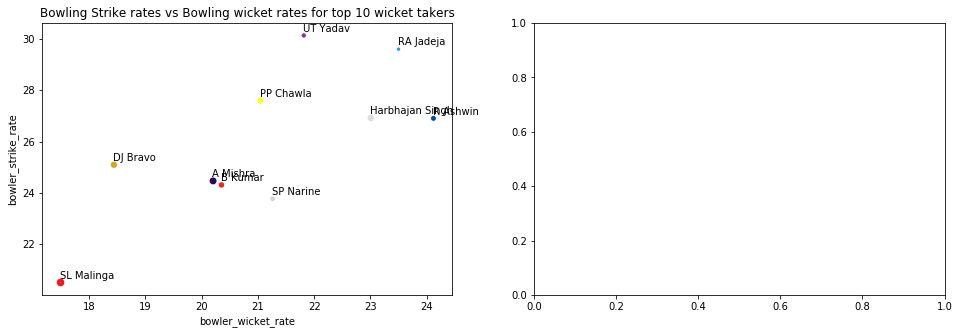

In [0]:
plt.figure(figsize=(25,5))

gs_bowler_1 = gridspec.GridSpec(1, 3)


plt.subplot(gs_bowler_1[0, 0])

p_bowler_1 = sns.scatterplot(x="bowler_wicket_rate", y="bowler_strike_rate",\
                     hue='bowler', hue_order=top_bowler_list,size='wickets',\
                     data=df_top_bowler_comparison,legend=False\
                     
                    )
for line in range(0,df_top_bowler_comparison.shape[0]):
  p_bowler_1.text(df_top_bowler_comparison.bowler_wicket_rate[line]-0.015,df_top_bowler_comparison.bowler_strike_rate[line]+0.15,df_top_bowler_comparison.bowler[line])

p_bowler_1.set_title('Strike rates vs Wicket rates for top 10 wicket takers')


plt.subplot(gs_bowler_1[0, 1])
plt.show()

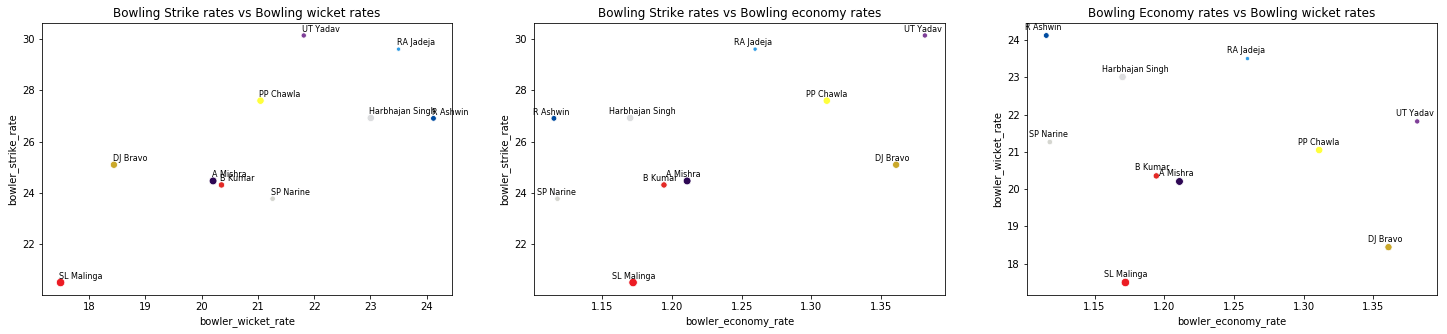

In [0]:
plt.figure(figsize=(25,5))

gs_bowler_1 = gridspec.GridSpec(1, 3)


plt.subplot(gs_bowler_1[0, 0])
p_bowler_1 = sns.scatterplot(x="bowler_wicket_rate", y="bowler_strike_rate",\
                     hue='bowler', hue_order=top_bowler_list,size='wickets',\
                     data=df_top_bowler_comparison, legend=False\
                     
                    )
for line in range(0,df_top_bowler_comparison.shape[0]):
  p_bowler_1.text(df_top_bowler_comparison.bowler_wicket_rate[line]-0.025,df_top_bowler_comparison.bowler_strike_rate[line]+0.15,df_top_bowler_comparison.bowler[line], fontsize=8)

p_bowler_1.set_title('Bowling Strike rates vs Bowling wicket rates')


plt.subplot(gs_bowler_1[0, 1])
p_bowler_2 = sns.scatterplot(x="bowler_economy_rate", y="bowler_strike_rate",\
                     hue='bowler', hue_order=top_bowler_list,size='wickets',\
                     data=df_top_bowler_comparison,\
                     legend=False
                    )
for line in range(0,df_top_bowler_comparison.shape[0]):
  p_bowler_2.text(df_top_bowler_comparison.bowler_economy_rate[line]-0.015,df_top_bowler_comparison.bowler_strike_rate[line]+0.15,df_top_bowler_comparison.bowler[line], fontsize=8)

p_bowler_2.set_title('Bowling Strike rates vs Bowling economy rates')

plt.subplot(gs_bowler_1[0, 2])
p_bowler_3 = sns.scatterplot(x="bowler_economy_rate", y="bowler_wicket_rate",\
                     hue='bowler', hue_order=top_bowler_list,size='wickets',\
                     data=df_top_bowler_comparison, legend=False\
                     
                    )
for line in range(0,df_top_bowler_comparison.shape[0]):
  p_bowler_3.text(df_top_bowler_comparison.bowler_economy_rate[line]-0.015,df_top_bowler_comparison.bowler_wicket_rate[line]+0.15,df_top_bowler_comparison.bowler[line], fontsize=8)

p_bowler_3.set_title('Bowling Economy rates vs Bowling wicket rates');




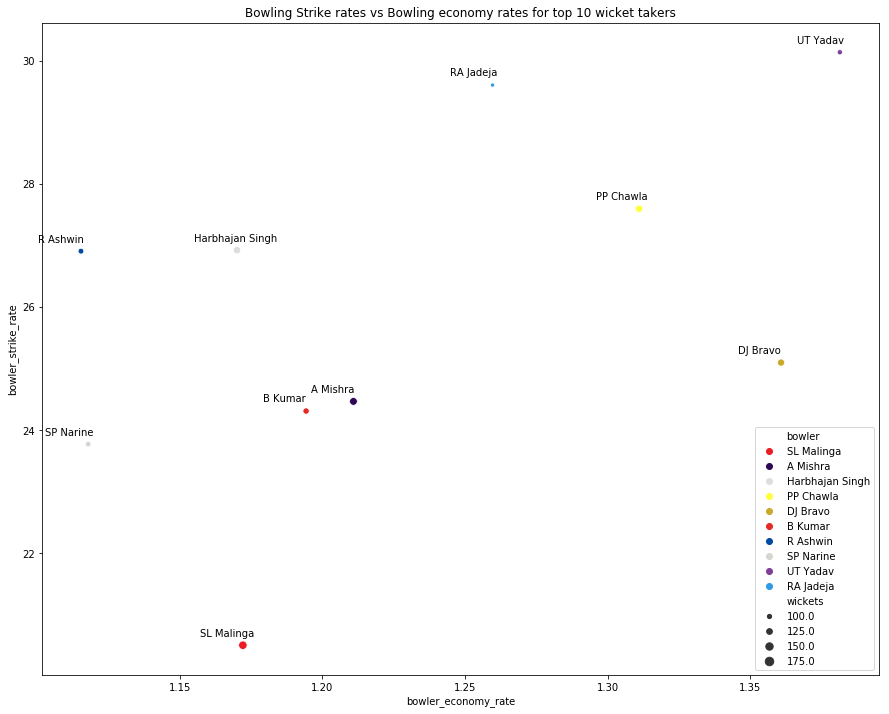

In [0]:
plt.figure(figsize=(15,12))
p_bowler_2 = sns.scatterplot(x="bowler_economy_rate", y="bowler_strike_rate",\
                     hue='bowler', hue_order=top_bowler_list,size='wickets',\
                     data=df_top_bowler_comparison\
                     
                    )
for line in range(0,df_top_bowler_comparison.shape[0]):
  p_bowler_2.text(df_top_bowler_comparison.bowler_economy_rate[line]-0.015,df_top_bowler_comparison.bowler_strike_rate[line]+0.15,df_top_bowler_comparison.bowler[line])

p_bowler_2.set_title('Bowling Strike rates vs Bowling economy rates for top 10 wicket takers')
plt.show(p_bowler_2)

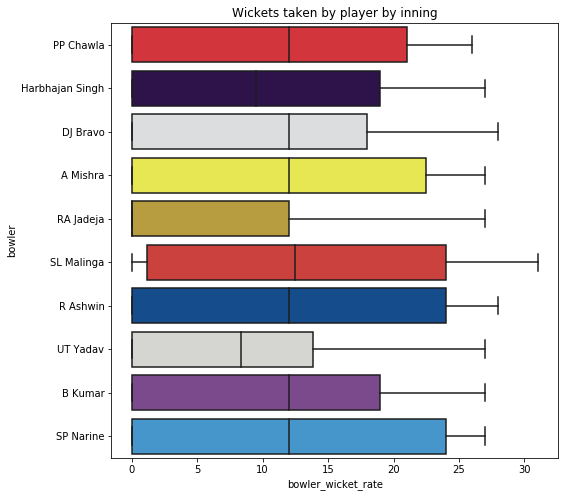

In [0]:
plt.figure(figsize=(8,8))
s_wickets = sns.boxplot(data=df_best_bowler,x='bowler_wicket_rate',y='bowler').set_title('Wickets taken by player by inning');
#plt.text(150,7.6,'highest=175', color="black", fontsize=10, fontweight="bold",bbox={'facecolor':'gray', 'alpha':0.5, 'pad':5})
#plt.annotate('highest=175', color="black", fontsize=10, xy=(173, 8.0), xytext=(140, 6),arrowprops=dict(facecolor='red', shrink=0.05))

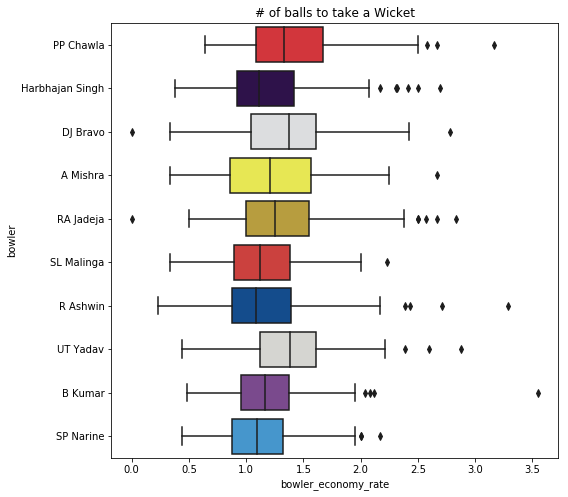

In [0]:
plt.figure(figsize=(8,8))
s_wickets = sns.boxplot(data=df_best_bowler,x='bowler_economy_rate',y='bowler').set_title('# of balls to take a Wicket');

In [0]:
df_best_bowler['bowler_boundary_rate'] = df_best_bowler.apply(lambda row: calc_bowling_boundary_rate(row),axis=1)
df_best_bowler['bowler_farming_rate'] = df_best_bowler.apply(lambda row: calc_bowling_farming_rate(row),axis=1)
df_best_bowler['bowler_dot_rate'] = df_best_bowler.apply(lambda row: calc_bowling_dot_rate(row),axis=1)
df_best_bowler.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1335 entries, 0 to 1334
Data columns (total 43 columns):
match_id                                  1335 non-null int64
season                                    1335 non-null int64
bowler                                    1335 non-null object
balls_bowled                              1335 non-null int64
batsman_runs_conceded                     1335 non-null float64
total_runs_conceded                       1335 non-null float64
extras conceded                           1335 non-null float64
extras_wides                              1335 non-null float64
extras_noballs                            1335 non-null float64
extras_byes                               1335 non-null float64
extras_legbyes                            1335 non-null float64
wickets_incl_run_outs                     1335 non-null int64
wicket_type                               1335 non-null int64
dot_balls_bowled                          1335 non-null int64
1_run_ball

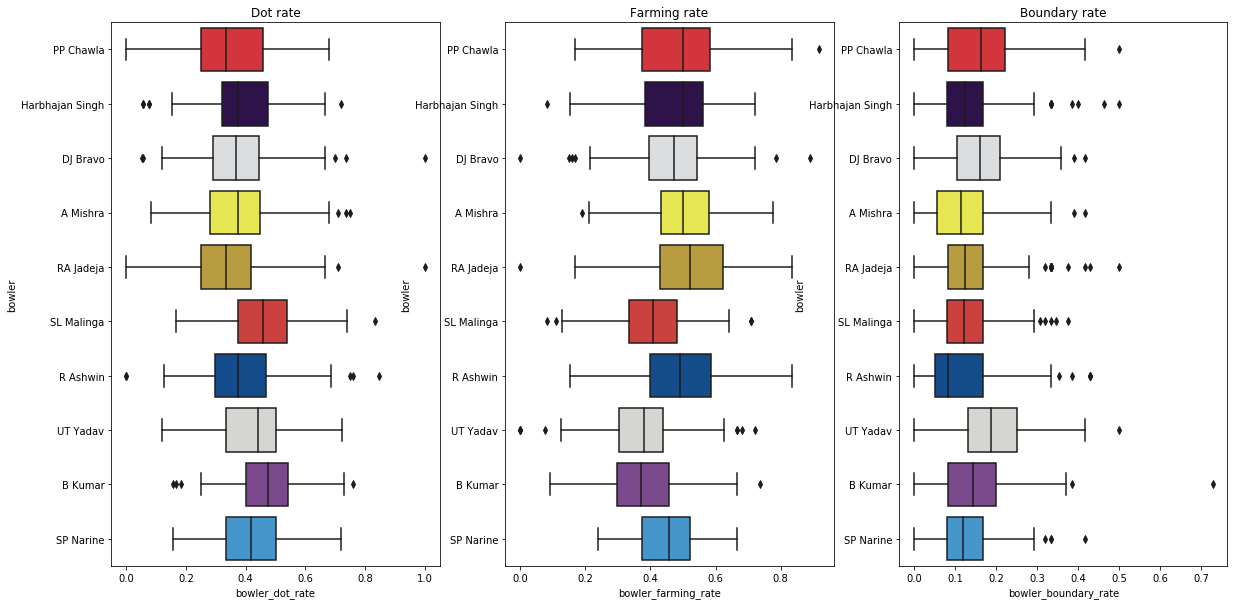

In [0]:
grid_height = 1
grid_width = 3

fig_b = plt.figure(figsize=(20,10))
gs_b = gridspec.GridSpec(grid_height, grid_width)


plt.subplot(gs_b[0, 0])
sns.boxplot(data=df_best_bowler,x='bowler_dot_rate',y='bowler').set_title('Dot rate');

plt.subplot(gs_b[0, 1])
sns.boxplot(data=df_best_bowler,x='bowler_farming_rate',y='bowler').set_title('Farming rate');

plt.subplot(gs_b[0, 2])
sns.boxplot(data=df_best_bowler,x='bowler_boundary_rate',y='bowler').set_title('Boundary rate');



## Has Malinga always been consistent?

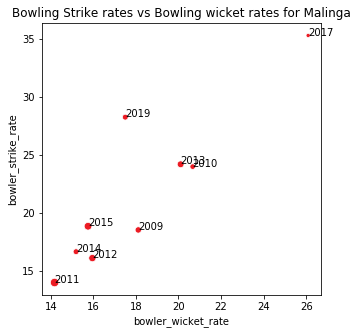

In [0]:
df_malinga_seasonal_stats = df_bowler_seasonal_stats.query('bowler=="SL Malinga"').reset_index()

plt.figure(figsize=(5,5))
p_malinga_1 = sns.scatterplot(x="bowler_wicket_rate", y="bowler_strike_rate",\
                      size='wickets',\
                     data=df_malinga_seasonal_stats, legend=False\
                     
                    )
for line in range(0,df_malinga_seasonal_stats.shape[0]):
#  print(df_malinga_seasonal_stats.bowler_wicket_rate[line],df_malinga_seasonal_stats.bowler_strike_rate[line],df_malinga_seasonal_stats.season[line])
  p_malinga_1.text(df_malinga_seasonal_stats.bowler_wicket_rate[line],df_malinga_seasonal_stats.bowler_strike_rate[line],df_malinga_seasonal_stats.season[line])

p_malinga_1.set_title('Bowling Strike rates vs Bowling wicket rates for Malinga')
plt.show(p_malinga_1)

In [0]:
df_malinga_seasonal_stats

# Last 3 Years bowling comparison

In [0]:
top_bowlers_last_3_years = df_bowler.query('season == 2017 | season == 2018 |season == 2019').groupby(['bowler'],as_index=False)['balls_bowled', 'wickets','total_runs_conceded','batsman_runs_conceded', \
                      'extras conceded', 'extras_wides', 'extras_noballs', 'extras_byes','extras_legbyes',\
                      'wickets_incl_run_outs', 'wicket_type_caught', 'wicket_type_bowled','wicket_type_lbw', 'wicket_type_stumped',\
                      'wicket_type_run_out','wicket_type_hit_wicket', 'wicket_type_caught_and_bowled',\
                      'wicket_type_retired_hurt', 'wicket_type_obstructing_the_field_flag',\
                      'dot_balls_bowled', '1_run_balls_bowled','2_run_balls_bowled', '3_run_balls_bowled',\
                      '4_run_balls_bowled','5_run_balls_bowled', '6_run_balls_bowled', 'wicket_haul_6', \
                      'wicket_haul_5', 'wicket_haul_4','wicket_haul_3', 'wicket_haul_2', 'wicket_haul_1', 'wicket_haul_0']\
.agg('sum')\
.sort_values(by=['wickets'],ascending=False).head(10)['bowler']

top_bowlers_last_3_years

62          JJ Bumrah
124       Rashid Khan
56        Imran Tahir
20            B Kumar
61         JD Unadkat
159          UT Yadav
165         YS Chahal
130            S Kaul
148    Sandeep Sharma
9              AJ Tye
Name: bowler, dtype: object

In [0]:
type(top_bowlers_last_3_years)

In [0]:
df_top_bowler_comparison_last_3_years = df_bowler_seasonal_stats.query('season == 2017 | season == 2018 |season == 2019').groupby('bowler',as_index=False)['wickets','balls_bowled','total_runs_conceded','batsman_runs_conceded',\
                                                                                     'extras_wides','extras_noballs','extras_byes','extras_legbyes',\
                                                                                     'wicket_haul_6','wicket_haul_5','wicket_haul_4','wicket_haul_3',\
                                                                                     'wicket_haul_2','wicket_haul_1','wicket_haul_0',\
                                                                                     'dot_balls_bowled','1_run_balls_bowled', '2_run_balls_bowled', '3_run_balls_bowled',\
                                                                                     '4_run_balls_bowled', '5_run_balls_bowled', '6_run_balls_bowled',\
                                                                                     ].sum().query('bowler in @top_bowlers_last_3_years') 

df_top_bowler_comparison_last_3_years['bowler_economy_rate'] = df_top_bowler_comparison_last_3_years.apply(lambda row: calc_bowling_economy_rate(row),axis=1)
df_top_bowler_comparison_last_3_years['bowler_strike_rate'] = df_top_bowler_comparison_last_3_years.apply(lambda row: calc_bowling_strike_rate(row),axis=1)
df_top_bowler_comparison_last_3_years['bowler_wicket_rate'] = df_top_bowler_comparison_last_3_years.apply(lambda row: calc_balls_per_wicket(row),axis=1)

df_top_bowler_comparison_last_3_years['bowler_boundary_rate'] = df_top_bowler_comparison_last_3_years.apply(lambda row: calc_bowling_boundary_rate(row),axis=1)
df_top_bowler_comparison_last_3_years['bowler_farming_rate'] = df_top_bowler_comparison_last_3_years.apply(lambda row: calc_bowling_farming_rate(row),axis=1)
df_top_bowler_comparison_last_3_years['bowler_dot_rate'] = df_top_bowler_comparison_last_3_years.apply(lambda row: calc_bowling_dot_rate(row),axis=1)


df_top_bowler_comparison_last_3_years = df_top_bowler_comparison_last_3_years.sort_values(by=['wickets','balls_bowled','total_runs_conceded',\
                                                                    'wicket_haul_6','wicket_haul_5','wicket_haul_4'],\
                                                                ascending=False).reset_index(drop=True)

df_top_bowler_comparison_last_3_years

,bowler,wickets,balls_bowled,total_runs_conceded,batsman_runs_conceded,extras_wides,extras_noballs,extras_byes,extras_legbyes,wicket_haul_6,wicket_haul_5,wicket_haul_4,wicket_haul_3,wicket_haul_2,wicket_haul_1,wicket_haul_0,dot_balls_bowled,1_run_balls_bowled,2_run_balls_bowled,3_run_balls_bowled,4_run_balls_bowled,5_run_balls_bowled,6_run_balls_bowled,bowler_economy_rate,bowler_strike_rate,bowler_wicket_rate,bowler_boundary_rate,bowler_farming_rate,bowler_dot_rate
0,JJ Bumrah,56.0,1076,1257.0,1190.0,18.0,14.0,9.0,26.0,0,0,0,4,13,18,11,448,408,76,6,108,0,30,1.168216,22.446429,19.214286,0.128253,0.455390,0.416357
1,Rashid Khan,55.0,1103,1221.0,1178.0,15.0,0.0,5.0,23.0,0,0,0,6,7,23,10,473,446,48,0,90,0,46,1.106981,22.200000,20.054545,0.123300,0.447869,0.428830
2,Imran Tahir,50.0,800,1003.0,976.0,11.0,1.0,8.0,7.0,0,0,2,4,8,14,7,291,354,47,0,60,0,48,1.253750,20.060000,16.000000,0.135000,0.501250,0.363750
3,B Kumar,48.0,977,1207.0,1150.0,30.0,4.0,4.0,19.0,0,1,0,3,11,12,14,452,298,68,3,114,1,41,1.235415,25.145833,20.354167,0.159672,0.377687,0.462641
4,UT Yadav,45.0,873,1231.0,1160.0,36.0,3.0,6.0,26.0,0,0,1,5,7,12,14,399,255,39,2,123,1,54,1.410080,27.355556,19.400000,0.203895,0.339061,0.457045
5,JD Unadkat,45.0,825,1220.0,1182.0,23.0,1.0,0.0,14.0,0,1,0,2,8,18,9,305,299,57,4,101,1,58,1.478788,27.111111,18.333333,0.193939,0.436364,0.369697
6,YS Chahal,44.0,892,1119.0,1041.0,36.0,5.0,21.0,16.0,0,0,1,2,9,16,13,378,337,57,2,62,0,56,1.254484,25.431818,20.272727,0.132287,0.443946,0.423767
7,S Kaul,43.0,792,1104.0,1069.0,16.0,4.0,4.0,11.0,0,0,1,3,10,10,10,274,329,50,0,97,0,42,1.393939,25.674419,18.418605,0.175505,0.478535,0.345960
8,Sandeep Sharma,41.0,838,1091.0,1053.0,29.0,1.0,0.0,8.0,0,0,1,2,8,15,10,347,294,54,1,102,0,40,1.301909,26.609756,20.439024,0.169451,0.416468,0.414081
9,AJ Tye,39.0,618,838.0,798.0,22.0,2.0,0.0,16.0,0,1,3,1,7,5,9,218,256,43,1,73,1,26,1.355987,21.487179,15.846154,0.161812,0.485437,0.352751


In [0]:
df_top_bowler_comparison_last_3_years[['bowler','wickets','balls_bowled','total_runs_conceded','bowler_strike_rate','bowler_wicket_rate']]

,bowler,wickets,balls_bowled,total_runs_conceded,bowler_strike_rate,bowler_wicket_rate
0,JJ Bumrah,56.0,1076,1257.0,22.446429,19.214286
1,Rashid Khan,55.0,1103,1221.0,22.200000,20.054545
2,Imran Tahir,50.0,800,1003.0,20.060000,16.000000
3,B Kumar,48.0,977,1207.0,25.145833,20.354167
4,UT Yadav,45.0,873,1231.0,27.355556,19.400000
5,JD Unadkat,45.0,825,1220.0,27.111111,18.333333
6,YS Chahal,44.0,892,1119.0,25.431818,20.272727
7,S Kaul,43.0,792,1104.0,25.674419,18.418605
8,Sandeep Sharma,41.0,838,1091.0,26.609756,20.439024
9,AJ Tye,39.0,618,838.0,21.487179,15.846154


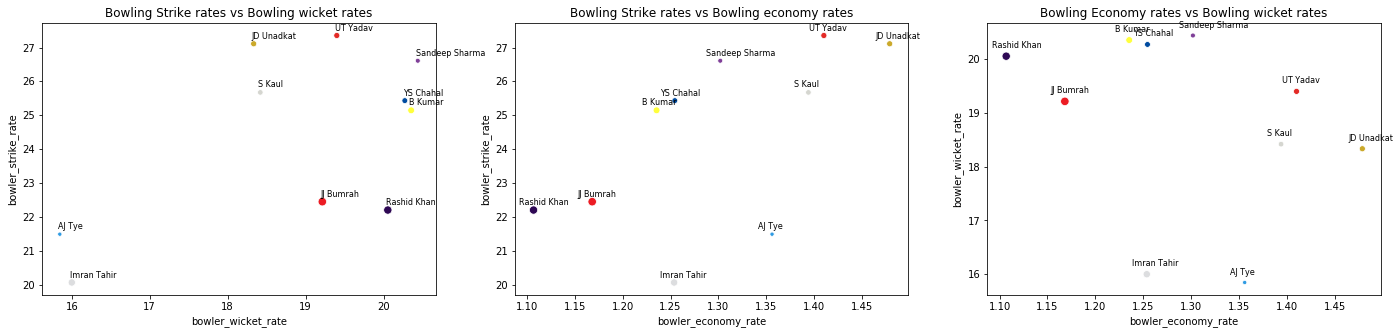

In [0]:
plt.figure(figsize=(24,5))

gs_bowler_3 = gridspec.GridSpec(1, 3)


plt.subplot(gs_bowler_3[0, 0])
p_bowler_11 = sns.scatterplot(x="bowler_wicket_rate", y="bowler_strike_rate",\
                     hue='bowler', hue_order=top_bowlers_last_3_years,size='wickets',\
                     data=df_top_bowler_comparison_last_3_years, legend=False\
                     
                    )
for line in range(0,df_top_bowler_comparison_last_3_years.shape[0]):
  p_bowler_11.text(df_top_bowler_comparison_last_3_years.bowler_wicket_rate[line]-0.025,df_top_bowler_comparison_last_3_years.bowler_strike_rate[line]+0.15,df_top_bowler_comparison_last_3_years.bowler[line], fontsize=8)

p_bowler_11.set_title('Bowling Strike rates vs Bowling wicket rates')


plt.subplot(gs_bowler_3[0, 1])
p_bowler_21 = sns.scatterplot(x="bowler_economy_rate", y="bowler_strike_rate",\
                     hue='bowler', hue_order=top_bowlers_last_3_years,size='wickets',\
                     data=df_top_bowler_comparison_last_3_years,\
                     legend=False
                    )
for line in range(0,df_top_bowler_comparison_last_3_years.shape[0]):
  p_bowler_21.text(df_top_bowler_comparison_last_3_years.bowler_economy_rate[line]-0.015,df_top_bowler_comparison_last_3_years.bowler_strike_rate[line]+0.15,df_top_bowler_comparison_last_3_years.bowler[line], fontsize=8)

p_bowler_21.set_title('Bowling Strike rates vs Bowling economy rates')

plt.subplot(gs_bowler_3[0, 2])
p_bowler_31 = sns.scatterplot(x="bowler_economy_rate", y="bowler_wicket_rate",\
                     hue='bowler', hue_order=top_bowlers_last_3_years,size='wickets',\
                     data=df_top_bowler_comparison_last_3_years, legend=False\
                     
                    )
for line in range(0,df_top_bowler_comparison_last_3_years.shape[0]):
  p_bowler_31.text(df_top_bowler_comparison_last_3_years.bowler_economy_rate[line]-0.015,df_top_bowler_comparison_last_3_years.bowler_wicket_rate[line]+0.15,df_top_bowler_comparison_last_3_years.bowler[line], fontsize=8)

p_bowler_31.set_title('Bowling Economy rates vs Bowling wicket rates');



# 2019 bowler performance

In [0]:
top_bowlers_2019 = df_bowler.query('season == 2019').groupby(['bowler'],as_index=False)['balls_bowled', 'wickets','total_runs_conceded','batsman_runs_conceded', \
                      'extras conceded', 'extras_wides', 'extras_noballs', 'extras_byes','extras_legbyes',\
                      'wickets_incl_run_outs', 'wicket_type_caught', 'wicket_type_bowled','wicket_type_lbw', 'wicket_type_stumped',\
                      'wicket_type_run_out','wicket_type_hit_wicket', 'wicket_type_caught_and_bowled',\
                      'wicket_type_retired_hurt', 'wicket_type_obstructing_the_field_flag',\
                      'dot_balls_bowled', '1_run_balls_bowled','2_run_balls_bowled', '3_run_balls_bowled',\
                      '4_run_balls_bowled','5_run_balls_bowled', '6_run_balls_bowled', 'wicket_haul_6', \
                      'wicket_haul_5', 'wicket_haul_4','wicket_haul_3', 'wicket_haul_2', 'wicket_haul_1', 'wicket_haul_0']\
.agg('sum')\
.sort_values(by=['wickets'],ascending=False).head(10)['bowler']



df_top_bowler_comparison_2019 = df_bowler_seasonal_stats.query('season==2019').groupby('bowler',as_index=False)['wickets','balls_bowled','total_runs_conceded','batsman_runs_conceded',\
                                                                                     'extras_wides','extras_noballs','extras_byes','extras_legbyes',\
                                                                                     'wicket_haul_6','wicket_haul_5','wicket_haul_4','wicket_haul_3',\
                                                                                     'wicket_haul_2','wicket_haul_1','wicket_haul_0',\
                                                                                     'dot_balls_bowled','1_run_balls_bowled', '2_run_balls_bowled', '3_run_balls_bowled',\
                                                                                     '4_run_balls_bowled', '5_run_balls_bowled', '6_run_balls_bowled',\
                                                                                     ].sum().query('bowler in @top_bowlers_2019') 

df_top_bowler_comparison_2019['bowler_economy_rate'] = df_top_bowler_comparison_2019.apply(lambda row: calc_bowling_economy_rate(row),axis=1)
df_top_bowler_comparison_2019['bowler_strike_rate'] = df_top_bowler_comparison_2019.apply(lambda row: calc_bowling_strike_rate(row),axis=1)
df_top_bowler_comparison_2019['bowler_wicket_rate'] = df_top_bowler_comparison_2019.apply(lambda row: calc_balls_per_wicket(row),axis=1)

df_top_bowler_comparison_2019['bowler_boundary_rate'] = df_top_bowler_comparison_2019.apply(lambda row: calc_bowling_boundary_rate(row),axis=1)
df_top_bowler_comparison_2019['bowler_farming_rate'] = df_top_bowler_comparison_2019.apply(lambda row: calc_bowling_farming_rate(row),axis=1)
df_top_bowler_comparison_2019['bowler_dot_rate'] = df_top_bowler_comparison_2019.apply(lambda row: calc_bowling_dot_rate(row),axis=1)


df_top_bowler_comparison_2019 = df_top_bowler_comparison_2019.sort_values(by=['wickets','balls_bowled','total_runs_conceded',\
                                                                    'wicket_haul_6','wicket_haul_5','wicket_haul_4'],\
                                                                ascending=False).reset_index(drop=True)

df_top_bowler_comparison_2019

,bowler,wickets,balls_bowled,total_runs_conceded,batsman_runs_conceded,extras_wides,extras_noballs,extras_byes,extras_legbyes,wicket_haul_6,wicket_haul_5,wicket_haul_4,wicket_haul_3,wicket_haul_2,wicket_haul_1,wicket_haul_0,dot_balls_bowled,1_run_balls_bowled,2_run_balls_bowled,3_run_balls_bowled,4_run_balls_bowled,5_run_balls_bowled,6_run_balls_bowled,bowler_economy_rate,bowler_strike_rate,bowler_wicket_rate,bowler_boundary_rate,bowler_farming_rate,bowler_dot_rate
0,Imran Tahir,26.0,388,440.0,426.0,5.0,0.0,4.0,5.0,0,0,2,1,5,5,4,151,174,18,0,27,0,18,1.134021,16.923077,14.923077,0.115979,0.494845,0.389175
1,K Rabada,25.0,292,375.0,356.0,12.0,0.0,3.0,4.0,0,0,2,0,7,3,0,123,100,20,0,39,0,10,1.284247,15.000000,11.680000,0.167808,0.410959,0.421233
2,DL Chahar,22.0,400,486.0,469.0,10.0,3.0,0.0,4.0,0,0,0,2,4,8,3,201,102,22,2,60,1,12,1.215000,22.090909,18.181818,0.182500,0.315000,0.502500
3,S Gopal,20.0,289,350.0,346.0,0.0,1.0,1.0,2.0,0,0,0,3,5,1,5,107,128,16,0,21,0,17,1.211073,17.500000,14.450000,0.131488,0.498270,0.370242
4,JJ Bumrah,19.0,378,425.0,400.0,5.0,4.0,5.0,11.0,0,0,0,1,6,4,5,174,131,21,1,41,0,10,1.124339,22.368421,19.894737,0.134921,0.404762,0.460317
5,Mohammed Shami,19.0,331,477.0,461.0,7.0,1.0,3.0,5.0,0,0,0,1,5,6,2,126,119,20,0,47,0,19,1.441088,25.105263,17.421053,0.199396,0.419940,0.380665
6,KK Ahmed,19.0,222,292.0,274.0,13.0,0.0,2.0,3.0,0,0,0,5,1,2,1,100,73,8,1,29,0,11,1.315315,15.368421,11.684211,0.180180,0.369369,0.450450
7,YS Chahal,18.0,308,394.0,374.0,12.0,0.0,5.0,3.0,0,0,1,0,4,6,3,129,114,22,0,21,0,22,1.279221,21.888889,17.111111,0.139610,0.441558,0.418831
8,Rashid Khan,17.0,364,387.0,371.0,6.0,0.0,4.0,6.0,0,0,0,1,2,10,2,170,135,14,0,31,0,14,1.063187,22.764706,21.411765,0.123626,0.409341,0.467033
9,SL Malinga,16.0,280,452.0,427.0,9.0,2.0,6.0,8.0,0,0,2,2,0,2,6,102,98,19,0,37,1,23,1.614286,28.250000,17.500000,0.217857,0.417857,0.364286


In [0]:
df_top_bowler_comparison_2019[['bowler','wickets','balls_bowled','total_runs_conceded','bowler_strike_rate','bowler_wicket_rate']]

,bowler,wickets,balls_bowled,total_runs_conceded,bowler_strike_rate,bowler_wicket_rate
0,Imran Tahir,26.0,388,440.0,16.923077,14.923077
1,K Rabada,25.0,292,375.0,15.000000,11.680000
2,DL Chahar,22.0,400,486.0,22.090909,18.181818
3,S Gopal,20.0,289,350.0,17.500000,14.450000
4,JJ Bumrah,19.0,378,425.0,22.368421,19.894737
5,Mohammed Shami,19.0,331,477.0,25.105263,17.421053
6,KK Ahmed,19.0,222,292.0,15.368421,11.684211
7,YS Chahal,18.0,308,394.0,21.888889,17.111111
8,Rashid Khan,17.0,364,387.0,22.764706,21.411765
9,SL Malinga,16.0,280,452.0,28.250000,17.500000


In [0]:
df_bowler_seasonal_stats.query('season==2019').head()

,season,bowler,balls_bowled,wickets,total_runs_conceded,batsman_runs_conceded,extras_wides,extras_noballs,extras_byes,extras_legbyes,dot_balls_bowled,1_run_balls_bowled,2_run_balls_bowled,3_run_balls_bowled,4_run_balls_bowled,5_run_balls_bowled,6_run_balls_bowled,wicket_type_caught,wicket_type_bowled,wicket_type_lbw,wicket_type_stumped,wicket_type_run_out,wicket_type_hit_wicket,wicket_type_caught_and_bowled,wicket_type_retired_hurt,wicket_type_obstructing_the_field_flag,wicket_haul_6,wicket_haul_5,wicket_haul_4,wicket_haul_3,wicket_haul_2,wicket_haul_1,wicket_haul_0,bowler_economy_rate,bowler_strike_rate,bowler_wicket_rate
1237,2019,A Mishra,243,11.0,271.0,267.0,3.0,0.0,0.0,1.0,86,115,18,0,14,0,10,8.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,2,4,4,1.115226,24.636364,22.090909
1238,2019,AD Russell,182,11.0,288.0,286.0,1.0,0.0,0.0,1.0,62,66,12,0,28,0,14,8.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,0,3,5,4,1.582418,26.181818,16.545455
1239,2019,AJ Tye,137,3.0,233.0,228.0,5.0,0.0,0.0,0.0,35,58,12,0,23,0,9,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,0,0,3,3,1.700730,77.666667,45.666667
1240,2019,AR Patel,307,10.0,368.0,363.0,1.0,0.0,4.0,0.0,111,143,13,0,23,0,17,6.0,1.0,1.0,1.0,2.0,0.0,1.0,0.0,0.0,0,0,0,0,1,8,5,1.198697,36.800000,30.700000
1241,2019,AS Joseph,55,6.0,89.0,84.0,3.0,0.0,1.0,1.0,28,10,2,0,10,0,5,2.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,0,0,0,2,1.618182,14.833333,9.166667


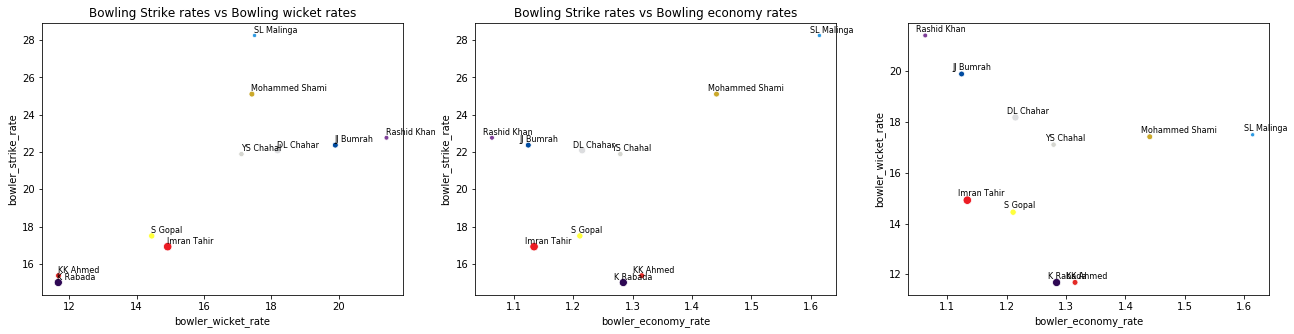

In [0]:
plt.figure(figsize=(22,5))

gs_bowler_3 = gridspec.GridSpec(1, 3)


plt.subplot(gs_bowler_3[0, 0])
p_bowler_12 = sns.scatterplot(x="bowler_wicket_rate", y="bowler_strike_rate",\
                     hue='bowler', hue_order=top_bowlers_2019,size='wickets',\
                     data=df_top_bowler_comparison_2019, legend=False\
                     
                    )
for line in range(0,df_top_bowler_comparison_2019.shape[0]):
  p_bowler_12.text(df_top_bowler_comparison_2019.bowler_wicket_rate[line]-0.025,df_top_bowler_comparison_2019.bowler_strike_rate[line]+0.15,df_top_bowler_comparison_2019.bowler[line], fontsize=8)

p_bowler_12.set_title('Bowling Strike rates vs Bowling wicket rates')


plt.subplot(gs_bowler_3[0, 1])
p_bowler_22 = sns.scatterplot(x="bowler_economy_rate", y="bowler_strike_rate",\
                     hue='bowler', hue_order=top_bowlers_2019,size='wickets',\
                     data=df_top_bowler_comparison_2019,\
                     legend=False
                    )
for line in range(0,df_top_bowler_comparison_2019.shape[0]):
  p_bowler_22.text(df_top_bowler_comparison_2019.bowler_economy_rate[line]-0.015,df_top_bowler_comparison_2019.bowler_strike_rate[line]+0.15,df_top_bowler_comparison_2019.bowler[line], fontsize=8)

p_bowler_22.set_title('Bowling Strike rates vs Bowling economy rates')

plt.subplot(gs_bowler_3[0, 2])
p_bowler_32 = sns.scatterplot(x="bowler_economy_rate", y="bowler_wicket_rate",\
                     hue='bowler', hue_order=top_bowlers_2019,size='wickets',\
                     data=df_top_bowler_comparison_2019, legend=False\
                     
                    )
for line in range(0,df_top_bowler_comparison_2019.shape[0]):
  p_bowler_32.text(df_top_bowler_comparison_2019.bowler_economy_rate[line]-0.015,df_top_bowler_comparison_2019.bowler_wicket_rate[line]+0.15,df_top_bowler_comparison_2019.bowler[line], fontsize=8)

p_bowler_31.set_title('Bowling Economy rates vs Bowling wicket rates');

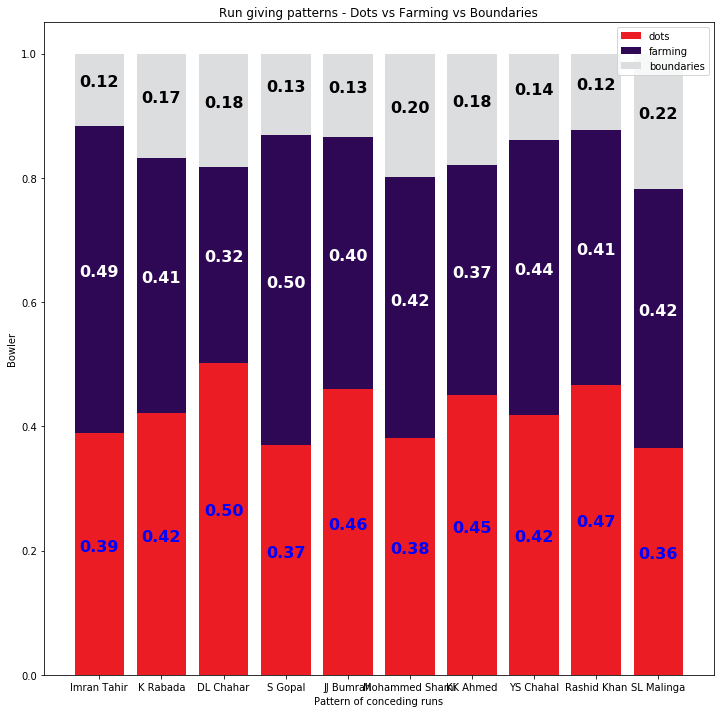

In [0]:
plt.figure(figsize=(12,12))

p_bowler_2019_dot = plt.bar(x=df_top_bowler_comparison_2019['bowler'],height=df_top_bowler_comparison_2019['bowler_dot_rate'])
p_bowler_2019_farming = plt.bar(x=df_top_bowler_comparison_2019['bowler'],height=df_top_bowler_comparison_2019['bowler_farming_rate'],\
                                 bottom=df_top_bowler_comparison_2019['bowler_dot_rate'])
p_bowler_2019_boundary = plt.bar(x=df_top_bowler_comparison_2019['bowler'],height=df_top_bowler_comparison_2019['bowler_boundary_rate'],\
                                  bottom=df_top_bowler_comparison_2019['bowler_dot_rate']+df_top_bowler_comparison_2019['bowler_farming_rate'])


for r1, r2, r3 in zip(p_bowler_2019_dot, p_bowler_2019_farming, p_bowler_2019_boundary):
    w1 = r1.get_width()
    w2 = r2.get_width()
    w3 = r3.get_width()
    h1 = r1.get_height()
    h2 = r2.get_height()
    h3 = r3.get_height()
    plt.text(r1.get_x()+w1/2.,r1.get_y()+h1/2.,"%.2f" % h1,ha="center", va="bottom", color="blue", fontsize=16, fontweight="bold")
    plt.text(r2.get_x()+w2/2.,r2.get_y()+h2/2.,"%.2f" % h2,ha="center", va="bottom", color="white", fontsize=16, fontweight="bold")
    plt.text(r3.get_x()+w3/2.,r3.get_y()+h3/2.,"%.2f" % h3,ha="center", va="bottom", color="black", fontsize=16, fontweight="bold")
        
    

plt.ylabel('Bowler')
plt.xlabel('Pattern of conceding runs')
plt.title('Run giving patterns - Dots vs Farming vs Boundaries')

plt.legend((p_bowler_2019_dot,p_bowler_2019_farming,p_bowler_2019_boundary),('dots','farming','boundaries'),loc='best')

plt.show()

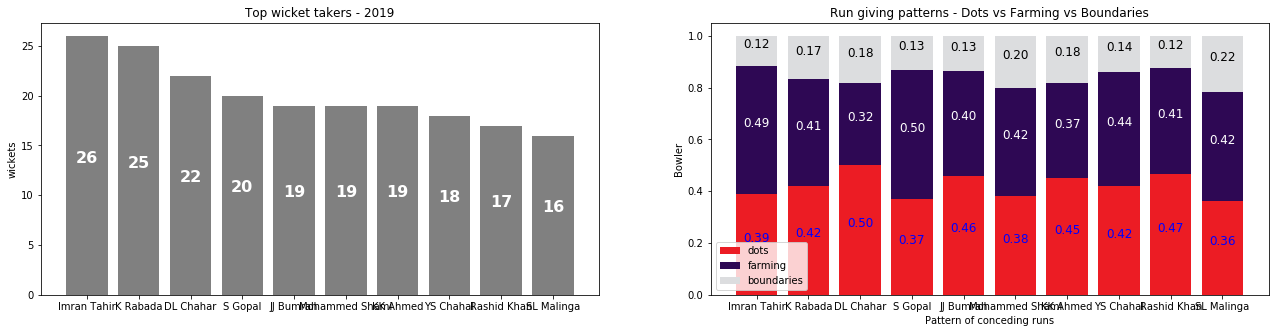

In [0]:
plt.figure(figsize=(22,5))

gs_bowler_4 = gridspec.GridSpec(1, 2)


plt.subplot(gs_bowler_4[0, 0])


p_bowler_2019_dot = plt.bar(x=df_top_bowler_comparison_2019['bowler'],height=df_top_bowler_comparison_2019['wickets'],color='grey')

plt.title('Top wicket takers - 2019')
plt.ylabel('wickets')
for r1 in p_bowler_2019_dot:
    w1 = r1.get_width()
    h1 = r1.get_height()
    plt.text(r1.get_x()+w1/2.,r1.get_y()+h1/2.,"%.0f" % h1,ha="center", va="bottom", color="white", fontsize=16, fontweight="bold")
        
plt.subplot(gs_bowler_4[0, 1])    

p_bowler_2019_dot = plt.bar(x=df_top_bowler_comparison_2019['bowler'],height=df_top_bowler_comparison_2019['bowler_dot_rate'])
p_bowler_2019_farming = plt.bar(x=df_top_bowler_comparison_2019['bowler'],height=df_top_bowler_comparison_2019['bowler_farming_rate'],\
                                 bottom=df_top_bowler_comparison_2019['bowler_dot_rate'])
p_bowler_2019_boundary = plt.bar(x=df_top_bowler_comparison_2019['bowler'],height=df_top_bowler_comparison_2019['bowler_boundary_rate'],\
                                  bottom=df_top_bowler_comparison_2019['bowler_dot_rate']+df_top_bowler_comparison_2019['bowler_farming_rate'])


for r1, r2, r3 in zip(p_bowler_2019_dot, p_bowler_2019_farming, p_bowler_2019_boundary):
    w1 = r1.get_width()
    w2 = r2.get_width()
    w3 = r3.get_width()
    h1 = r1.get_height()
    h2 = r2.get_height()
    h3 = r3.get_height()
    plt.text(r1.get_x()+w1/2.,r1.get_y()+h1/2.,"%.2f" % h1,ha="center", va="bottom", color="blue", fontsize=12)
    plt.text(r2.get_x()+w2/2.,r2.get_y()+h2/2.,"%.2f" % h2,ha="center", va="bottom", color="white", fontsize=12)
    plt.text(r3.get_x()+w3/2.,r3.get_y()+h3/2.,"%.2f" % h3,ha="center", va="bottom", color="black", fontsize=12)
        
    

plt.ylabel('Bowler')
plt.xlabel('Pattern of conceding runs')
plt.title('Run giving patterns - Dots vs Farming vs Boundaries')

plt.legend((p_bowler_2019_dot,p_bowler_2019_farming,p_bowler_2019_boundary),('dots','farming','boundaries'),loc='best')

plt.show()

In [0]:
df_bowler.head()

# Fielders

In [0]:
df_combined['kind'].value_counts()

caught                   5299
bowled                   1578
run out                   850
lbw                       539
stumped                   284
caught and bowled         254
retired hurt               11
hit wicket                 10
obstructing the field       2
Name: kind, dtype: int64

In [0]:
df_combined.query('kind == "caught"').head()

,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,kind,legbyes,inning,delivery,match_id,noballs,non_striker,player_out,total,wides,non_boundary,penalty,method,over,fielder_1,fielder_2,fielder_3,delivery_in_over,inning_quarter,catch_attributed_to,wicket_attributed_to,4_flag,6_flag,dot_ball_flag,1_run_flag,2_run_flag,3_run_flag,5_run_flag,caught_flag,lbw_flag,stumped_flag,bowled_flag,run_out_flag,hit_wicket_flag,caught_and_bowled_flag,retired_hurt_flag,obstructing_the_field_flag,wide_flag,noball_flag,legbye_flag,bye_flag,city,competition,toss_decision,eliminator,gender,match_type,method_ipl_summary,neutral_venue,#_of_overs,player_of_match,result,venue,winner,winner_toss,outcome_by_runs,outcome_by_wickets,match_date,season,team_1,team_2,umpire_1,umpire_2,umpire_3,umpire_4
9,PA Patel,0.0,DC-Chargers,MM Patel,NaN,0.0,caught,NaN,inning_1,1.4,548314,NaN,S Dhawan,PA Patel,0.0,NaN,NaN,NaN,NaN,2,RG Sharma,None,None,4,Q1,RG Sharma,MM Patel,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,Visakhapatnam,IPL,bat,NaN,male,T20,NaN,NaN,20,RG Sharma,NaN,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,MI,DC-Chargers,NaN,5.0,2012-04-09,2012,DC-Chargers,MI,AK Chaudhary,JD Cloete,None,None
18,B Chipli,0.0,DC-Chargers,MM Patel,NaN,0.0,caught,NaN,inning_1,3.1,548314,NaN,S Dhawan,B Chipli,0.0,NaN,NaN,NaN,NaN,4,SL Malinga,None,None,1,Q1,SL Malinga,MM Patel,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,Visakhapatnam,IPL,bat,NaN,male,T20,NaN,NaN,20,RG Sharma,NaN,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,MI,DC-Chargers,NaN,5.0,2012-04-09,2012,DC-Chargers,MI,AK Chaudhary,JD Cloete,None,None
41,S Dhawan,0.0,DC-Chargers,SL Malinga,NaN,0.0,caught,NaN,inning_1,6.6,548314,NaN,DT Christian,S Dhawan,0.0,NaN,NaN,NaN,NaN,7,KA Pollard,None,None,6,Q2,KA Pollard,SL Malinga,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,Visakhapatnam,IPL,bat,NaN,male,T20,NaN,NaN,20,RG Sharma,NaN,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,MI,DC-Chargers,NaN,5.0,2012-04-09,2012,DC-Chargers,MI,AK Chaudhary,JD Cloete,None,None
109,DT Christian,0.0,DC-Chargers,MM Patel,NaN,0.0,caught,NaN,inning_1,17.6,548314,NaN,CL White,DT Christian,0.0,NaN,NaN,NaN,NaN,18,KA Pollard,None,None,6,Q4,KA Pollard,MM Patel,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,Visakhapatnam,IPL,bat,NaN,male,T20,NaN,NaN,20,RG Sharma,NaN,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,MI,DC-Chargers,NaN,5.0,2012-04-09,2012,DC-Chargers,MI,AK Chaudhary,JD Cloete,None,None
113,A Mishra,0.0,DC-Chargers,SL Malinga,NaN,0.0,caught,NaN,inning_1,18.4,548314,NaN,CL White,A Mishra,0.0,NaN,NaN,NaN,NaN,19,MM Patel,None,None,4,Q4,MM Patel,SL Malinga,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,Visakhapatnam,IPL,bat,NaN,male,T20,NaN,NaN,20,RG Sharma,NaN,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,MI,DC-Chargers,NaN,5.0,2012-04-09,2012,DC-Chargers,MI,AK Chaudhary,JD Cloete,None,None


In [0]:
df_combined.head()

,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,kind,legbyes,inning,delivery,match_id,noballs,non_striker,player_out,total,wides,non_boundary,penalty,method,over,fielder_1,fielder_2,fielder_3,delivery_in_over,inning_quarter,catch_attributed_to,wicket_attributed_to,4_flag,6_flag,dot_ball_flag,1_run_flag,2_run_flag,3_run_flag,5_run_flag,caught_flag,lbw_flag,stumped_flag,bowled_flag,run_out_flag,hit_wicket_flag,caught_and_bowled_flag,retired_hurt_flag,obstructing_the_field_flag,wide_flag,noball_flag,legbye_flag,bye_flag,city,competition,toss_decision,eliminator,gender,match_type,method_ipl_summary,neutral_venue,#_of_overs,player_of_match,result,venue,winner,winner_toss,outcome_by_runs,outcome_by_wickets,match_date,season,team_1,team_2,umpire_1,umpire_2,umpire_3,umpire_4
0,PA Patel,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,0.1,548314,NaN,S Dhawan,NaN,0.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,1,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,Visakhapatnam,IPL,bat,NaN,male,T20,NaN,NaN,20,RG Sharma,NaN,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,MI,DC-Chargers,NaN,5.0,2012-04-09,2012,DC-Chargers,MI,AK Chaudhary,JD Cloete,None,None
1,PA Patel,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,0.2,548314,NaN,S Dhawan,NaN,0.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,2,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,Visakhapatnam,IPL,bat,NaN,male,T20,NaN,NaN,20,RG Sharma,NaN,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,MI,DC-Chargers,NaN,5.0,2012-04-09,2012,DC-Chargers,MI,AK Chaudhary,JD Cloete,None,None
2,PA Patel,1.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,0.3,548314,NaN,S Dhawan,NaN,1.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,3,Q1,None,None,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,Visakhapatnam,IPL,bat,NaN,male,T20,NaN,NaN,20,RG Sharma,NaN,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,MI,DC-Chargers,NaN,5.0,2012-04-09,2012,DC-Chargers,MI,AK Chaudhary,JD Cloete,None,None
3,S Dhawan,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,0.4,548314,NaN,PA Patel,NaN,0.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,4,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,Visakhapatnam,IPL,bat,NaN,male,T20,NaN,NaN,20,RG Sharma,NaN,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,MI,DC-Chargers,NaN,5.0,2012-04-09,2012,DC-Chargers,MI,AK Chaudhary,JD Cloete,None,None
4,S Dhawan,0.0,DC-Chargers,Harbhajan Singh,NaN,0.0,NaN,NaN,inning_1,0.5,548314,NaN,PA Patel,NaN,0.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,5,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,Visakhapatnam,IPL,bat,NaN,male,T20,NaN,NaN,20,RG Sharma,NaN,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,MI,DC-Chargers,NaN,5.0,2012-04-09,2012,DC-Chargers,MI,AK Chaudhary,JD Cloete,None,None


In [0]:
fielder_cols = ['match_id','match_date','season','batsman','non_striker','player_out','bowler',\
                'fielder_1','fielder_2','fielder_3',\
                'caught_flag','lbw_flag','bowled_flag','stumped_flag','run_out_flag','hit_wicket_flag',\
                'caught_and_bowled_flag','retired_hurt_flag','obstructing_the_field_flag']


df_fielders = df_combined[fielder_cols]
df_fielders.dropna(how='any',subset=['player_out'],axis=0,inplace=True)
df_fielders.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,match_id,match_date,season,batsman,non_striker,player_out,bowler,fielder_1,fielder_2,fielder_3,caught_flag,lbw_flag,bowled_flag,stumped_flag,run_out_flag,hit_wicket_flag,caught_and_bowled_flag,retired_hurt_flag,obstructing_the_field_flag
9,548314,2012-04-09,2012,PA Patel,S Dhawan,PA Patel,MM Patel,RG Sharma,None,None,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,548314,2012-04-09,2012,B Chipli,S Dhawan,B Chipli,MM Patel,SL Malinga,None,None,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,548314,2012-04-09,2012,S Dhawan,DT Christian,S Dhawan,SL Malinga,KA Pollard,None,None,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,548314,2012-04-09,2012,KC Sangakkara,DT Christian,KC Sangakkara,MM Patel,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
109,548314,2012-04-09,2012,DT Christian,CL White,DT Christian,MM Patel,KA Pollard,None,None,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df_fielders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8827 entries, 9 to 178945
Data columns (total 19 columns):
match_id                      8827 non-null int64
match_date                    8827 non-null object
season                        8827 non-null int64
batsman                       8827 non-null object
non_striker                   8827 non-null object
player_out                    8827 non-null object
bowler                        8827 non-null object
fielder_1                     6338 non-null object
fielder_2                     391 non-null object
fielder_3                     11 non-null object
caught_flag                   5299 non-null float64
lbw_flag                      539 non-null float64
bowled_flag                   1578 non-null float64
stumped_flag                  284 non-null float64
run_out_flag                  850 non-null float64
hit_wicket_flag               10 non-null float64
caught_and_bowled_flag        254 non-null float64
retired_hurt_flag           

In [0]:
df_fielders.head()

,match_id,match_date,season,batsman,non_striker,player_out,bowler,fielder_1,fielder_2,fielder_3,caught_flag,lbw_flag,bowled_flag,stumped_flag,run_out_flag,hit_wicket_flag,caught_and_bowled_flag,retired_hurt_flag,obstructing_the_field_flag
9,548314,2012-04-09,2012,PA Patel,S Dhawan,PA Patel,MM Patel,RG Sharma,None,None,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,548314,2012-04-09,2012,B Chipli,S Dhawan,B Chipli,MM Patel,SL Malinga,None,None,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,548314,2012-04-09,2012,S Dhawan,DT Christian,S Dhawan,SL Malinga,KA Pollard,None,None,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,548314,2012-04-09,2012,KC Sangakkara,DT Christian,KC Sangakkara,MM Patel,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
109,548314,2012-04-09,2012,DT Christian,CL White,DT Christian,MM Patel,KA Pollard,None,None,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:

df_wicket_details = pd.melt(df_fielders,\
                            id_vars=['match_id','match_date','season','batsman','non_striker','player_out','bowler','fielder_1','fielder_2','fielder_3'],\
                            var_name='wicket_type', \
                            value_name='wicket')
df_wicket_details.dropna(how='any',subset=['wicket'],axis=0,inplace=True)
df_wicket_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8827 entries, 0 to 79054
Data columns (total 12 columns):
match_id       8827 non-null int64
match_date     8827 non-null object
season         8827 non-null int64
batsman        8827 non-null object
non_striker    8827 non-null object
player_out     8827 non-null object
bowler         8827 non-null object
fielder_1      6338 non-null object
fielder_2      391 non-null object
fielder_3      11 non-null object
wicket_type    8827 non-null object
wicket         8827 non-null float64
dtypes: float64(1), int64(2), object(9)
memory usage: 896.5+ KB


In [0]:
df_wicket_details.head()

,match_id,match_date,season,batsman,non_striker,player_out,bowler,fielder_1,fielder_2,fielder_3,wicket_type,wicket
0,548314,2012-04-09,2012,PA Patel,S Dhawan,PA Patel,MM Patel,RG Sharma,None,None,caught_flag,1.0
1,548314,2012-04-09,2012,B Chipli,S Dhawan,B Chipli,MM Patel,SL Malinga,None,None,caught_flag,1.0
2,548314,2012-04-09,2012,S Dhawan,DT Christian,S Dhawan,SL Malinga,KA Pollard,None,None,caught_flag,1.0
4,548314,2012-04-09,2012,DT Christian,CL White,DT Christian,MM Patel,KA Pollard,None,None,caught_flag,1.0
6,548314,2012-04-09,2012,A Mishra,CL White,A Mishra,SL Malinga,MM Patel,None,None,caught_flag,1.0


In [0]:
df_wicket_details[df_wicket_details.fielder_2.notnull() & df_wicket_details.wicket_type == 'run_out_flag']

/usr/local/lib/python3.6/dist-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,match_id,match_date,season,batsman,non_striker,player_out,bowler,fielder_1,fielder_2,fielder_3,wicket_type,wicket


In [0]:
df_stumping_dismissals = df_wicket_details.query('wicket_type=="stumped_flag"')

In [0]:
df_run_out_dismissals = df_wicket_details.query('wicket_type=="run_out_flag"')

In [0]:
df_catch_dismissals = df_wicket_details.query('wicket_type=="caught_flag" | wicket_type=="caught_and_bowled_flag" ')


In [0]:
df_bowled_dismissals = df_wicket_details.query('wicket_type=="bowled_flag"')
df_lbw_dismissals = df_wicket_details.query('wicket_type=="lbw_flag"')
df_other_modes_of_dismissals = df_wicket_details.query('wicket_type=="hit_wicket_flag" | wicket_type=="retired_hurt_flag" | wicket_type=="obstructing_the_field_flag"')


In [0]:
df_bowled_dismissals.groupby(['season','bowler'],as_index=False)['wicket'].sum().sort_values(by=['season','wicket','bowler'],ascending=False)

,season,bowler,wicket
661,2019,Mohammed Shami,6.0
677,2019,YS Chahal,4.0
672,2019,SM Curran,4.0
665,2019,R Ashwin,4.0
656,2019,KH Pandya,4.0
668,2019,Rashid Khan,3.0
667,2019,RD Chahar,3.0
666,2019,RA Jadeja,3.0
664,2019,PP Chawla,3.0
655,2019,K Rabada,3.0


In [0]:
df_catch_dismissals.groupby(['season','bowler','fielder_1'],as_index=False)['wicket'].sum().sort_values(by=['season','wicket','fielder_1'],ascending=False)

,season,bowler,fielder_1,wicket
3762,2019,K Rabada,RR Pant,9.0
3697,2019,HH Pandya,SA Yadav,5.0
3899,2019,SL Malinga,Q de Kock,5.0
3871,2019,Rashid Khan,V Shankar,4.0
3765,2019,K Rabada,SS Iyer,4.0
3625,2019,A Mishra,RR Pant,4.0
3695,2019,HH Pandya,Q de Kock,4.0
3650,2019,B Kumar,Mohammad Nabi,4.0
3628,2019,AD Russell,KD Karthik,4.0
3647,2019,B Kumar,JM Bairstow,4.0


In [0]:
df_match_summary.team_1.unique()

array(['RCB', 'DD', 'KTK', 'MI', 'SRH', 'KKR', 'KXP', 'RR', 'PW',
       'DC-Chargers', 'RPS', 'CSK', 'GL', 'DC-Capitals'], dtype=object)

In [0]:
df_batsman_value = df_combined[['season','match_id','match_date','batsman',\
             'batsman_runs','batting_team','total']].groupby(['season','match_id','match_date','batting_team',\
                                                              'batsman'],as_index=False)['batsman_runs'].sum()

df_team_totals = df_combined[['season','match_id','match_date',\
                              'batting_team','total']].groupby(['season','match_id','match_date','batting_team',\
                                                              ],as_index=False)['total'].sum()

In [0]:
df_batsman_value.head()

,season,match_id,match_date,batting_team,batsman,batsman_runs
0,2008,335982,2008-04-18,KKR,BB McCullum,158.0
1,2008,335982,2008-04-18,KKR,DJ Hussey,12.0
2,2008,335982,2008-04-18,KKR,Mohammad Hafeez,5.0
3,2008,335982,2008-04-18,KKR,RT Ponting,20.0
4,2008,335982,2008-04-18,KKR,SC Ganguly,10.0


In [0]:
df_team_totals.head()

,season,match_id,match_date,batting_team,total
0,2008,335982,2008-04-18,KKR,222.0
1,2008,335982,2008-04-18,RCB,82.0
2,2008,335983,2008-04-19,CSK,240.0
3,2008,335983,2008-04-19,KXP,207.0
4,2008,335984,2008-04-19,DD,132.0


In [0]:
df_team_season_scores = df_team_totals.groupby(['season','batting_team'],as_index=False)['total'].sum()

In [0]:
df_team_season_scores.head()

,season,batting_team,total
0,2008,CSK,2520.0
1,2008,DC-Chargers,2229.0
2,2008,DD,2118.0
3,2008,KKR,1942.0
4,2008,KXP,2464.0


In [0]:
df_batsman_value = df_batsman_value.merge(df_team_totals,how='left',on=['season','match_id','match_date','batting_team'])
df_batsman_value['batsman_value'] = df_batsman_value['batsman_runs']/df_batsman_value['total'] 
df_batsman_value.head()


,season,match_id,match_date,batting_team,batsman,batsman_runs,total,batsman_value
0,2008,335982,2008-04-18,KKR,BB McCullum,158.0,222.0,0.711712
1,2008,335982,2008-04-18,KKR,DJ Hussey,12.0,222.0,0.054054
2,2008,335982,2008-04-18,KKR,Mohammad Hafeez,5.0,222.0,0.022523
3,2008,335982,2008-04-18,KKR,RT Ponting,20.0,222.0,0.090090
4,2008,335982,2008-04-18,KKR,SC Ganguly,10.0,222.0,0.045045


In [0]:
df_batsman_value.groupby(['season','batting_team','batsman'],as_index=False)['batsman_value'].mean()

,season,batting_team,batsman,batsman_value
0,2008,CSK,A Mukund,0.000000
1,2008,CSK,CK Kapugedera,0.030544
2,2008,CSK,JA Morkel,0.152409
3,2008,CSK,JDP Oram,0.039103
4,2008,CSK,Joginder Sharma,0.055556
5,2008,CSK,L Balaji,0.000000
6,2008,CSK,M Muralitharan,0.000000
7,2008,CSK,M Ntini,0.050459
8,2008,CSK,MEK Hussey,0.257139
9,2008,CSK,ML Hayden,0.256787


In [0]:
df_batsman_value_season = df_batsman_value.groupby(['season','batting_team','batsman'],as_index=False)['batsman_runs'].sum()

In [0]:
df_batsman_value_season.head()

,season,batting_team,batsman,batsman_runs
0,2008,CSK,A Mukund,0.0
1,2008,CSK,CK Kapugedera,16.0
2,2008,CSK,JA Morkel,241.0
3,2008,CSK,JDP Oram,18.0
4,2008,CSK,Joginder Sharma,16.0


In [0]:
df_batsman_value_season = df_batsman_value_season.merge(df_team_season_scores,how='left',on=['season','batting_team'])
df_batsman_value_season['batsman_value'] = df_batsman_value_season['batsman_runs']/df_batsman_value_season['total'] 
df_batsman_value_season.head()

,season,batting_team,batsman,batsman_runs,total,batsman_value
0,2008,CSK,A Mukund,0.0,2520.0,0.000000
1,2008,CSK,CK Kapugedera,16.0,2520.0,0.006349
2,2008,CSK,JA Morkel,241.0,2520.0,0.095635
3,2008,CSK,JDP Oram,18.0,2520.0,0.007143
4,2008,CSK,Joginder Sharma,16.0,2520.0,0.006349


In [0]:
df_batsman_value_season.sort_values(by=['batting_team','batsman_value','season'], \
                                    ascending=[True, False, True]).groupby(['batsman','batting_team'],as_index=False)['batsman_value']\
.mean().sort_values(by=['batting_team','batsman_value'],ascending=[True,False]).query('batting_team=="KKR"')

,batsman,batting_team,batsman_value
269,G Gambhir,KKR,0.188038
765,SC Ganguly,KKR,0.172408
713,RV Uthappa,KKR,0.169206
354,JH Kallis,KKR,0.142357
392,KD Karthik,KKR,0.141548
508,MK Pandey,KKR,0.135065
559,N Rana,KKR,0.124841
909,YK Pathan,KKR,0.119971
171,CH Gayle,KKR,0.116760
514,MK Tiwary,KKR,0.113897


In [0]:
df_batsman_value.query('(batsman=="BB McCullum") ').groupby(['season','batting_team'])['batsman_value'].mean()

season  batting_team
2008    KKR             0.231730
2009    KKR             0.143832
2010    KKR             0.156347
2011    KTK             0.188884
2012    KKR             0.160175
2013    KKR             0.032258
2014    CSK             0.178655
2015    CSK             0.180818
2016    GL              0.134609
2017    GL              0.164557
2018    RCB             0.123765
Name: batsman_value, dtype: float64

In [0]:
df_match_summary_combo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 419128 to 829785
Data columns (total 96 columns):
city                         743 non-null object
competition                  756 non-null object
toss_decision                756 non-null object
eliminator                   9 non-null object
gender                       756 non-null object
match_type                   756 non-null object
method                       19 non-null object
neutral_venue                77 non-null float64
overs                        756 non-null int64
player_of_match              752 non-null object
result                       13 non-null object
venue                        756 non-null object
winner                       756 non-null object
winner_toss                  743 non-null object
won_by_runs                  337 non-null float64
won_by_wickets               406 non-null float64
match_date                   756 non-null datetime64[ns]
team_1                       756 non-null object


In [0]:
df_match_summary_combo.describe(include='all')

,city,competition,toss_decision,eliminator,gender,match_type,method,neutral_venue,overs,player_of_match,result,venue,winner,winner_toss,won_by_runs,won_by_wickets,match_date,team_1,team_2,umpire_1,umpire_2,umpire_3,umpire_4,season,batsman_runs_inning_1_Q1,batsman_runs_inning_1_Q2,batsman_runs_inning_1_Q3,batsman_runs_inning_1_Q4,batsman_runs_inning_2_Q1,batsman_runs_inning_2_Q2,batsman_runs_inning_2_Q3,batsman_runs_inning_2_Q4,total_inning_1_Q1,total_inning_1_Q2,total_inning_1_Q3,total_inning_1_Q4,total_inning_2_Q1,total_inning_2_Q2,total_inning_2_Q3,total_inning_2_Q4,...,wides_inning_1_Q1,wides_inning_1_Q2,wides_inning_1_Q3,wides_inning_1_Q4,wides_inning_2_Q1,wides_inning_2_Q2,wides_inning_2_Q3,wides_inning_2_Q4,noballs_inning_1_Q1,noballs_inning_1_Q2,noballs_inning_1_Q3,noballs_inning_1_Q4,noballs_inning_2_Q1,noballs_inning_2_Q2,noballs_inning_2_Q3,noballs_inning_2_Q4,6_flag_inning_1_Q1,6_flag_inning_1_Q2,6_flag_inning_1_Q3,6_flag_inning_1_Q4,6_flag_inning_2_Q1,6_flag_inning_2_Q2,6_flag_inning_2_Q3,6_flag_inning_2_Q4,4_flag_inning_1_Q1,4_flag_inning_1_Q2,4_flag_inning_1_Q3,4_flag_inning_1_Q4,4_flag_inning_2_Q1,4_flag_inning_2_Q2,4_flag_inning_2_Q3,4_flag_inning_2_Q4,dot_ball_flag_inning_1_Q1,dot_ball_flag_inning_1_Q2,dot_ball_flag_inning_1_Q3,dot_ball_flag_inning_1_Q4,dot_ball_flag_inning_2_Q1,dot_ball_flag_inning_2_Q2,dot_ball_flag_inning_2_Q3,dot_ball_flag_inning_2_Q4
count,743,756,756,9,756,756,19,77.0,756.0,752,13,756,756,743,337.000000,406.000000,756,756,756,755,755,2,1,756.000000,756.000000,755.000000,752.000000,744.000000,754.000000,749.000000,734.000000,680.000000,756.000000,755.000000,752.000000,744.000000,754.000000,749.000000,734.000000,680.000000,...,756.000000,755.000000,752.000000,744.000000,754.000000,749.000000,734.000000,680.000000,756.000000,755.000000,752.000000,744.000000,754.000000,749.000000,734.000000,680.000000,756.000000,755.000000,752.000000,744.000000,754.000000,749.000000,734.000000,680.000000,756.000000,755.000000,752.000000,744.000000,754.000000,749.000000,734.000000,680.000000,756.000000,755.000000,752.000000,744.000000,754.000000,749.000000,734.000000,680.000000
unique,30,1,2,6,1,1,1,NaN,NaN,225,2,36,14,14,NaN,NaN,546,14,14,49,49,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Mumbai,IPL,field,Rajasthan Royals,male,T20,D/L,NaN,NaN,CH Gayle,tie,Eden Gardens,MI,MI,NaN,NaN,2016-04-23 00:00:00,RCB,MI,HDPK Dharmasena,S Ravi,S Ravi,AK Chaudhary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,101,756,463,2,756,756,19,NaN,NaN,21,9,77,108,97,NaN,NaN,2,98,99,78,71,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-04-18 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,20.0,NaN,NaN,NaN,NaN,NaN,29.798220,6.238916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.444444,34.182540,34.698013,38.565160,46.51478

In [0]:
df_match_summary_combo.result.value_counts()

tie          9
no result    4
Name: result, dtype: int64

In [0]:
df_match_summary_combo.winner_toss.value_counts().sum()

743

In [0]:
df_match_summary_combo.query('result=="no result" ')

,city,competition,toss_decision,eliminator,gender,match_type,method,neutral_venue,overs,player_of_match,result,venue,winner,winner_toss,won_by_runs,won_by_wickets,match_date,team_1,team_2,umpire_1,umpire_2,umpire_3,umpire_4,season,batsman_runs_inning_1_Q1,batsman_runs_inning_1_Q2,batsman_runs_inning_1_Q3,batsman_runs_inning_1_Q4,batsman_runs_inning_2_Q1,batsman_runs_inning_2_Q2,batsman_runs_inning_2_Q3,batsman_runs_inning_2_Q4,total_inning_1_Q1,total_inning_1_Q2,total_inning_1_Q3,total_inning_1_Q4,total_inning_2_Q1,total_inning_2_Q2,total_inning_2_Q3,total_inning_2_Q4,...,wides_inning_1_Q1,wides_inning_1_Q2,wides_inning_1_Q3,wides_inning_1_Q4,wides_inning_2_Q1,wides_inning_2_Q2,wides_inning_2_Q3,wides_inning_2_Q4,noballs_inning_1_Q1,noballs_inning_1_Q2,noballs_inning_1_Q3,noballs_inning_1_Q4,noballs_inning_2_Q1,noballs_inning_2_Q2,noballs_inning_2_Q3,noballs_inning_2_Q4,6_flag_inning_1_Q1,6_flag_inning_1_Q2,6_flag_inning_1_Q3,6_flag_inning_1_Q4,6_flag_inning_2_Q1,6_flag_inning_2_Q2,6_flag_inning_2_Q3,6_flag_inning_2_Q4,4_flag_inning_1_Q1,4_flag_inning_1_Q2,4_flag_inning_1_Q3,4_flag_inning_1_Q4,4_flag_inning_2_Q1,4_flag_inning_2_Q2,4_flag_inning_2_Q3,4_flag_inning_2_Q4,dot_ball_flag_inning_1_Q1,dot_ball_flag_inning_1_Q2,dot_ball_flag_inning_1_Q3,dot_ball_flag_inning_1_Q4,dot_ball_flag_inning_2_Q1,dot_ball_flag_inning_2_Q2,dot_ball_flag_inning_2_Q3,dot_ball_flag_inning_2_Q4
match_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
829813,Bangalore,IPL,field,NaN,male,T20,NaN,NaN,20,NaN,no result,M Chinnaswamy Stadium,RCB,NaN,NaN,NaN,2015-05-17,RCB,DD,HDPK Dharmasena,K Srinivasan,None,None,2015,40.0,47.0,49.0,45.0,2.0,NaN,NaN,NaN,42.0,49.0,50.0,46.0,2.0,NaN,NaN,NaN,...,2.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,3.0,5.0,1.0,0.0,NaN,NaN,NaN,6.0,3.0,1.0,4.0,0.0,NaN,NaN,NaN,11.0,10.0,10.0,6.0,5.0,NaN,NaN,NaN
1178424,Bengaluru,IPL,field,NaN,male,T20,NaN,NaN,20,NaN,no result,M.Chinnaswamy Stadium,RR,NaN,NaN,NaN,2019-04-30,RCB,RR,UV Gandhe,NJ Llong,None,None,2019,59.0,NaN,NaN,NaN,39.0,NaN,NaN,NaN,62.0,NaN,NaN,NaN,41.0,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,11.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN
501265,Delhi,IPL,bat,NaN,male,T20,NaN,NaN,20,NaN,no result,Feroz Shah Kotla,DD,NaN,NaN,NaN,2011-05-21,DD,PW,SS Hazare,RJ Tucker,None,None,2011,24.0,26.0,1.0,NaN,NaN,NaN,NaN,NaN,27.0,28.0,1.0,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,19.0,15.0,0.0,NaN,NaN,NaN,NaN,NaN
829763,Bangalore,IPL,field,NaN,male,T20,NaN,NaN,20,NaN,no result,M Chinnaswamy Stadium,RR,NaN,NaN,NaN,2015-04-29,RCB,RR,JD Cloete,PG Pathak,None,None,2015,42.0,33.0,44.0,65.0,NaN,NaN,NaN,NaN,47.0,36.0,47.0,70.0,NaN,NaN,NaN,NaN,...,0.0,2.0,1.0,3.0,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,0.0,2.0,2.0,NaN,NaN,NaN,NaN,8.0,5.0,3.0,9.0,NaN,NaN,NaN,NaN,17.0,17.0,10.0,9.0,NaN,NaN,NaN,NaN


In [0]:
df_match_summary_combo[['result','city','winner','winner_toss']].groupby('result')['city','winner'].count()

,city,winner
result,,
no result,4,4
tie,9,9


In [0]:
df_batsman.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11294 entries, 0 to 11293
Data columns (total 28 columns):
match_id             11294 non-null int64
season               11294 non-null int64
match_date           11294 non-null datetime64[ns]
batsman              11294 non-null object
runs_scored          11294 non-null float64
gross_balls_faced    11294 non-null int64
4s                   11294 non-null int64
6s                   11294 non-null int64
dot_balls            11294 non-null int64
wides_faced          11294 non-null float64
no_balls_faced       11294 non-null float64
1s                   11294 non-null int64
2s                   11294 non-null int64
3s                   11294 non-null int64
5s                   11294 non-null int64
net_balls_faced      11294 non-null float64
strike_rate          11294 non-null float64
level_0              8787 non-null object
player_out           8787 non-null object
out                  8787 non-null float64
batting_team         11294 non

In [0]:
df_batsman.query('(batsman == "V Kohli") & (season == 2013)').groupby(['match_id'],as_index=False)['runs_scored','net_balls_faced','6s','4s','100s','50s'].sum().sort_values(by=['match_id'],ascending=False)

,match_id,runs_scored,net_balls_faced,6s,4s,100s,50s
15,598068,56.0,29.0,4,6,0,1
14,598064,14.0,14.0,0,1,0,0
13,598057,17.0,14.0,0,2,0,0
12,598054,99.0,58.0,4,10,0,1
11,598048,93.0,47.0,4,11,0,1
10,598045,57.0,43.0,2,6,0,1
9,598042,25.0,18.0,0,3,0,0
8,598036,32.0,35.0,0,3,0,0
7,598033,1.0,4.0,0,0,0,0
6,598027,11.0,9.0,1,0,0,0


In [0]:
df_batsman.groupby(['season','batsman'],as_index=False)\
['match_id','runs_scored','net_balls_faced','6s','4s','100s','50s']\
.agg({'match_id':'count',\
     'runs_scored':'sum',\
     'net_balls_faced':'sum',\
     '6s':'sum',\
     '4s':'sum',\
     '100s':'sum',\
     '50s':'sum'
      })\
.query('batsman == "V Kohli" ')

,season,batsman,match_id,runs_scored,net_balls_faced,6s,4s,100s,50s
138,2008,V Kohli,12,165.0,157.0,4,18,0,0
290,2009,V Kohli,13,246.0,219.0,8,22,0,1
456,2010,V Kohli,13,307.0,212.0,12,26,0,1
636,2011,V Kohli,16,557.0,460.0,16,55,0,4
808,2012,V Kohli,15,364.0,326.0,10,33,0,2
983,2013,V Kohli,16,634.0,457.0,22,64,0,6
1110,2014,V Kohli,14,359.0,294.0,16,23,0,2
1245,2015,V Kohli,16,505.0,385.0,23,35,0,3
1383,2016,V Kohli,16,973.0,640.0,38,84,4,7
1521,2017,V Kohli,10,308.0,252.0,11,23,0,4


In [0]:
df_batsman.query('match_id==598017 & batsman == "V Kohli"')

,match_id,season,match_date,batsman,runs_scored,gross_balls_faced,4s,6s,dot_balls,wides_faced,no_balls_faced,1s,2s,3s,5s,net_balls_faced,strike_rate,level_0,player_out,out,batting_team,200s,100s,50s,30s,boundary_hit_rate,farming_rate,dot_rate
5158,598017,2013,2013-04-16,V Kohli,65.0,51,7,1,19,1.0,0.0,18,5,1,0,50.0,1.3,inning_2,V Kohli,1.0,RCB,0,0,1,0,0.156863,0.470588,0.372549
